# **1. Initial Steps**

## 1.1 Importing libraries and NPRI file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#using ExcelFile for checking the sheets in it (read_excel does not allow me to do it)
#https://stackoverflow.com/questions/26474693/excelfile-vs-read-excel-in-pandas

#dataset = pd.ExcelFile('NPRI_2000-2022.xlsx')  #assigning the entire dataset to a variable
dataset = pd.ExcelFile(r"C:\Users\pfros\Downloads\NPRI\NPRI_2000-2022.xlsx")

pd.set_option('display.max_columns', None)    #setting up notebook so that all columns are displayed

## 1.2 Exploring file contents

In [3]:
print(dataset.sheet_names)

['Releases 2000-2020', 'Disposals and Transfers 00-20', 'Comments']


## 1.3 Making safe copies

In [4]:
df_releases = pd.read_excel(dataset, sheet_name=0) #assigning "releases" sheet to variable
df_disposals = pd.read_excel(dataset, sheet_name=1) #assigning "disposals" sheet to variable
df_comments = pd.read_excel(dataset, sheet_name=2)  #assigning "comments" sheet to variable

In [5]:
#making a copy of each one of the tabs for safety
df1_releases = df_releases.copy()
df1_disposals = df_disposals.copy()
df1_comments = df_comments.copy()

# **2. Data Understanding**

**Business Understanding**

This dataset is information from the National Pollutant Release Inventory (NPRI).
This is Canada's public inventory of pollutant releases (to air, water, and land) and disposals/transfers for recycling from facilities across the country. It is run by Environment and Climate Change Canada (ECCC).

Its primary goal is transparency: providing Canadians with information about releases of substances of concern from industrial sources.

**Dataset Understanding**

The dataset is split into 3 related components, and understanding their difference is key:

## **2.1 Releases sheet**

### 2.1.1 Overview

**1. Releases:** This show pollutants leaving the facility's control and entering the environment (air, water, or land).  
This **the focus** of our environmental impact study.

In [6]:
#explore the dataset

#checking for the first 20 columns
df1_releases.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_d’estimation,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-38-2,Phosphoric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
6,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7664-93-9,Sulphuric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
7,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7782-50-5,Chlorine,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN
9,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 14,Zinc (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN


### 2.1.2 Shape and information

In [7]:
#checking the shape of the releases sheet from the dataset
df1_releases.shape

(737516, 28)

In [8]:
#checking information about the releases sheet
df1_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

### 2.1.3 Adjusting columns names

In [9]:
#adjusting the names to make it easier no navigate through and for better visualisation
df1_releases = df1_releases.rename(columns={'Reporting_Year / Année': 'reporting_year',
                             'NPRI_ID / No_INRP': 'NPRI_ID',
                             'Number of employees': 'employees_number',
                             "Company_Name / Dénomination_sociale_de_l'entreprise":'company_name',
                             'Facility_Name / Installation': 'facility_name',
                             'NAICS / Code_SCIAN': 'NAICS_code',
                             'NAICS Title / Titre Code_SCIAN':'NAICS_title',
                             'PROVINCE': 'province',
                             'City': 'city',
                             'Latitude': 'latitude',
                             'Longitude': 'longitude',
                             'CAS_Number / No_CAS': 'CAS_number',
                             'Substance Name (English) / Nom de substance (Anglais)': 'substance_name',
                             'Units / Unités': 'units',
                             "Estimation_Method / Méthode_d’estimation": 'est_method',
                             'Release to Air - Fugitive': 'rta_fugitive',
                             'Release to Air - Other Non-Point ': 'rta_other_non_point',
                             'Release to Air - Road dust  ': 'rta_road_dust',
                             'Release to Air - Spills ': 'rta_spills',
                             'Release to Air - Stack / Point  ': 'rta_stack_point',
                             'Release to Air - Storage / Handling ': 'rta_storage_handling',
                             'Releases to Land - Leaks': 'rtl_leaks',
                             'Releases to Land - Other ': 'rtl_other',
                             'Releases to Land - Spills ': 'rtl_spills',
                             'Releases to Water Bodies - Direct Discharges ': 'rtwb_direct_discharges',
                             'Releases to Water Bodies - Leaks': 'rtwb_leaks',
                             'Releases to Water Bodies - Spills ': 'rtwb_spills',
                             'Sum of release to all media (<1tonne)': 'sum_release2all'})

In [10]:
df1_releases['units'].unique()

array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

In [11]:
df1_releases['NPRI_ID'].nunique()

21868

### 2.1.4 Data types

In [12]:
#checking columns datatypes
df1_releases.dtypes

reporting_year              int64
NPRI_ID                     int64
employees_number           object
company_name               object
facility_name              object
NAICS_code                  int64
NAICS_title                object
province                   object
city                       object
latitude                  float64
longitude                 float64
CAS_number                 object
substance_name             object
units                      object
est_method                 object
rta_fugitive              float64
rta_other_non_point       float64
rta_road_dust             float64
rta_spills                float64
rta_stack_point           float64
rta_storage_handling      float64
rtl_leaks                 float64
rtl_other                 float64
rtl_spills                float64
rtwb_direct_discharges    float64
rtwb_leaks                float64
rtwb_spills               float64
sum_release2all           float64
dtype: object

In [13]:
#adjusting datatypes

#employees_number column had '(blank)' values, so we adjusted it to be able to do the data type change
df1_releases['employees_number'] = df1_releases['employees_number'].astype(str).str.replace('(blank)', '', regex=False)
df1_releases['employees_number'] = pd.to_numeric(df1_releases['employees_number'], errors='coerce').astype('Int64')

df1_releases[['company_name',
              'facility_name',
              'NAICS_title',
              'province',
              'city',
              'substance_name',
              'units',
              'est_method']] = df1_releases[['company_name',
                                             'facility_name',
                                             'NAICS_title',
                                             'province',
                                             'city',
                                             'substance_name',
                                             'units',
                                             'est_method']].astype('category')

df1_releases[['NAICS_code', 'CAS_number']] = df1_releases[['NAICS_code', 'CAS_number']].astype('string')

df1_releases.dtypes

reporting_year                     int64
NPRI_ID                            int64
employees_number                   Int64
company_name                    category
facility_name                   category
NAICS_code                string[python]
NAICS_title                     category
province                        category
city                            category
latitude                         float64
longitude                        float64
CAS_number                string[python]
substance_name                  category
units                           category
est_method                      category
rta_fugitive                     float64
rta_other_non_point              float64
rta_road_dust                    float64
rta_spills                       float64
rta_stack_point                  float64
rta_storage_handling             float64
rtl_leaks                        float64
rtl_other                        float64
rtl_spills                       float64
rtwb_direct_disc

In [14]:
df1_releases.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.5 Units conversion

In [15]:
#sorting rows chronologically per facility, substance, and year
df1_releases = df1_releases.sort_values(
    ['NPRI_ID', 'substance_name', 'reporting_year']
).reset_index(drop=True)

#defining release columns to be converted and used in totals
release_cols = [
    'rta_fugitive', 'rta_other_non_point', 'rta_road_dust', 'rta_spills',
    'rta_stack_point', 'rta_storage_handling', 'rtl_leaks', 'rtl_other',
    'rtl_spills', 'rtwb_direct_discharges', 'rtwb_leaks', 'rtwb_spills',
]

#cleaning unit strings for safer matching
df1_releases['units_clean'] = (
    df1_releases['units']
    .astype(str)
    .str.strip()
    .str.lower()
)


#removing any rows that contain gteq or equivalents in units
df1_releases = df1_releases[~df1_releases['units_clean'].str.contains('teq', na=False)]

#defining conversion factors to kilograms
conversion_factors = {
    'grams': 0.001, 'gram': 0.001, 'g': 0.001,
    'kilograms': 1, 'kg': 1,
    'tonnes': 1000, 'tonne': 1000, 't': 1000,
    'g teq': np.nan   #keeping as NaN so these rows can be dropped later
}

#mapping each cleaned unit to its numeric conversion factor
df1_releases['unit_factor'] = df1_releases['units_clean'].map(conversion_factors)

#converting each release column to kilograms in place
for col in release_cols:
    df1_releases[col] = df1_releases[col] * df1_releases['unit_factor']

#calculating total releases in kilograms across all release columns
df1_releases['total_release_all'] = df1_releases[release_cols].sum(axis=1)

#creating explicit total_release_all_kg column (same values, clearer naming)
df1_releases['total_release_all_kg'] = df1_releases['total_release_all']

#dropping helper columns no longer needed
df1_releases = df1_releases.drop(columns=['units_clean', 'unit_factor'])

#dropping rows where conversion was not possible (for example g teq -> NaN)
df1_releases = df1_releases.dropna(subset=['total_release_all_kg'])

In [16]:
df1_releases.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg
0,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,107-06-2,"1,2-Dichloroethane",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,0.00,0.00
1,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,106-99-0,"1,3-Butadiene",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,120.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.00,120.00
2,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92
3,2016,1,397,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,0.91
4,2017,1,417,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92


In [17]:
npri_id_gteq = df_releases[df_releases['Units / Unités'] == 'g TEQ']
npri_id_gteq['Substance Name (English) / Nom de substance (Anglais)'].unique()

array(['Dioxins and furans - total'], dtype=object)

### 2.1.5 Observations

**Basic Statistics**
- **Records:** 737,516 records
- **Columns:** 28 columns
- **Temporal Coverage:** 2000 to 2022
- **Focus:** Pollutant releases to the environment.

**Key Data Components**  

**Temporal and Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `CAS_Number / No_CAS`
- **Completeness:** Fully complete (737,516 non-null entries)

**Sector and Location Data**
- **Columns:** `NAICS Title / Titre Code_SCIAN`, `PROVINCE`, `City`, `Latitude`, `Longitude`

**Pollutant and Measurement Data**
- **Columns:** `Substance Name (English) / Nom de substance (Anglais)`, `Units / Unités`

**Target Variables (Releases)**
- **Structure:** 15 columns detailing release quantities
- **Examples:** `Release to Air - Stack / Point`, `Releases to Land - Spills`

**Unit Conversion and Target Construction**

**Purpose:**
- To prepare a consistent target variable while avoiding data leakage by ensuring all unit handling occurs before splitting and merging comments.

**Workflow Overview:**

- *Sorting and Pre-Processing*

  - Before any transformation, the dataset is sorted to maintain a stable order. This ensures that when we eventually create a train-test split inside the pipeline, no look-ahead leakage occurs from unit conversions or engineered features.

- *Target Variable Construction*
  - The target is created by summing all release-related columns across each row (i.e., summing along axis 1). This produces a single unified release value that represents the total quantity emitted across all pathways.

- *Unit Standardization*
  - Because NPRI data reports releases in multiple measurement units, the next step is to normalize everything to a consistent base unit.

  - **To do this:**

    - Each unit in the dataset is mapped to a predefined unit-conversion factor.

    - These factors are applied to convert the raw summed target variable into the target unit of interest — kilograms.
    - This ensures comparability across facilities, substances, and reporting years.

 - *Cleanup of Intermediate Features*
    - After conversion, temporary helper columns (e.g., `units_clean`, `unit_factor`) are removed to keep the final dataset minimal and clean.

- *Handling Unsupported Units*
    - The unit GTEC could not be converted to kilograms using any meaningful or mathematically consistent factor.
    - Because of this, all rows where GTEC appears are assigned np.nan during the mapping step and subsequently removed from the dataset.

## **2.2 Disposals sheet**

### 2.2.1 Overview

**2. Disposals and Transfers:** This describes Pollutants sent off-site for final disposal, treatment or recycling. Not a release to the immediate environment but still represents material handling.

In [18]:
#checking for the first 20 columns
df1_disposals.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,Longitude,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Units / Unités,Estimation_Method / Méthode_d’estimation,Off-site Disposal - Land Treatment,Off-site Disposal - Landfill,Off-site Disposal - Storage,Off-site Disposal - Tailings Management,Off-site Disposal - Underground Injection,Off-site Disposal - Waste Rock management,Off-site Transfers for Recycling - Energy Recovery,Off-site Transfers for Recycling - Other,Off-site Transfers for Recycling - Recovery of Acids and Bases,Off-site Transfers for Recycling - Recovery of Catalysts,Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals),Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds,Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents),Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues,Off-site Transfers for Recycling - Recovery of Solvents,Off-site Transfers for Recycling - Refining or Re-use of Used Oil,Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,On-site Disposal - Land Treatment,On-site Disposal - Landfill,On-site Disposal - Tailings Management,On-site Disposal - Underground Injection,On-site Disposal - Waste Rock management
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.07,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,NA - 14,Zinc (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.38,NaN,NaN,NaN,NaN
2,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 09,Manganese (and its compounds),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,2.64,NaN,NaN,NaN
3,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 10,Mercury (and its compounds),kg,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.70,NaN,NaN,NaN
4,2000,4,500,Pine Falls Paper Company,Pine Falls,322122,Newsprint mills,MB,PINE FALLS,50.568600,-96.226700,NA - 16,Ammonia (total),tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN
5,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resin and synthetic rubber manufacturing,QC,LAVAL,45.579700,-73.721700,106-89-8,Epichlorohydrin,tonnes,O - Engineering Estimates,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resin and synthetic rubber manufacturing,QC,LAVAL,45.579700,-73.721700,108-95-2,Phenol (and its salts),tonnes,O - Engineering Estimates,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,7,45,"BORDEN CHIMIE CANADA, INC.",BORDEN CHIMIE - LAVAL,325210,Resi

### 2.2.2 Shape and information

In [19]:
#checking the shape of the disposals sheet from the dataset
df1_disposals.shape

(191645, 41)

In [20]:
#checking the information of disposals
df1_disposals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

### 2.2.3 Observations

**Basic Statistics**
- **Records:** 191,645 entries
- **Columns:** 41 columns
- **Memory Usage:** 59.9+ MB
- **Data Types:** 28 float64, 3 int64, 10 object

**Key Data Components**

**Core Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `Company_Name / Dénomination_sociale_de_l'entreprise`, `Facility_Name / Installation`
- **Completeness:** High completeness (191,645 non-null for most)

**Sector and Location Data**
- **Columns:** `NAICS / Code_SCIAN`, `NAICS Title / Titre Code_SCIAN`, `PROVINCE`, `City`, `Latitude`, `Longitude`
- **Completeness:** High for NAICS and province, moderate for coordinates (190,474 non-null)

**Pollutant and Method Data**
- **Columns:** `CAS_Number / No_CAS`, `Substance Name (English) / Nom de substance (Anglais)`, `Units / Unités`, `Estimation_Method / Méthode_d'estimation`
- **Completeness:** Fully complete (191,645 non-null)

**Target Variables (Disposals and Transfers)**
- **Structure:** 26 columns detailing various disposal and transfer pathways
- **Categories:**
  - **Off-site Disposal:** Land treatment, landfill, storage, tailings management, etc.
  - **Off-site Transfers for Recycling:** Energy recovery, metal recovery, solvent recovery, etc.
  - **Off-site Transfers for Treatment:** Biological, chemical, incineration, sewage treatment
  - **On-site Disposal:** Land treatment, landfill, tailings management, etc.
- **Data Sparsity:** Most disposal/transfer columns have significant null values (ranging from 138 to 59,734 non-null values).

## **2.3 Comments sheet**

### 2.3.1 Overview

**Comments:** This is a supplementary text provided by the reporting facility, which can offer crucial context for unusual reporting values or activities.

In [21]:
#checking for the first 20 columns
df1_comments.head(20)

,Reporting_Year / Année,NPRI_ID / No_INRP,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title EN / Titre Code SCIAN EN,NAICS Title FR / Titre Code SCIAN FR,PROVINCE,CAS_Number / No_CAS,Substance Name (English) / Nom de substance (Anglais),Substance Name (French) / Nom de substance (Français),Comment_Type_Name (English) Type_de_commentaire (Anglais),Comment_Type_Name (French) Type_de_commentaire (Français),Comment / Commentaires
0,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,100-42-5,Styrene,Styrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
1,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-10-1,Methyl isobutyl ketone,Méthylisobutylcétone,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less wood waste (hog fuel) was combust...
2,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,108-95-2,Phenol (and its salts),Phénol (et ses sels),On-site releases comment,Commentaire sur les rejets sur le site,Reduction in (bleached pulp) production rates ...
3,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,118-74-1,Hexachlorobenzene,Hexachlorobenzène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 more natural gas was combusted in the ...
4,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-12-7,Anthracene,Anthracène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
5,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,120-80-9,Catechol,Catéchol,On-site releases comment,Commentaire sur les rejets sur le site,"Estimated quantity ""released to land"" is based..."
6,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,129-00-0,Pyrene,Pyrène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
7,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,206-44-0,Fluoranthene,Fluoranthène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
8,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,208-96-8,Acenaphthylene,Acénaphthylène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...
9,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,Usines de pâte chimique,AB,218-01-9,Chrysene,Chrysène,On-site releases comment,Commentaire sur les rejets sur le site,In 2022 less black liquor was put through the ...


### 2.3.2 Shape and information

#### 2.3.2.1 Shape

In [22]:
#checking the shape of the comments sheet from the dataset
df1_comments.shape

(363310, 14)

#### 2.3.2.2 Info

In [23]:
#checking information about the comments sheet.
df1_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

#### 2.3.2.3 Adjusting names

Here we are renaming columns to consistent names that align with the releases sheet, so it makes it easier to combine this sheet with the releases one.

In [24]:
#adjusting the names to make it easier no navigate through and for better visualisation
df1_comments = df1_comments.rename(columns={'Reporting_Year / Année': 'reporting_year',
                             'NPRI_ID / No_INRP': 'NPRI_ID',
                             'Number of employees': 'employees_number',
                             "Company_Name / Dénomination_sociale_de_l'entreprise":'company_name',
                             'Facility_Name / Installation': 'facility_name',
                             'NAICS / Code_SCIAN': 'NAICS_code',
                             'NAICS Title EN / Titre Code SCIAN EN':'NAICS_title',
                             'PROVINCE': 'province',
                             'City': 'city',
                             'CAS_Number / No_CAS': 'CAS_number',
                             'Substance Name (English) / Nom de substance (Anglais)': 'substance_name',
                             "Comment_Type_Name (English) Type_de_commentaire (Anglais)": 'comment_type',
                             'Comment / Commentaires': 'comment_detail'})

df1_comments.dtypes

reporting_year                                                int64
NPRI_ID                                                       int64
company_name                                                 object
facility_name                                                object
NAICS_code                                                    int64
NAICS_title                                                  object
NAICS Title FR / Titre Code SCIAN FR                         object
province                                                     object
CAS_number                                                   object
substance_name                                               object
Substance Name (French) / Nom de substance (Français)        object
comment_type                                                 object
Comment_Type_Name (French) Type_de_commentaire (Français)    object
comment_detail                                               object
dtype: object

#### 2.3.2.4 Adjusting dadatypes

Here we are adjusting the datatypes to be aligned with the releases sheet, so it makes it easier to combine this sheet with the releases one.

In [25]:
#adjusting datatypes in comments sheet, so they are aligned with releases sheet (for merging)

#numeric
df1_comments['reporting_year'] = df1_comments['reporting_year'].astype('int64')
df1_comments['NPRI_ID']        = df1_comments['NPRI_ID'].astype('int64')

#string codes
df1_comments['NAICS_code'] = df1_comments['NAICS_code'].astype('string')
df1_comments['CAS_number'] = df1_comments['CAS_number'].astype('string')

#categorical text columns
cat_cols = [
    'company_name',
    'facility_name',
    'NAICS_title',
    'province',
    'substance_name',
    'comment_type'
]

for col in cat_cols:
    df1_comments[col] = df1_comments[col].astype('category')

#comments text as string (we'll clean and adjust this later)
df1_comments['comment_detail'] = df1_comments['comment_detail'].astype('string')

### 2.3.3 Comments details

#### 2.3.3.1 Unique values

In [26]:
#checking for unique values
df1_comments['comment_detail'].unique()

<StringArray>
[                                                                                                                                                                'In 2022 less wood waste (hog fuel) was combusted in the Power Boiler for energy production.',
                                                                                                                                              'Reduction in (bleached pulp) production rates & less black liquor solids were consumed by the Recovery Boiler.',
                                                                                                                                              'In 2022 more natural gas was combusted in the Recovery Boiler source & less black liquor solids were consumed.',
                                                                                                                                 'In 2022 less black liquor was put through the chemical recovery loop (in this case the S

#### 2.3.3.2 Count of rows (for NAICS 221112)

In [27]:
#checking number of rows
total_rows_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].shape[0]
total_rows_221112

13021

In [28]:
#checking number of non null comment type rows
non_null_type = df1_comments[df1_comments['NAICS_code'] == '221112']['comment_type'].notna().sum()
non_null_type

np.int64(13021)

In [29]:
#checking number of non null comment detail rows
non_null_type = df1_comments[df1_comments['NAICS_code'] == '221112']['comment_detail'].notna().sum()
non_null_type

np.int64(12818)

In [30]:
#getting all previous info ina  single cell for clarity
subset = df1_comments[df1_comments['NAICS_code'] == '221112']

summary = {
    "total_rows": subset.shape[0],
    "non_null_comment_type": subset['comment_type'].notna().sum(),
    "non_null_comment_detail": subset['comment_detail'].notna().sum()
}

summary

{'total_rows': 13021,
 'non_null_comment_type': np.int64(13021),
 'non_null_comment_detail': np.int64(12818)}

Filtering the comments only to NAICS 221112 shows a total of 13021 rows, representing all comments for the fossil fuel electricity generation sector. All rows contain comment type (13,021) and the majority also include a detailed comment (12,818). This demonstrates that comments information is well populated for our target sector and may provide additional insights into reporting behavior or estimation methods.

#### 2.3.3.3 Duplicates

##### 2.3.3.3.1 Checking for duplicates

In [31]:
df1_comments.duplicated().sum()

np.int64(0)

##### 2.3.3.3.2 Checking for same facility, year, substance dupicates

In [32]:
subset.duplicated(
    subset=['NPRI_ID', 'reporting_year', 'substance_name']
).sum()

np.int64(3417)

##### 2.3.3.3.3 Inspecting the duplicate key rows (for all comments)

In [33]:
dup_rows = subset[
    subset.duplicated(
        subset=['NPRI_ID', 'reporting_year', 'substance_name'],
        keep=False
    )
].sort_values(['NPRI_ID', 'reporting_year', 'substance_name'])

dup_rows[['NPRI_ID', 'reporting_year', 'substance_name',
          'comment_type', 'comment_detail']].head(20)

,NPRI_ID,reporting_year,substance_name,comment_type,comment_detail
354368,267,2001,Vanadium (except when in an alloy) and its com...,Disposal comment,Environment Canada National Pollutant Release ...
354369,267,2001,Vanadium (except when in an alloy) and its com...,On-site releases comment,Environment Canada National Pollutant Release ...
295188,267,2006,Mercury (and its compounds),Disposal comment,Reduction in quantity released to air coupled ...
295189,267,2006,Mercury (and its compounds),On-site releases comment,Genesee Units1-2 stack point releases to air s...
278205,267,2007,Cadmium (and its compounds),Disposal comment,Difference of more than 10% between 2006 and 2...
278206,267,2007,Cadmium (and its compounds),On-site releases comment,Stack releases different from 2006 based on ne...
248390,267,2009,Cadmium (and its compounds),Disposal comment,Increased production (more coal) as a result o...
248391,267,2009,Cadmium (and its compounds),On-site releases comment,Increased production (more coal) as a result o...
248392,267,2009,Chromium (and its compounds),Disposal comment,Increased production (more coal) as a result o...
248393,267,2009,Chromium (and its compounds),On-site releases comment,Increase in total water release in 2009 in ord...


### 2.3.4 Filtering to fossil fuel generated sectors

In [34]:
#keeping only comments for NAICS 221112
df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#checking
df_com_221112.shape

(13021, 14)

### 2.3.5 Merging rows (to be aligned with releases)

For modeling, we need at most one comment row per (NPRI_ID, reporting_year, substance_name).
Here we group by these keys and:

*   join distinct comment_type values with "; "
*   join distinct comment_detail texts with " || "

so we keep all information in just one row per key.

In [35]:
#collapsing multiple comment rows per facility–year–substance
df_comments_clean = (
    df_com_221112
    .groupby(['NPRI_ID', 'reporting_year', 'substance_name'], as_index=False, observed=True)
    .agg({
        # unique() is usually fast enough here and avoids full set/sorted
        'comment_type':   lambda x: '; '.join(x.dropna().unique()),
        'comment_detail': lambda x: ' || '.join(x.dropna().unique())
    })
)

In [36]:
#checking shape before merging
len(
    df_com_221112[['NPRI_ID','reporting_year','substance_name']]
    .drop_duplicates()
)

9604

In [37]:
#checking shape after merging
df_comments_clean.shape[0]

9604

### 2.3.6 Observations

**Basic Statistics**
- **Records:** 363,310 entries
- **Columns:** 14 columns
- **Memory Usage:** 38.8+ MB
- **Data Types:** 3 int64, 11 object

**Key Data Components**

**Core Identification Data**
- **Columns:** `Reporting_Year / Année`, `NPRI_ID / No_INRP`, `Company_Name / Dénomination_sociale_de_l'entreprise`, `Facility_Name / Installation`
- **Completeness:** High completeness for core identifiers (363,310 non-null)

**Sector Classification Data**
- **Columns:** `NAICS / Code_SCIAN`, `NAICS Title EN / Titre Code SCIAN EN`, `NAICS Title FR / Titre Code SCIAN FR`
- **Completeness:** Near-perfect for NAICS codes, very high for titles (363,294 non-null)

**Geographic Data**
- **Columns:** `PROVINCE`
- **Completeness:** Fully complete (363,310 non-null)
- **Note:** This dataset does not contain coordinate data

**Substance Information**
- **Columns:** `CAS_Number / No_CAS`, `Substance Name (English) / Nom de substance (Anglais)`, `Substance Name (French) / Nom de substance (Français)`
- **Completeness:** Fully complete for all substance identifiers

**Commentary Data**
- **Columns:** `Comment_Type_Name (English)`, `Comment_Type_Name (French)`, `Comment / Commentaires`
- **Completeness:** Fully complete for comment types, high for actual comments (358,956 non-null)
- **Note:** The comment type categorization could helps filter comments by purpose or significance

# **3. Our Goal**

## **3.1 Problem**
Our team will be working on Problem 3:  
**"Predict the releases from the fossil fuel electricity generation sector if coal power plants are entirely phased out by 2030."**

## **3.2 Our Strategy**

Considering that our objective is to predict pollutant releases from the Fossil Fuel Electricity Generation sector through 2030, specifically modeling the impact of the coal phase-out.

**1.** Isolating the 'Releases' data for this sector, so we can study the behaviour of the companies using coal against the rest of them. We are keeping the comments sheet as could have valuable information.

**2.** We need to isolate the companies from the Fossil Fuel electricity generation sector, because this is the focus of our Project.

**3.** From this subset, we need to distinguish the companies using coal (positive class) from the ones who don't use this pollutant (negative class), in order to study the behaviour of the sector with and without them.

**4.** Drop disposals sheet because is out of scope, explore comments sheet to identify any relevant information for our own understanding.

**5.** Finally, identify patterns in the fossil fuel electricity generation sector that can predict the behaviour of the industry without the positive class, by 2030.

### 3.2.1 Isolating 'Releases'

In [38]:
df1_releases.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg
0,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,107-06-2,"1,2-Dichloroethane",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,0.00,0.00
1,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,106-99-0,"1,3-Butadiene",tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,120.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.00,120.00
2,2015,1,395,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92
3,2016,1,397,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,0.91
4,2017,1,417,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,56-49-5,3-Methylcholanthrene,kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.92


### 3.2.2 Isolating Fossil Fuel electricity generation

In [39]:
#showing the record where the NAICS Title / Titre Code_SCIAN is 'Fossil-fuel electric power generation'
df1_releases[df1_releases['NAICS_title'] == 'Fossil-fuel electric power generation']

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg
10324,2001,267,117,Edmonton Power Inc.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10325,2002,267,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10326,2003,267,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10327,2004,267,157,CAPITAL POWER GENERATING SERVICES INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
10328,2005,267,149,EPCOR GENERATION,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344000,-114.305000,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736634,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,40291.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40291.2,40291.2
736635,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,149021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149021.2,149021.2
736636,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,638.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638.9,638.9
736637,2022,33676,23,Inter Pipeline Propylene Ltd.,Heartland Petrochemical Complex Cogeneration P...,221112,Fossil-fuel electric power generation,AB,Fort Saskatchewan,53.778671,-113.134956,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,638.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638.9,638.9


**Action:** After exploring the dataset & NPRI we learn that there is a specific Code for Fossil Power Plants = 221112.  
So we create a new df with only this records to filter the instances relevant to our specific problem.

**Note:** This changes will be handled in Part 10. After cleaning is done.

### 3.2.3  Class definition Plan


**1. Positive Class**`
In order to identify the companies using coal, we explore their behaviours and learn that according to the U.S. Environmental Protection Agency and the United Nations Environment Programme, coal-fired power plants are the largest single source of mercury emissions in the United States and a principal source globally.  
sources: 1. [US EPA](https://www.epa.gov/stationary-sources-air-pollution/mercury-and-air-toxics-standards). 2. [UNEP](https://www.unep.org/resources/publication/global-mercury-assessment-2018).  

In accordance to that, the ECCC & NPRI, have stated that coal-fired power plants are a significant source of mercury emissions in Canada.
source: [CCME](https://ccme.ca/en/res/cws_mercury_epg_e.pdf).

Thus, the releases from Mercury can be used to identify the specific electricity generation companies and facilities that report releasing it into the environment. Which, in turn will identify the companies using coal for generating power.  

**2. Negative Class**
The rest of the companies belong to the negative class.

**3. Summary**
Releases Mercury = Uses coal = 1
Doesn't Release Mercury = Do NOT uses coal = 0

**Note:** All of this will be done in Part 10.

### 3.2.4 Cleaning out of scope or irrelevant information

Considering our goal, we will be keeping Releases and Comments sheet of our dataset, dropping disposal.

Further on we will select and kept only the relevant records and features towards our objective

In [40]:
#dropping disposal sheets.
df1_disposals.drop

<bound method DataFrame.drop of         Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                         2000                  1                 440   
1                         2000                  1                 440   
2                         2000                  4                 500   
3                         2000                  4                 500   
4                         2000                  4                 500   
...                        ...                ...                 ...   
191640                    2022              33844                 100   
191641                    2022              33844                 100   
191642                    2022              33867                  14   
191643                    2022              33867                  14   
191644                    2022              33869                 175   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
0                  Alberta-Pa

# **4. Merging comments into the releases dataset**

## **4.1 Filtering relevant rows for our goal**

In [41]:
#before we only checked the NAICS_title correspondent to the 221112 code
#here, we will filter our data to only contain our focus

#for the releases sheet
df_rel_221112 = df1_releases[df1_releases['NAICS_code'] == '221112'].copy()

#for the comments sheet
df_com_221112 = df_comments_clean.copy()

keys = ['NPRI_ID', 'reporting_year', 'substance_name'] #assigning the keys to merge

df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#checking if we have the same numbers for both
print("Releases rows:", df_rel_221112.shape[0])
print("Comments rows:", df_com_221112.shape[0])

Releases rows: 22889
Comments rows: 13021


In [42]:
#checking what things different the same year, npri_id and substance name have.
dup_rows_rel = df_rel_221112[
    df_rel_221112.duplicated(
        subset=['NPRI_ID', 'reporting_year', 'substance_name'],
        keep=False
    )
].sort_values(['NPRI_ID', 'reporting_year', 'substance_name'])

dup_rows_rel[['NPRI_ID',
              'reporting_year',
              'substance_name',
              'employees_number',
              'company_name',
              'facility_name',
              'NAICS_code',
              'NAICS_title',
              'province',
              'city',
              'latitude',
              'longitude',
              'CAS_number',
              'units',
              'est_method',
              'total_release_all_kg']].head(20)

,NPRI_ID,reporting_year,substance_name,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,units,est_method,total_release_all_kg
10669,267,2002,PM10 - Particulate Matter <= 10 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,E - Emission Factor,2380.0
10670,267,2002,PM10 - Particulate Matter <= 10 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,O - Engineering Estimates,504830.0
10709,267,2002,PM2.5 - Particulate Matter <= 2.5 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M10,tonnes,E - Emission Factor,860.0
10710,267,2002,PM2.5 - Particulate Matter <= 2.5 Micrometers,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M10,tonnes,O - Engineering Estimates,252410.0
10805,267,2002,Total particulate matter,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M08,tonnes,E - Emission Factor,5880.0
10806,267,2002,Total particulate matter,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M08,tonnes,M - Monitoring or Direct Measurement,1049750.0
10573,267,2003,Manganese (and its compounds),143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - 09,tonnes,E2 - Published Emission Factors,14.0
10574,267,2003,Manganese (and its compounds),143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - 09,tonnes,M3 - Source Testing,507.0
10671,267,2003,PM10 - Particulate Matter <= 10 Micrometers,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,E2 - Published Emission Factors,2380.0
10672,267,2003,PM10 - Particulate Matter <= 10 Micrometers,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,NA - M09,tonnes,O - Engineering Estimates,488863.0


## **4.2 Understanding the issue**

Previously, we were aggregating comments to one row per (NPRI_ID, reporting_year, substance_name).
This works if we also aggregate releases to the same grain, but in our case the releases sheet is more detailed (multiple rows per facility, year and substance).

To keep these details, we will move forward without aggregating the comments and will, instead:

- filter the original df1_comments to NAICS 221112.
- keep the relevant columns (NPRI_ID, reporting_year, substance_name, CAS_number, comment_type, comment_detail).
- merge this directly into the detailed releases dataframe (df_rel_221112) using the common keys.

This way:

- each original release row is preserved;
- if there is a matching comment, it is attached to that row;
- if there are no comments, the release row stays in the dataset with NaN for comment columns.

Originally, we were aggregating comments to *one* row per  
`(NPRI_ID, reporting_year, substance_name)`.

But this only works if the **releases** sheet is aggregated to the same level.  
However, in the fossil data the releases sheet is **much more detailed**:

- multiple CAS numbers per substance  
- multiple release rows per (facility, year, substance)  
- different estimation methods, units, and measurements for the same substance-year  

Because of this, aggregating comments caused problems:

- losing important row-level detail from the releases table  
- aggregation created only one comment row per key, but the releases had many rows  
- merging aggregated comments with detailed releases created mismatches and validation errors  
- many comment rows simply did not match the detailed releases keys

To fix this, we kept the detailed releases structure intact and instead:

1. **Filter the original comments to NAICS 221112**  
   (the same subset used for releases)
2. **Keep only the columns needed to merge**  
   (`NPRI_ID`, `reporting_year`, `substance_name`, `CAS_number`, `comment_type`, `comment_detail`)
3. **Merge the comments directly onto the detailed releases dataframe**  
   using the same detailed key:
   ```
   ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']
   ```
4. **Accept a many-to-many merge**  
   because both releases and comments can have multiple rows per key.

So, this way:

- every original release row is preserved  
- every matching comment is attached to the exact release row it refers to  
- if there are multiple comments for the same key, we keep them all  
- if a release row has no matching comment, we still keep the row (comment fields = NaN)  
- no information about releases is lost  
- no aggregation is forced on the comments  


## **4.3 Merging the sheets**

### **4.3.1 Adjusting comments table**

Here, we prepare the comments table before merging.

**What is being done:**
- Filter comments to NAICS 221112  
- Select only columns relevant to the merge  
- Inspect the shape

**Why:**
- The comments sheet contains additional fields (`facility_name`, `company_name`, etc.) that also exist in releases.
- Keeping those would create `_x` / `_y` duplicates after merging.
- Releases is the "source of truth" for contextual facility information.
- For comments, the only new information we need is **type** and **detail**.

In [43]:
#reassigning df_com_221112 to the df1_comments before aggregating rows
df_com_221112 = df1_comments[df1_comments['NAICS_code'] == '221112'].copy()

#keeping only columns to merge from comments sheet
comment_cols_to_keep = [
    'NPRI_ID',
    'reporting_year',
    'substance_name',
    'CAS_number',
    'comment_type',
    'comment_detail'
]

df_com_221112 = df_com_221112[comment_cols_to_keep]

#checking info on the table
df_com_221112.head()

,NPRI_ID,reporting_year,substance_name,CAS_number,comment_type,comment_detail
206,267,2022,n-Hexane,110-54-3,On-site releases comment,Air emissions increased due to an increase in ...
207,267,2022,n-Hexane,110-54-3,Reason why substance was added to the report,n-Hexane emissions were greater than 10 times ...
208,267,2022,Nitrogen oxides (expressed as nitrogen dioxide),11104-93-1,On-site releases comment,Air emissions increased due to an increase in ...
209,267,2022,Hexachlorobenzene,118-74-1,On-site releases comment,Air emissions increased due to an increase in ...
210,267,2022,Carbon monoxide,630-08-0,On-site releases comment,Air emissions increased due to an increase in ...


In [44]:
#checking shape
df_com_221112.shape

(13021, 6)

In [45]:
df_com_221112.columns

Index(['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number',
       'comment_type', 'comment_detail'],
      dtype='object')

In [46]:
#collapsing multiple comment rows per facility–year–substance
df_comments_clean = (
    df_com_221112
    .groupby(['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number'], as_index=False, observed=True)
    .agg({
        # unique() is usually fast enough here and avoids full set/sorted
        'comment_type':   lambda x: '; '.join(x.dropna().unique()),
        'comment_detail': lambda x: ' || '.join(x.dropna().unique())
    })
)

In [47]:
#defining the key columns used to link releases and comments
merge_keys = ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']

**The first merge attempt was creating new rows.**

When we first merged `df_rel_221112` (releases) with `df_com_221112` (comments), both tables had multiple rows per key (`NPRI_ID`, `reporting_year`, `substance_name`, `CAS_number`).

In this situation, a merge on these keys creates a Cartesian product per key:
for example, 2 release rows x 3 comment rows = 6 merged rows.

Then, the merged dataframe `df1` had **more rows (26,028)** than the
original releases dataframe (**22,889**).

To avoid artificially creating extra records, we:

1. **Aggregated comments** to one row per key, concatenating all comment types
   and details into a single text field.
2. Performed a **many-to-one left merge** from releases to aggregated comments.

This keeps **every original release row** and **attaches comments without
increasing the number of rows** in the dataset.

### **4.3.2 Aligning releases and comments keys**

Before merging, we verify that both tables use the same key:

In [48]:
merge_keys = ['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']

In [49]:
#releases filtered to NAICS 221112
df_rel_221112 = df1_releases[df1_releases['NAICS_code'] == '221112'].copy()

#checking if there are multiple release rows per key
df_rel_221112.duplicated(merge_keys).sum()

np.int64(1688)

- Releases *do* have many duplicated keys because many CAS rows, methods, or fields in the same substance-year.

### **4.3.3 Merging releases and comments**

We merge the detailed releases with the raw comments using a **many-to-many** validation, because

- A single facility, year, substance, CAS can have multiple comment rows (several issues raised for the same record)
- The releases sheet often has many rows per key (multiple estimation methods or pathways)

In [50]:
#merging aggregated comments back into the releases table without creating new rows
df1 = df_rel_221112.merge(
    df_comments_clean,
    on=merge_keys,
    how='left',
    validate='many_to_one'  # enforcing that comments are unique per key
)

#verifying that the number of rows is staying the same as in df_rel_221112
df_rel_221112.shape[0], df1.shape[0]

(22889, 22889)

In [51]:
df1['comment_type'].unique()

array(['On-site releases comment', nan,
       'Disposal comment; On-site releases comment', 'Disposal comment',
       'Reason why substance was added to the report ',
       'On-site releases comment; Substance criteria comment',
       'On-site releases comment; Reason why substance was added to the report ',
       'Disposal comment; On-site releases comment; Recycling comment',
       'Substance criteria comment',
       'On-site releases comment; Recycling comment',
       'Reason why substance was removed from the report',
       'Disposal comment; Recycling comment', 'Recycling comment',
       'Disposal comment; On-site releases comment; Recycling comment; Substance criteria comment',
       'Disposal comment; Recycling comment; Substance criteria comment',
       'Disposal comment; On-site releases comment; Reason why substance was added to the report ',
       'Disposal comment; On-site releases comment; Substance criteria comment',
       'On-site releases comment; Disposal

In [52]:
df1['comment_type']

0        On-site releases comment
1                             NaN
2                             NaN
3                             NaN
4                             NaN
                   ...           
22884    On-site releases comment
22885    On-site releases comment
22886    On-site releases comment
22887    On-site releases comment
22888    On-site releases comment
Name: comment_type, Length: 22889, dtype: object

In [53]:
df1['comment_detail'].notna().sum(), df1['comment_type'].notna().sum()

(np.int64(9498), np.int64(9498))

In [54]:
df1.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg,comment_type,comment_detail
0,2001,267,117,Edmonton Power Inc.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,On-site releases comment,Reporting of aluminum 'triggering' on 'otherwi...
1,2002,267,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
2,2003,267,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
3,2004,267,157,CAPITAL POWER GENERATING SERVICES INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>
4,2005,267,149,EPCOR GENERATION,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>


### **4.3.4 Understanding missing comments**

 checking how many comment rows actually match a release key:

In [55]:
check_rows = df_comments_clean.merge(
    df_rel_221112[merge_keys].drop_duplicates(),
    on=merge_keys,
    how='left',
    indicator=True
)

check_rows['_merge'].value_counts()

_merge
both          8508
left_only     1096
right_only       0
Name: count, dtype: int64

- **8508 comment rows match at least one release row**  
  These comments appear correctly in the merged dataset.

- **1096 comment rows do *not* have a matching key**  
  These belong to keys that do not exist in the fossil releases sheet after NAICS filtering.

- **0 right-only** means every release key exists in comments or at least does not create unmatched right keys.


In [56]:
df_rel_221112.shape[0], df1.shape[0]

(22889, 22889)

### **4.3.5 Checking keys**

We validated our keys by checking 3 key against a 4 key overlap.

In [57]:
keys_3 = ['NPRI_ID', 'reporting_year', 'substance_name']

comments_keys4 = df_com_221112[['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']].drop_duplicates()
releases_keys4 = df_rel_221112[['NPRI_ID', 'reporting_year', 'substance_name', 'CAS_number']].drop_duplicates()

comments_keys3 = df_com_221112[keys_3].drop_duplicates()
releases_keys3 = df_rel_221112[keys_3].drop_duplicates()

common4 = comments_keys4.merge(releases_keys4, how='inner')
common3 = comments_keys3.merge(releases_keys3, how='inner')

len(common4), len(common3)

(8508, 8508)

With that, we conclude that removing CAS does **not** create any additional matches.

So the unmatched comments are truly out-of-scope for fossil 221112 releases and here are some hypothesis:

- They could belong to other NAICS codes  
- They could refer to substances/cas/year combinations not reported by fossil facilities  
- They could be comments on transfers or off-site activities not in `df1_releases`  
- They may be filtered out earlier due to gTEQ or unit conversion issues

And this confirms that our merge logic is correct.


### **4.3.6 Merge Strategy**

We refined our merge strategy to ensure that comments are added correctly to the releases dataset **without altering, aggregating, or duplicating release rows**. Below is a summary of the logic:

**1. We preserve the releases dataset at full granularity**

Each row in the releases table represents a specific measurement record (unique estimation method, pathway, or reporting detail).  
We do **not** aggregate, collapse, or modify these rows.

**2. We collapse the comments table so that each key combination appears only once.**
After filtering to NAICS 221112, we aggregate comments by:

- `NPRI_ID`
- `reporting_year`
- `substance_name`
- `CAS_number`

This ensures **one unique comment record per facility,year,substance**, enabling a strict `many_to_one` merge.

**3. We merge comments into releases using a validated `many_to_one` join.**
This prevents accidental many-to-many expansions and guarantees:
- Many releases rows: one comment row  
- No creation of new release rows  
- No unexpected duplication  

The merge preserves the exact row count of the releases dataset.

**4. We accept that some comments do not join.**
Unmatched comment rows are genuinely **out of scope** for fossil NAICS 221112. They probably correspond to:
- Rows filtered earlier during unit conversion or gTEQ logic
- Other NAICS codes  
- Substances not reported by fossil facilities  
- Different CAS/year combinations  
- Transfers or off-site activities  

We validated that **removing CAS does not increase the number of matches**, confirming that CAS mismatches are *not* the cause of missing joins.

**5. Final merged dataset characteristics**
After merging:

- **22889 release rows** remain intact  
- **around 9500 comment_type values** matched  
- **around 9500 comment_detail values** matched  

This gives us a **clean, reliable dataset** that:

- Preserves full measurement detail  
- Attaches comments only where keys match exactly  
- Ensures referential integrity for downstream feature engineering and modeling

In [58]:
comments_keys  = df_com_221112[merge_keys].drop_duplicates()
releases_keys  = df_rel_221112[merge_keys].drop_duplicates()

len(comments_keys), len(releases_keys)

(9604, 21201)

In [59]:
common_keys = comments_keys.merge(releases_keys, on=merge_keys, how='inner')
len(common_keys)

8508

In [60]:
keys_only_in_comments = comments_keys.merge(
    releases_keys,
    on=merge_keys,
    how='left',
    indicator=True
)

keys_only_in_comments = keys_only_in_comments[keys_only_in_comments['_merge'] == 'left_only']
keys_only_in_comments.shape

(1096, 5)

In [61]:
keys_only_in_releases = releases_keys.merge(
    comments_keys,
    on=merge_keys,
    how='left',
    indicator=True
)

keys_only_in_releases = keys_only_in_releases[keys_only_in_releases['_merge'] == 'left_only']
keys_only_in_releases.shape

(12693, 5)

# **5. Exploring Comments for Feature Engineering**

Before deciding how to encode `comment_type` and `comment_detail` for modeling, we first explore their structure, frequency, and variability.  
This helps define which method is appropriate (simple encoding vs clustering vs embeddings)

### **5.1 Checking comment coverage**

Understanding what proportion of release rows carry comment information

In [62]:
df1['has_comment'] = df1['comment_detail'].notna().astype(int)

df1['has_comment'].value_counts(normalize=True)

has_comment
0    0.585041
1    0.414959
Name: proportion, dtype: float64

47.7% of rows have comments

This is almost half the dataset, and that means that comments are not rare and that they should be used as features.

What we will do:
- Create has_comment as a binary predictor
- Keep comment-type and textual meaning as additional predictors

## **5.2 Exploring comment_type**

Here, we will try to understand if there are only a few common types, ifsome types extremely rare and if they correlate with emissions increases/decreases

If types are stable and interpretable, they can be **one-hot encoded** directly.

In [63]:
df1['comment_type'].value_counts().head(20)

comment_type
On-site releases comment                                                                               5718
Substance criteria comment                                                                              812
Disposal comment; On-site releases comment; Recycling comment                                           743
Disposal comment; On-site releases comment                                                              580
Recycling comment                                                                                       433
Disposal comment; Recycling comment                                                                     306
On-site releases comment; Substance criteria comment                                                    246
On-site releases comment; Recycling comment                                                             237
Disposal comment                                                                                        181
Reason why subs

Four categories dominate almost all comment_type values.

These 4 could be one-hot encoded, but **they do not really add value to our goal, and they are directly linked to our comment_detail.**

We will most probably drop this feature.


## **5.3 Exploring patterns in comment_detail**

Here, we will investigate how often the same comment appears

### **5.3.1 Checking comments details**

From previous exploration, we know that many comments have % or > or <, and these are symbols that are important for interpretation. So we will adjust the text, but not removing all symbols

In [64]:
#creating cleaned version of the comment text preserving <, >, %, and decimal points
df1['comment_detail_clean'] = (
    #converting all characters to lowercase to standardize the text
    df1['comment_detail']
    .str.lower()
    #replacing any character that is not a letter, digit, space, <, >, %, or . with a space
    .str.replace(r'[^a-z0-9<>\.%\s]', ' ', regex=True)
    #collapsing multiple spaces into a single space to normalize spacing
    .str.replace(r'\s+', ' ', regex=True)
    #stripping leading and trailing spaces to tidy up the final string
    .str.strip()
)

#checking the most frequent cleaned comments to inspect that symbols are being preserved correctly
df1['comment_detail_clean'].value_counts().head(20)

comment_detail_clean
le facteur d mission est calcul avec le pm calculator partir du facteur d mission des particules totales de l ap 42 de l us epa.                                                      529
le facteur d mission provient de l ap 42 de l us epa.                                                                                                                                 349
site has multiple generating units of various capacities. generating unit operating requirements vary depending on load requirements.                                                 264
site has multiple diesel generating units of various capacities and emission rates. generating unit operating requirements vary depending on load requirements.                       130
used large stationary diesel engine excel calculator                                                                                                                                  110
updated data >historical values have been updated

### **5.3.2 Detecting language of comment details**

From the investigation before, we noticed that the `comment_detail` field has both English and French text, and since our goal is to extract semantic meaning and group comments into interpretable clusters, we first need to identify which rows are French.

We will use a lightweight language detection model to classify each comment.

In [65]:
#installing the language detection library to identify english and french comments
!pip install langdetect

#refrnce: https://pypi.org/project/langdetect/
#importing the detect function and factory settings (for reproducible language detection)
from langdetect import detect, DetectorFactory

#setting a seed to ensure the language detection results are staying consistent across runs
DetectorFactory.seed = 0  # reproducible

#function to detect the language of a given text
def detect_lang(text):
  try:
    return detect(text) #trying to detect the language and returning its language code (e.g., 'en', 'fr')
  except:
    return "unknown"  # returning "unknown" if detection is failing (for empty or problematic text)

#applying the language detection function to each cleaned comment and creating a new column storing the detected language
df1['comment_lang'] = df1['comment_detail_clean'].apply(detect_lang)

#counting how many comments are being identified as each language
df1['comment_lang'].value_counts()

comment_lang
unknown    13500
en          6981
fr          2004
it           265
ro            41
da            38
vi            22
tl            17
sl             5
af             4
es             3
nl             3
cy             2
et             1
pt             1
id             1
ca             1
Name: count, dtype: int64

In [66]:
# grouping all non french detections as english like
df1['lang_group'] = df1['comment_lang'].apply(
    lambda x: 'fr' if x == 'fr' else 'en_like'
)

df1['lang_group'].value_counts()

lang_group
en_like    20885
fr          2004
Name: count, dtype: int64

### **5.3.3 Translating french comments into english**


To make sure all comments are available in a consistent language for us to analyse later, we translate the French comments into English using a pre-trained Helsinki-NLP translation model.

Instead of translating each row individually (which is slow and repetitive), we use the following optimized workflow:

- **Translate only the rows detected as French**, existing English comments are not touched
- **Extract and get unique French comments**, so same comment is translated only once.
- **Run translation in batches**, to spped up processing and using GPU acceleration when available.
- **Map the translated text back to the original rows**, this way we preserve the full dataset structure.

We this, we can get consistent comment language, faster translation time, no duplicated work, and a foundation for NLP tasks (clustering, topic modeling, or feature engineering).

**We are still experimenting with the translation, therefore, the following code was set to be a markdown for further exploration**

``` python
!pip install transformers sentencepiece

import torch
import pandas as pd
from transformers import pipeline

#choosing device: GPU if available, otherwise CPU
device = 0 if torch.cuda.is_available() else -1

#creating translation pipeline (FR to EN)
translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-fr-en",
    device=device
)

#masking only rows that are French and have a non-null comment
mask_fr = (
    (df1['comment_lang'] == 'fr') &
    (df1['comment_detail_clean'].notna())
)

#getting only French comments we need to translate
french_series = df1.loc[mask_fr, 'comment_detail_clean']

#get unique texts so we translate each unique comment only once
unique_texts = french_series.unique().tolist()

print(f"Number of French rows: {french_series.shape[0]}")
print(f"Unique French comments to translate: {len(unique_texts)}")

#translate in batches
batch_size = 64   # you can try 32 if memory is tight
translations = {}

for i in range(0, len(unique_texts), batch_size):
    batch = unique_texts[i:i + batch_size]
    outputs = translator(batch, batch_size=batch_size)
    for src, out in zip(batch, outputs):
        translations[src] = out['translation_text']

#starting with the original (english stays unchanged)
df1['comment_detail_en'] = df1['comment_detail_clean']

#mapping back translations only on French rows
df1.loc[mask_fr, 'comment_detail_en'] = french_series.map(translations) ```

In [67]:
df1['comment_detail_clean'].value_counts().head(20)

comment_detail_clean
le facteur d mission est calcul avec le pm calculator partir du facteur d mission des particules totales de l ap 42 de l us epa.                                                      529
le facteur d mission provient de l ap 42 de l us epa.                                                                                                                                 349
site has multiple generating units of various capacities. generating unit operating requirements vary depending on load requirements.                                                 264
site has multiple diesel generating units of various capacities and emission rates. generating unit operating requirements vary depending on load requirements.                       130
used large stationary diesel engine excel calculator                                                                                                                                  110
updated data >historical values have been updated

### **5.3.4 Creating semantic clusters from translated comments**

We want to explore more, and will use sentence embeddings to convert each text comment into a numerical vector, then we will cluster these vectors using HDBSCAN to discover recurring comment themes

**This is not done in this notebookm at the moment, but we will continue exploring.**

## **5.4 Vectorizing comment_detail (TF-IDF)**

If comments show repetitive wording, we will experiment with vectorization as it helps group them semantically

# **6. Split data and feature engineer**

## 6.1 Time-series feature engineering setup

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#setting target column for time-series features
target_col = 'total_release_all_kg'
df2 = df1.copy()
#ensuring chronological order for time-series feature engineering
df1 = df1.sort_values(
    by=["NPRI_ID", "substance_name", "reporting_year"],
    ascending=[True, True, True]
).reset_index(drop=True)

## 6.2 Creating lag features

In [69]:
#creating lag features per facility and substance
for lag in [1, 2, 3]:
    df1[f'release_lag_{lag}yr'] = (
        df1.groupby(['NPRI_ID', 'substance_name'])[target_col]
            .shift(lag)
    )

## 6.3 Creating rolling window features

In [70]:
#creating rolling statistics over 3-year and 5-year windows
for w in [3, 5]:
    grp = df1.groupby(['NPRI_ID', 'substance_name'])[target_col]
    df1[f'rolling_mean_{w}yr'] = grp.transform(
        lambda x: x.rolling(window=w, min_periods=1).mean()
    )
    df1[f'rolling_std_{w}yr'] = grp.transform(
        lambda x: x.rolling(window=w, min_periods=2).std()
    )
    df1[f'rolling_max_{w}yr'] = grp.transform(
        lambda x: x.rolling(window=w, min_periods=1).max()
    )

## 6.4 YoY, momentum, cumulative and policy features

In [71]:
#creating year-over-year absolute change
df1['yoy_change'] = df1.groupby(['NPRI_ID', 'substance_name'])[target_col].diff(1)

#creating year-over-year percentage change and cleaning inf values
df1['yoy_pct_change'] = (
    df1.groupby(['NPRI_ID', 'substance_name'])[target_col]
       .pct_change(1)
       .replace([np.inf, -np.inf], np.nan)
)

#creating momentum as change of the YoY change
df1['momentum'] = (
    df1.groupby(['NPRI_ID', 'substance_name'])['yoy_change']
        .diff(1)
)

#creating cumulative release per facility and substance
df1['cumulative_release'] = (
    df1.groupby(['NPRI_ID', 'substance_name'])[target_col]
        .cumsum()
)

#creating binary flag for declining trend compared to previous year
df1['is_declining'] = (df1['yoy_change'] < 0).astype(int)

#creating simple policy-related time features
df1['years_since_2000'] = df1['reporting_year'] - 2000
df1['post_2015'] = (df1['reporting_year'] >= 2015).astype(int)
df1['post_2018'] = (df1['reporting_year'] >= 2018).astype(int)

## 6.5 Creating coal flag (used later for filtered test set)

In [72]:
# 1. Define the criteria for a "coal-using ID"
mercury_substance_condition = df1["substance_name"].str.lower().str.contains('mercury')
threshold_condition = df1["total_release_all_kg"] >= 5

# 2. Extract the unique NPRI_IDs that satisfy both conditions
# This creates the definitive list of 'flag-worthy' IDs
flag_worthy_ids = df1[
    mercury_substance_condition & threshold_condition
]['NPRI_ID'].unique()

# 3. Create the flag column using .isin()
# This checks if the NPRI_ID of every row is in the list created above.
df1["is_using_coal"] = (
    df1["NPRI_ID"].isin(flag_worthy_ids)
).astype(int)

# Optional check: count how many unique facilities were flagged
print(f"Number of unique facilities flagged: {len(flag_worthy_ids)}")

Number of unique facilities flagged: 28


## 6.6 Chronological train / test split (full and coal included)

In [73]:
#defining cutoff year for train vs test split
cutoff = 2018  #training up to and including 2018, testing after 2018

#splitting full dataset by year (coal + non-coal)
train_df = df1[df1["reporting_year"] <= cutoff].copy()
test_df  = df1[df1["reporting_year"] >  cutoff].copy()

print("Train years:", sorted(train_df["reporting_year"].unique()))
print("Test years:",  sorted(test_df["reporting_year"].unique()))
print("Train size:", len(train_df), "rows")
print("Test size:",  len(test_df),  "rows")

Train years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
Test years: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Train size: 18757 rows
Test size: 4132 rows


## 6.7 Creating X_train, y_train, X_test, y_test (full sets)

In [74]:
#setting target column name for modeling
target = "total_release_all_kg"

#creating full training features (including helper flags for now)
X_train = train_df.drop(columns=[target])
#keeping raw training target in original scale
y_train_raw = train_df[target]
#applying log1p transform to training target
y_train = np.log1p(y_train_raw)

#creating full test features (coal + non-coal)
X_test = test_df.drop(columns=[target])
#keeping raw test target in original scale
y_test_raw = test_df[target]
#applying log1p transform to test target
y_test = np.log1p(y_test_raw)

print("Target variable (y_train, y_test) successfully log-transformed using np.log1p.")
print(f"y_train min (log scale): {y_train.min():.4f}")
print(f"y_train max (log scale): {y_train.max():.4f}")

Target variable (y_train, y_test) successfully log-transformed using np.log1p.
y_train min (log scale): 0.0000
y_train max (log scale): 18.2781


## 6.8 Creating non-coal test subset (X_test_without_coal, y_test_without_coal)

In [75]:
#creating mask for non-coal facilities in the test period
non_coal_mask = test_df["is_using_coal"] == 0

#creating non-coal test features
X_test_without_coal = X_test[non_coal_mask].copy()

#creating non-coal test targets in original and log scales
y_test_without_coal_raw = y_test_raw[non_coal_mask].copy()
y_test_without_coal      = y_test[non_coal_mask].copy()

print("Shapes after non-coal filtering:")
print("X_test:", X_test.shape, "| X_test_without_coal:", X_test_without_coal.shape)
print("y_test:", y_test.shape, "| y_test_without_coal:", y_test_without_coal.shape)

Shapes after non-coal filtering:
X_test: (4132, 53) | X_test_without_coal: (2667, 53)
y_test: (4132,) | y_test_without_coal: (2667,)


## 6.9 Cleaning helper columns and creating full-training copies

In [76]:
#dropping helper columns that should not go into the model
for df_X in [X_train, X_test, X_test_without_coal]:
    for col in ["is_using_coal", "comment_"]:
        if col in df_X.columns:
            df_X.drop(columns=[col], inplace=True)

#creating full-training copies for potential walk-forward or final fits
X_full = X_train.copy()
y_full_raw = y_train_raw.copy()
y_full = y_train.copy()

# **7. Feature Visualization**

We'll visualize the effect of these features for a sample facility to ensure the logic holds.
We will look at how the Rolling Mean smoothes the noise and how Lags track the actual values.

## **7.1 Facility Example**

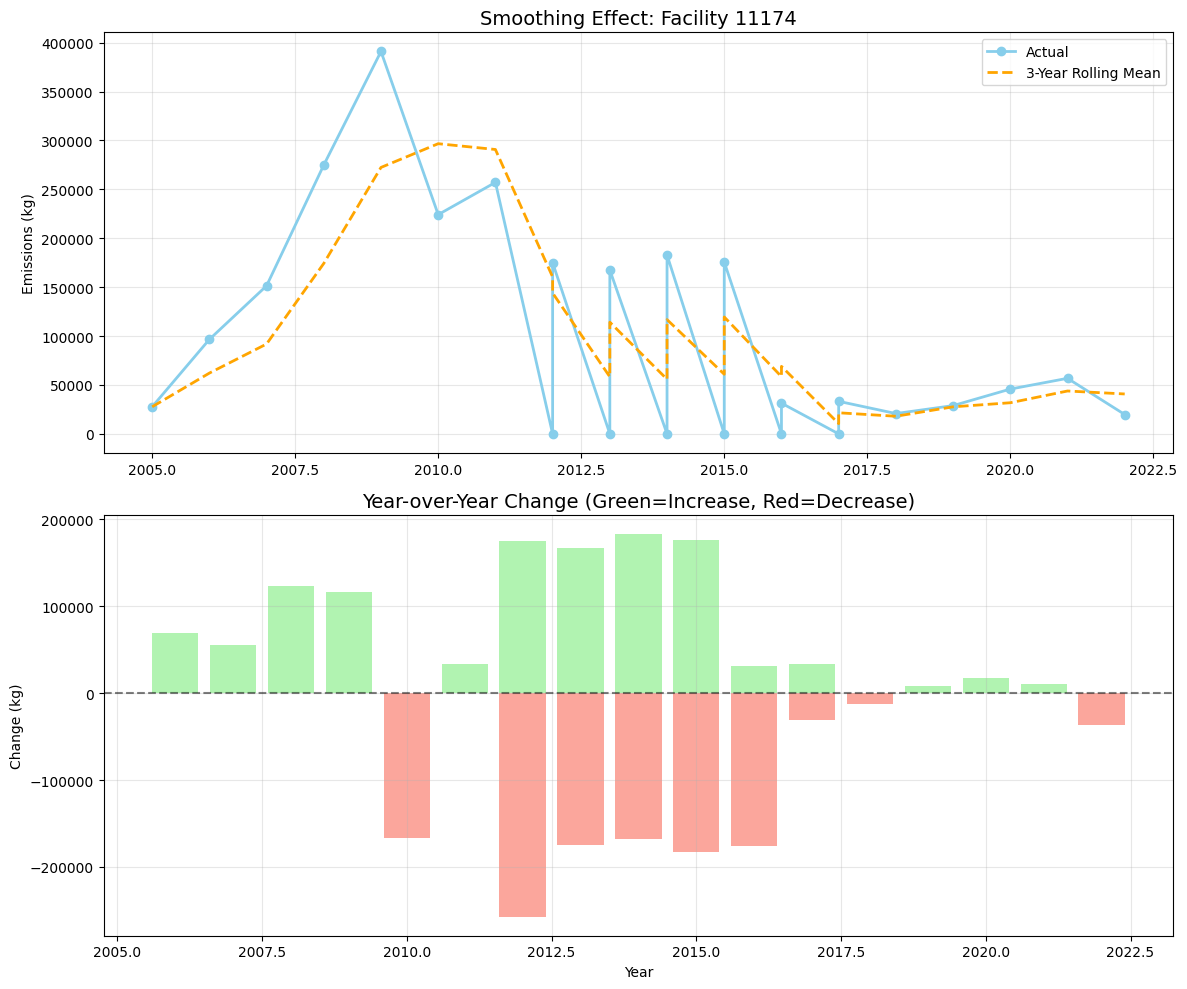

In [77]:

# Select a facility with plenty of history
sample_facility = df1['NPRI_ID'].value_counts().idxmax() #
sample_substance = df1[df1['NPRI_ID'] == sample_facility]['substance_name'].mode()[0] # [cite: 7]

# Filter data for this sample
sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()

# Setup Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Actual vs Rolling Means
ax1.plot(sample_df['reporting_year'], sample_df['total_release_all_kg'],
         marker='o', label='Actual', color='skyblue', linewidth=2)
ax1.plot(sample_df['reporting_year'], sample_df['rolling_mean_3yr'],
         label='3-Year Rolling Mean', color='orange', linestyle='--', linewidth=2) # [cite: 19]
ax1.set_title(f"Smoothing Effect: Facility {sample_facility}", color='black', fontsize=14)
ax1.set_ylabel("Emissions (kg)", color='black')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: YoY Change vs Momentum
# Positive bars (Green) = Increasing emissions, Negative (Red) = Decreasing
colors = ['lightgreen' if x > 0 else 'salmon' for x in sample_df['yoy_change']]
ax2.bar(sample_df['reporting_year'], sample_df['yoy_change'], color=colors, alpha=0.7) # [cite: 28]
ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
ax2.set_title("Year-over-Year Change (Green=Increase, Red=Decrease)", color='black', fontsize=14)
ax2.set_ylabel("Change (kg)", color='black')
ax2.set_xlabel("Year", color='black')
ax2.grid(True, alpha=0.3)

# Styling for dark theme
for ax in [ax1, ax2]:
    ax.tick_params(colors='black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

1. The visualization displays the raw annual emissions alongside the 3-Year Rolling Mean, which is used to reveal the long-term, stable trend by smoothing out year-to-year volatility.  

2. The lower plot shows the Year-over-Year Change, which captures the short-term momentum (acceleration or deceleration) of emissions, an immediate and powerful predictor for the next year's output.

## **7.2 Lag Features**

Visualizing Lag Features for Facility: 11174 (Substance: Carbon monoxide)


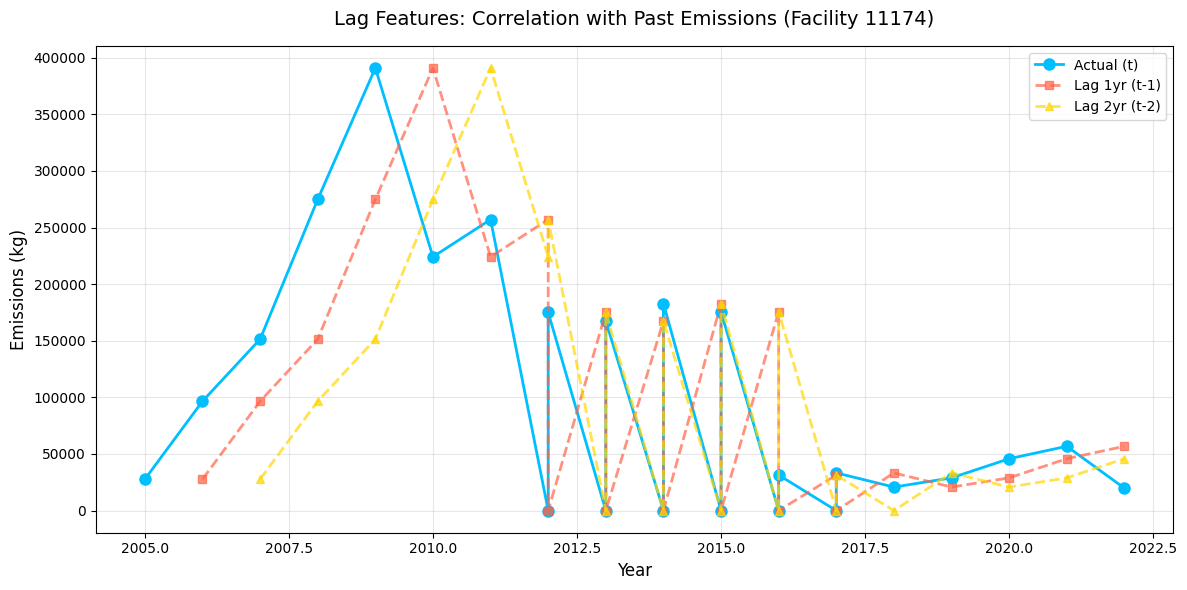

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Setup Sample ---
# Re-filter data for this sample (ensures variable presence)
sample_facility = df1['NPRI_ID'].value_counts().idxmax()
sample_substance = df1[df1['NPRI_ID'] == sample_facility]['substance_name'].mode()[0]

sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()
print(f"Visualizing Lag Features for Facility: {sample_facility} (Substance: {sample_substance})")


fig, ax = plt.subplots(figsize=(12, 6))
years = sample_df['reporting_year']

# Plot actual and lags
ax.plot(years, sample_df['total_release_all_kg'],
        marker='o', linewidth=2, markersize=8, label='Actual (t)', color='#00BFFF') # SkyBlue

ax.plot(years, sample_df['release_lag_1yr'],
        marker='s', linewidth=2, markersize=6, label='Lag 1yr (t-1)',
        color='#FF6347', alpha=0.7, linestyle='--') # Tomato

ax.plot(years, sample_df['release_lag_2yr'],
        marker='^', linewidth=2, markersize=6, label='Lag 2yr (t-2)',
        color='#FFD700', alpha=0.7, linestyle='--') # Gold

ax.set_xlabel('Year', fontsize=12, color='black')
ax.set_ylabel('Emissions (kg)', fontsize=12, color='black')
ax.set_title(f'Lag Features: Correlation with Past Emissions (Facility {sample_facility})',
             fontsize=14, color='black', pad=15)
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This visualization displays the strong autoregressive relationship where past emissions directly influence current emissions.  
The Lag Features ($t-1$, $t-2$) are simply shifted versions of the target variable.  
They serve as essential, high-correlation predictors because a facility's release behavior is highly dependent on its activity in the preceding years.

## **7.3 Rolling Features**



--- 10.6.2 Rolling Features ---


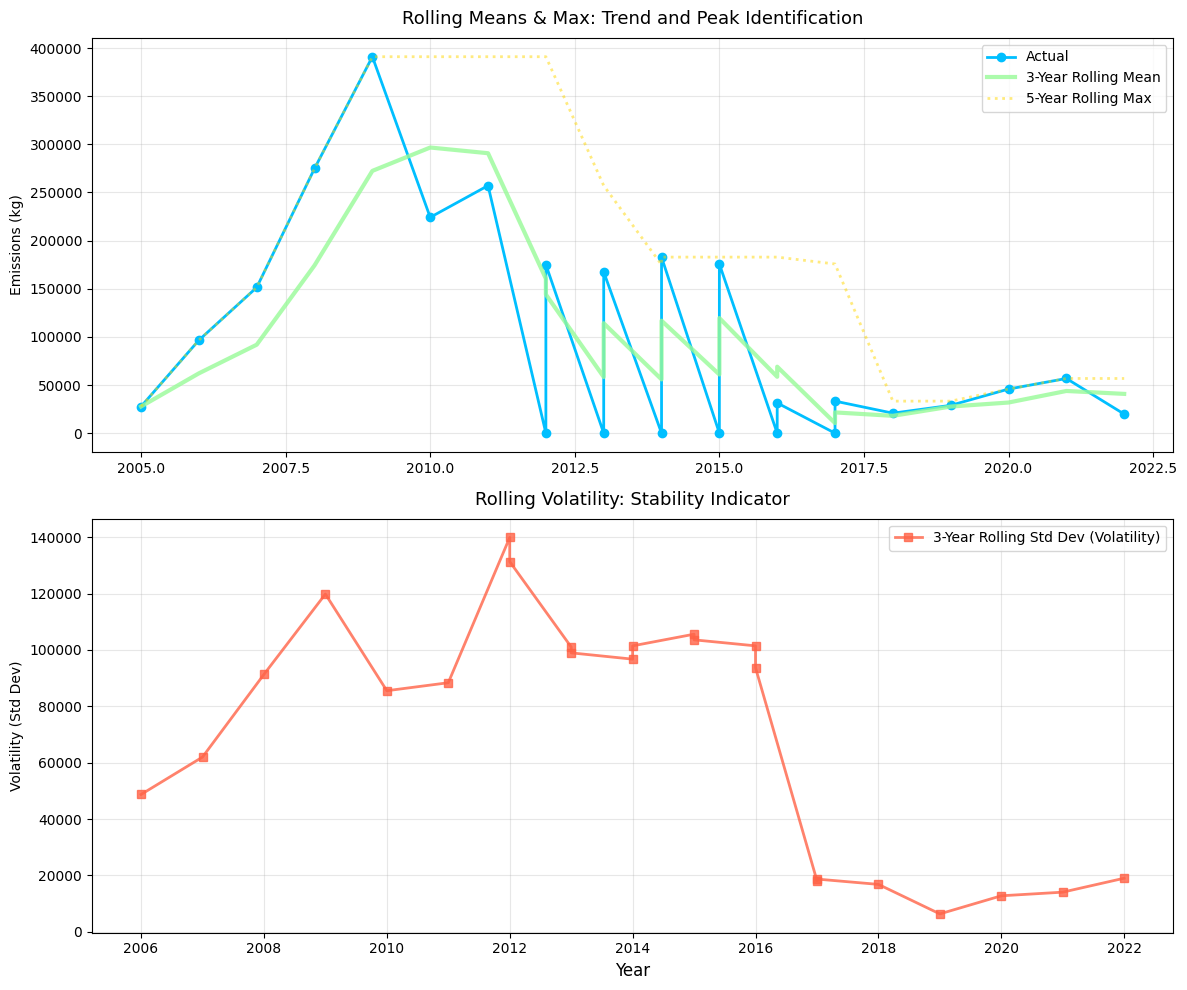

In [79]:

print("\n--- 10.6.2 Rolling Features ---")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Actual vs Rolling Means (Trend)
ax1.plot(sample_df['reporting_year'], sample_df['total_release_all_kg'],
         marker='o', linewidth=2, markersize=6, label='Actual', color='#00BFFF') # SkyBlue
ax1.plot(sample_df['reporting_year'], sample_df['rolling_mean_3yr'],
         linewidth=3, label='3-Year Rolling Mean', color='#98FB98', alpha=0.8) # PaleGreen
ax1.plot(sample_df['reporting_year'], sample_df['rolling_max_5yr'],
         linewidth=2, label='5-Year Rolling Max', color='#FFD700', alpha=0.5, linestyle=':') # Gold
ax1.set_ylabel('Emissions (kg)', color='black')
ax1.set_title('Rolling Means & Max: Trend and Peak Identification', fontsize=13, color='black', pad=10)
ax1.legend(loc='best', fontsize=10)
ax1.grid(alpha=0.3)

# Plot 2: Rolling Standard Deviation (Volatility)
ax2.plot(sample_df['reporting_year'], sample_df['rolling_std_3yr'],
         marker='s', linewidth=2, label='3-Year Rolling Std Dev (Volatility)',
         color='#FF6347', alpha=0.8) # Tomato
ax2.set_xlabel('Year', fontsize=12, color='black')
ax2.set_ylabel('Volatility (Std Dev)', color='black')
ax2.set_title('Rolling Volatility: Stability Indicator', fontsize=13, color='black', pad=10)
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

This visualizations shows the long-term statistical properties of the emissions data.

1. Plot A uses the Rolling Mean to identify the stable trend and the Rolling Max to establish historical peak emission levels.
2. Plot B uses the Rolling Standard Deviation to measure volatility.  

High volatility indicates erratic or unpredictable emissions, providing the model with critical information about the facility's stability.

## **7.4 Trends and Momentum**

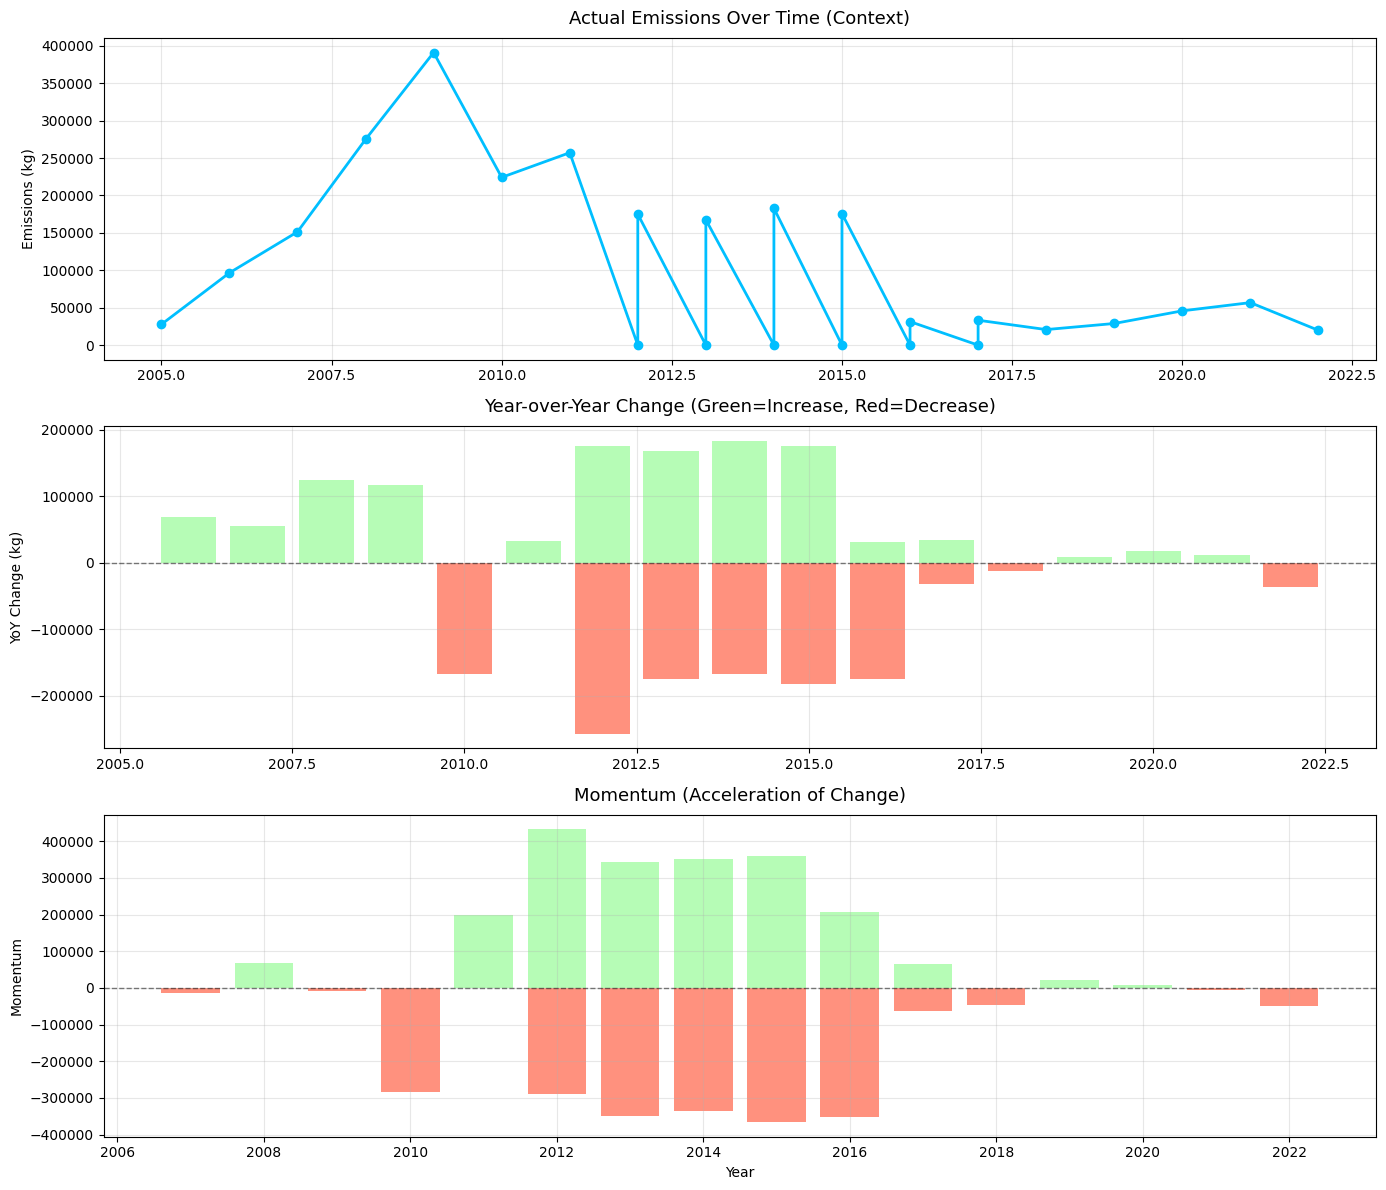

In [80]:
# --- Setup Sample (using the same facility/substance) ---
sample_df = df1[(df1['NPRI_ID'] == sample_facility) &
                      (df1['substance_name'] == sample_substance)].copy()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
years = sample_df['reporting_year']

# Plot 1: Actual emissions (Context)
ax1.plot(years, sample_df['total_release_all_kg'],
         marker='o', linewidth=2, markersize=6, color='#00BFFF')
ax1.set_ylabel('Emissions (kg)', color='black')
ax1.set_title('Actual Emissions Over Time (Context)', fontsize=13, color='black', pad=10)
ax1.grid(alpha=0.3)

# Plot 2: Year-over-year change
if 'yoy_change' in sample_df.columns:
    colors = ['#98FB98' if x > 0 else '#FF6347' for x in sample_df['yoy_change']]
    ax2.bar(years, sample_df['yoy_change'], color=colors, alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax2.set_ylabel('YoY Change (kg)', color='black')
    ax2.set_title('Year-over-Year Change (Green=Increase, Red=Decrease)',
                 fontsize=13, color='black', pad=10)
    ax2.grid(alpha=0.3)

# Plot 3: Momentum (acceleration)
if 'momentum' in sample_df.columns:
    momentum_colors = ['#98FB98' if x > 0 else '#FF6347' for x in sample_df['momentum']]
    ax3.bar(years, sample_df['momentum'], color=momentum_colors, alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax3.set_xlabel('Year', color='black')
    ax3.set_ylabel('Momentum', color='black')
    ax3.set_title('Momentum (Acceleration of Change)', fontsize=13, color='black', pad=10)
    ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

This visualization breaks down the time series into the level (Plot A), the velocity (YoY Change, Plot B), and the acceleration (Momentum, Plot C).  

The Momentum feature specifically captures how quickly the emissions change is itself changing. A high positive momentum means the emissions are increasing at an accelerating rate, which is a key signal for forecasting future growth or decline.

## **7.5 Coal Policy**


--- 10.6.4 Coal & Policy Interaction ---


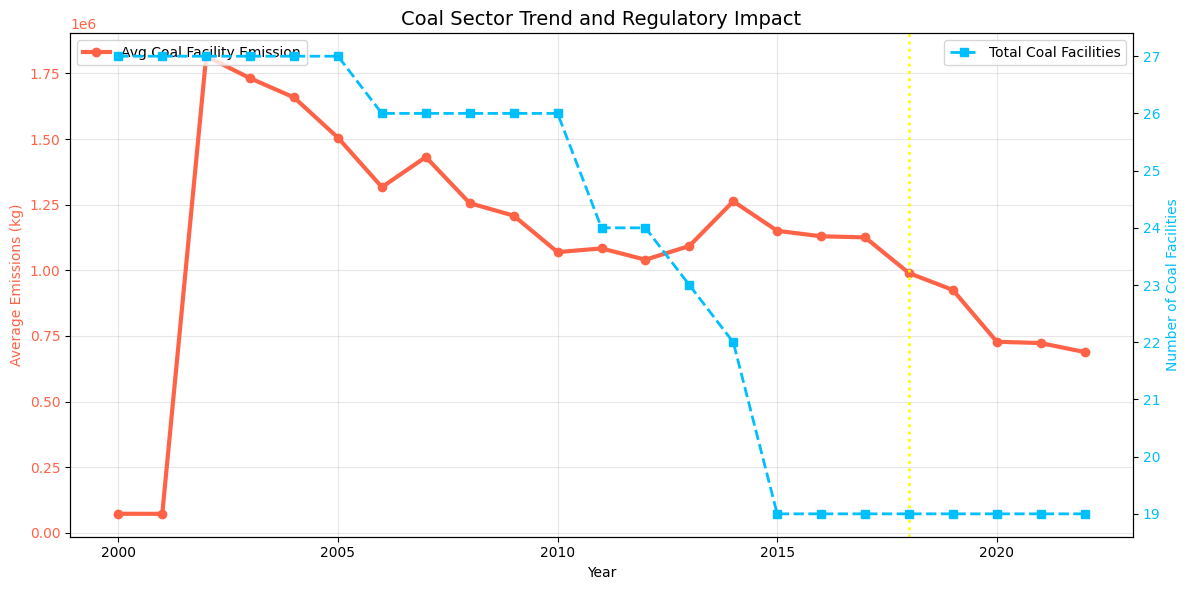

In [81]:

print("\n--- 10.6.4 Coal & Policy Interaction ---")
# Aggregate the average coal activity trend across all coal facilities
coal_trend = df1[df1['is_using_coal'] == 1].groupby('reporting_year').agg(
    Avg_Release=('total_release_all_kg', 'mean'),
    Coal_Count=('NPRI_ID', 'nunique'),
    Avg_YoY_Change=('yoy_change', 'mean')
).reset_index()

# Setup Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: Average Emissions Trend (Coal)
color = '#FF6347'
ax1.set_xlabel('Year', color='black')
ax1.set_ylabel('Average Emissions (kg)', color=color)
ax1.plot(coal_trend['reporting_year'], coal_trend['Avg_Release'],
         marker='o', linewidth=3, label='Avg Coal Facility Emission', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second axis for policy impact (Coal Count)
ax2 = ax1.twinx()
color = '#00BFFF'
ax2.set_ylabel('Number of Coal Facilities', color=color)
ax2.plot(coal_trend['reporting_year'], coal_trend['Coal_Count'],
         marker='s', linewidth=2, label='Total Coal Facilities', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Add vertical line for 2018 (Canada Coal Phase-out Plan)
ax1.axvline(x=2018, color='yellow', linestyle=':', linewidth=2, label='Policy: 2018 Plan')

ax1.set_title('Coal Sector Trend and Regulatory Impact', fontsize=14, color='black')
ax1.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This plot explicitly connects the aggregated emissions trend for coal-using facilities (red line) with the Canadian Coal Phase-out Plan policy year (2018, yellow line).  

Observing the behavior of emissions and the number of facilities before and after 2018 allows the model to learn the regulatory effect.  

This feature helps the model predict how the sector will behave under the future phase-out scenario by 2030, directly addressing the problem objective.

# **8. Data Methodology & Pipeline Overview**

## **8.1 This section outlines the feature engineering, data splitting, and preprocessing strategies used to prepare the NPRI dataset for modeling.**

---

### **1. Feature Selection & Target Definition**

#### **The Target**
We defined our target variable as `total_release_all_kg`. This represents the aggregate release across all relevant substance columns.

#### **The Coal Flag (`is_coal`)**
We engineered a binary flag to identify coal power plants based on substance composition and emission magnitude.

* **Logic:** `substance_name` contains "mercury" **AND** `total_release_all_kg` $\ge 5$.
* **Purpose:** Coal plants have distinct high-mercury emission profiles. This flag allows us to simulate specific "Coal Phase-out" scenarios.

> ** Critical Note on Data Leakage**
> Since `is_coal` is derived from the target variable (`total_release_all_kg`), it is **strictly excluded** from the model input features. It is used *only* for filtering data during training and for post-prediction analysis.

---

### **2. Data Splitting Strategy**

To respect the temporal nature of the data, we utilized a **Chronological Split** rather than a random shuffle.

#### **The Split**
* **Training Set:** Historical data (Earlier years)
* **Testing Set:** Recent data (Later years)

#### **Coal Filtration**
To avoid bias and simulate phase-out scenarios, we applied specific filters:
* **Training:** We created `X_train_without_coal` by removing coal plants. The model learns baseline industrial patterns without the skew of heavy coal emitters.
* **Testing:** We retain flexibility to test on both non-coal plants and the full dataset.

```python
target = 'total_release_all_kg'

# 1. Standard Chronological Split
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test  = test_df.drop(columns=[target])
y_test  = test_df[target]

# 2. Filter Coal out of Training ONLY
X_train_without_coal = X_train[X_train["IsCoal"] == 0]
y_train_without_coal = y_train.loc[X_train_without_coal.index]

# 3. Drop IsCoal flag to prevent leakage
X_train = X_train.drop(columns=["IsCoal"])
X_test  = X_test.drop(columns=["IsCoal"])
X_train_without_coal = X_train_without_coal.drop(columns=["IsCoal"])
```
---
### **3. Feature Engineering & Chronological Sorting**
Before preprocessing, we engineered time-based features to capture trends and momentum.

* Sorting: Data was sorted by NPRI ID, substance_name, and reporting_year to ensure accurate lag calculation.

* New Features:

  * Lags: `release_lag_1yr`, `release_lag_2yr`
  * Rolling Stats: `rolling_mean_3yr`, `rolling_std_3yr`
  * Temporal Markers: `years_since_2000`, `post_2015`, `post_2018`
  * Momentum: Year-over-Year (YoY) changes and cumulative releases.
---
### **4. Preprocessing Pipeline (NPRIProcessor)**
  
We implemented a custom scikit-learn Transformer to standardize data cleaning and transformation. This ensures the exact same logic is applied to Train and Test sets.

| Step | Action | Detail |
| :--- | ---: | :---: |
| 1. Cleaning | Drop Units | Rows with unconvertible units (e.g., g TEQ) are removed. |
| 2. Imputation | Fill Missing | Releases $\rightarrow$ 0; Employees $\rightarrow$ Median.|
| 3. Outliers | Capping | Extreme values capped at the 99th percentile.|
| 4. Transform| Log & Scale | Log-transform skewed features; Standard scale numeric features.|
| 5. Encoding | One-Hot| Categorical features (`province`, `est_method`) are one-hot encoded.|

- **Note:** Boolean flags (e.g., `is_declining`, `post_2015`) are passed through raw, as they do not require scaling.
---
### **5. Computing Total Releases**
To ensure data integrity, the target variable was computed by summing all release columns.
```python
# Summing horizontally.
# If all values are NaN, result is 0.0 (via skipna=True)
df1['total_release_all_kg'] = df1[release_cols].sum(axis=1, skipna=True)
```
* **Why:** Prevents mislabeling rows as NaN and ensures a continuous numeric target for regression.

---
### **6. Scenario Analysis and Summary**

**Filtering Coal for Scenario Analysis**

We structured our pipeline to allow "Scenario Analysis":

 * **Training Phase**: Filtered out coal plants so the model learns the behavior of standard industries.
 * **Testing Phase**: We can feed coal plants into the model (with modifications) or non-coal plants to test general accuracy.

    This allows us to answer the question: *"If coal plants behaved like standard industries (or were phased out), what would emissions look like?"*
---
### **Summary**

* Target: `total_release_all_kg`

* Leakage Prevention: `is_coal` used for filtering only; Chronological splitting used.

* Preprocessing: Robust pipeline handling outliers, missing values, and scaling.

* Goal: A model trained on non-coal behavior that can accurately predict emissions for scenario analysis (e.g., Coal Phase-out).

# **9. Pipeline**

## 9.1 NPRI Processor  

The NPRIProcessor is a custom transformer responsible for comprehensive data cleaning, feature engineering, and scaling.  
It handles imputation, outlier capping, log transformation, standardization of numeric features, and one-hot encoding of categorical features, ensuring data is model-ready.


In [82]:
class NPRIProcessor(BaseEstimator, TransformerMixin):
    """
    End-to-end preprocessing for the NPRI releases -> model-ready dataset.
    - Filters to NAICS_code (default '221112') inside transformer.
    - Drops rows with non-convertible units (e.g., GTEQ).
    - Imputes releases with 0; employees_number with median.
    - Capping using training 99th percentile on selected columns.
    - Adds total_release (sum of specified release columns).
    - Applies log1p to chosen columns.
    - Scales numeric features (StandardScaler).
    - One-hot encodes chosen categorical columns (province, est_method).
    Returns a pandas.DataFrame with features.
    """

    def __init__(
        self,
        units_to_drop=None,
        # Removed coal_keyword as it's not used internally by the processor and caused cloning issues.
        release_cols=None,
        median_impute_cols=None,
        zero_impute_cols=['release_lag_1yr', 'release_lag_2yr', 'release_lag_3yr',
            'rolling_mean_3yr', 'rolling_std_3yr', 'rolling_max_3yr',
            'rolling_mean_5yr', 'rolling_std_5yr', 'rolling_max_5yr',
            'yoy_change', 'yoy_pct_change', 'momentum', 'cumulative_release',
            'is_declining','rta_fugitive', 'rta_other_non_point', 'rta_road_dust', 'rta_spills',
        'rta_stack_point', 'rta_storage_handling', 'rtl_leaks', 'rtl_other',
        'rtl_spills', 'rtwb_direct_discharges', 'rtwb_leaks', 'rtwb_spills'],
        cap_cols=None,
        cap_quantile=0.99,
        log_cols=None,
        numeric_scale_cols=None,
        categorical_cols=None,
        drop_cols=None,
        keep_cols_extra=None
    ):



        # Behavior selectors
        self.units_to_drop = units_to_drop if units_to_drop is not None else ['g TEQ']  # drop GTEQ by default
        # self.coal_keyword = coal_keyword.lower() # Removed as it's not used internally and caused cloning issues.

        # Column groups
        # Example placeholders - override when instantiating
        self.release_cols = release_cols or [
        'rta_fugitive', 'rta_other_non_point', 'rta_road_dust', 'rta_spills',
        'rta_stack_point', 'rta_storage_handling', 'rtl_leaks', 'rtl_other',
        'rtl_spills', 'rtwb_direct_discharges', 'rtwb_leaks', 'rtwb_spills'
        ]
        self.median_impute_cols = median_impute_cols or ['employees_number', 'latitude', 'longitude']
        self.zero_impute_cols = zero_impute_cols or self.release_cols.copy()
        self.cap_cols = cap_cols or ['employees_number',
                                     'rta_other_non_point',
                                    'rtl_other',
                                     'rtl_spills',
                                     'rtwb_spills']   # columns to percentile-cap
        self.cap_quantile = cap_quantile

        self.log_cols = log_cols or ['rta_fugitive',
                                     'rta_stack_point',
                                    'rtwb_direct_discharges',
                                     'sum_release2all']   # columns to log1p

        self.numeric_scale_cols = numeric_scale_cols or ['rta_fugitive',
                                                         'rta_other_non_point',
                                                         'rta_road_dust',
                                                         'rta_spills',
                                                         'rta_stack_point',
                                                         'rta_storage_handling',
                                                         'rtl_leaks',
                                                         'rtl_other',
                                                         'rtl_spills',
                                                         'rtwb_direct_discharges',
                                                         'rtwb_leaks',
                                                         'rtwb_spills',
                                                         'employees_number',
                                                         'latitude',
                                                         'longitude',
                                                         'release_lag_1yr',
                                                         'release_lag_2yr',
                                                         'release_lag_3yr',
                                                         'rolling_mean_3yr',
                                                         'rolling_std_3yr',
                                                         'rolling_max_3yr',
                                                         'rolling_mean_5yr',
                                                         'rolling_std_5yr',
                                                         'rolling_max_5yr',
                                                         'yoy_change',
                                                         'yoy_pct_change',
                                                         'momentum',
                                                         'cumulative_release',
                                                         'years_since_2000']  # numeric columns to scale after imputation and total_release

        self.categorical_cols = categorical_cols or ['province',
                                                     'est_method'
                                                                  ]

        self.drop_cols = drop_cols or ['sum_release2all']  # columns to drop early if present

        self.keep_cols_extra = keep_cols_extra or ['is_declining',
                                                      'post_2015',
                                                      'post_2018']  # any extra columns to carry forward unchanged

        # internal objects to be computed on fit
        self.median_values_ = {}
        self.cap_upper_ = {}
        self.scaler_ = None
        self.ohe_ = None
        self.ohe_feature_names_ = []
        self.fitted_ = False

    # ---------- fit ----------
    def fit(self, X: pd.DataFrame, y=None):
        df = X.copy()

        # Defensive cleanup of column names (remove leading/trailing whitespace/tabs)
        df.columns = df.columns.str.strip().str.replace(r'\s+', '', regex=True)

        # 3) Compute median for median_impute_cols
        for col in self.median_impute_cols:
            if col in df.columns:
                self.median_values_[col] = df[col].median()
            else:
                self.median_values_[col] = 0.0  # fallback

        # 4) Compute percentile upper bound for cap_cols
        for col in self.cap_cols:
            if col in df.columns:
                self.cap_upper_[col] = df[col].quantile(self.cap_quantile)
            else:
                self.cap_upper_[col] = None

        # 5) Fit scaler on numeric_scale_cols (need to impute first for fit)
        numeric_for_scaling = []
        for col in self.numeric_scale_cols:
            if col in df.columns:
                numeric_for_scaling.append(col)

        if numeric_for_scaling:
            # create a temp df copy and impute median or 0 for fitting scaler
            tmp = df[numeric_for_scaling].copy()
            for col in tmp.columns:
                if col in self.median_values_:
                    tmp[col] = tmp[col].fillna(self.median_values_[col])
                elif col in self.zero_impute_cols:
                    tmp[col] = tmp[col].fillna(0)
                else:
                    tmp[col] = tmp[col].fillna(0)
            self.scaler_ = StandardScaler().fit(tmp)
        else:
            self.scaler_ = None

        # 6) Fit one-hot encoder for categorical columns
        cat_cols_for_ohe = [c for c in self.categorical_cols if c in df.columns]
        if cat_cols_for_ohe:
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_df = df[cat_cols_for_ohe].astype(object).fillna('UNKNOWN').astype(str)
            self.ohe_ = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            self.ohe_ = self.ohe_.fit(cat_df)
            # build feature names
            ohe_names = []
            try:
                ohe_names = list(self.ohe_.get_feature_names_out(cat_cols_for_ohe))
            except Exception:
                # fallback
                for i, c in enumerate(cat_cols_for_ohe):
                    cats = self.ohe_.categories_[i]
                    ohe_names.extend([f"{c}__{cat}" for cat in cats])
            self.ohe_feature_names_ = ohe_names
        else:
            self.ohe_ = None
            self.ohe_feature_names_ = []

        self.fitted_ = True
        return self

    # ---------- transform ----------
    def transform(self, X: pd.DataFrame, y=None):
        if not self.fitted_:
            raise RuntimeError("NPRIProcessor must be fitted before transform(). Call fit(X) first.")

        df = X.copy()

        # Defensive cleanup of column names (remove leading/trailing whitespace/tabs)
        df.columns = df.columns.str.strip().str.replace(r'\s+', '', regex=True)

        # Safety: ensure all column names expected are present even if missing (fill with NaN)
        # (this helps when users didn't pass exact columns)
        for c in set(self.median_impute_cols + self.zero_impute_cols + self.cap_cols + self.log_cols +
                     self.numeric_scale_cols + self.categorical_cols + self.release_cols + self.keep_cols_extra):
            if c not in df.columns:
                df[c] = np.nan


        # 2) Drop rows with units we cannot convert (GTEQ) - we already decided to remove them
        if 'units' in df.columns and self.units_to_drop:
            df = df[~df['units'].isin(self.units_to_drop)].copy()


        # 4) Impute releases with 0
        for col in self.zero_impute_cols:
            if col in df.columns:
                df[col] = df[col].fillna(0)

        # 5) Impute median cols (employees_number) with stored median
        # Convert to float first so we can safely store non-integer medians
        for col in self.median_values_:
            if col in df.columns:
                df[col] = df[col].astype(float).fillna(self.median_values_[col])

        # 6) Cap selected columns using fitted percentiles
        for col, upper in self.cap_upper_.items():
            if upper is not None and col in df.columns:
                df[col] = df[col].mask(df[col] > upper, upper)



        # 8) Log-transform selected columns (log1p)
        for col in self.log_cols:
            if col in df.columns:
                # ensure non-negative prior to log (should be, since releases >= 0)
                df[col] = np.log1p(df[col].clip(lower=0).astype(float))

        # 9) Prepare numeric features for scaling
        numeric_present = [c for c in self.numeric_scale_cols if c in df.columns]
        numeric_array = np.zeros((len(df), 0))
        if numeric_present:
            num_df = df[numeric_present].copy()
            # fill remaining NaNs defensively
            for col in num_df.columns:
                if col in self.median_values_:
                    num_df[col] = num_df[col].fillna(self.median_values_[col])
                elif col in self.zero_impute_cols:
                    num_df[col] = num_df[col].fillna(0)
                else:
                    num_df[col] = num_df[col].fillna(0)
            if self.scaler_ is not None:
                numeric_array = self.scaler_.transform(num_df)
            else:
                numeric_array = num_df.values

        # 10) Encode categorical columns with fitted OHE
        cat_present = [c for c in self.categorical_cols if c in df.columns]
        cat_array = np.zeros((len(df), 0))
        if self.ohe_ is not None and cat_present:
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_df = df[cat_present].astype(object).fillna('UNKNOWN').astype(str)
            cat_array = self.ohe_.transform(cat_df)
        elif cat_present:
            # fallback: simple label as string columns (not ideal for linear model but safe)b
            # Convert to object dtype first to allow adding new string 'UNKNOWN'
            cat_array = df[cat_present].astype(object).fillna('UNKNOWN').astype(str).values

        # 11) Build final DataFrame: numeric_scaled + ohe features + any extras + is_coal
        feature_names = []
        final_arrays = []

        # Numeric columns (scaled) -> names same as numeric_present
        if numeric_present:
            feature_names.extend(numeric_present)
            final_arrays.append(numeric_array)

        # OHE columns -> using stored feature names
        if self.ohe_ is not None and len(self.ohe_feature_names_) > 0:
            feature_names.extend(self.ohe_feature_names_)
            final_arrays.append(cat_array)
        elif cat_present:
            # fallback: keep original categorical names (string) - as single columns each
            feature_names.extend(cat_present)
            final_arrays.append(cat_array)

        # keep extra raw columns if specified
        if self.keep_cols_extra:
            extras = [c for c in self.keep_cols_extra if c in df.columns]
            if extras:
                feature_names.extend(extras)
                final_arrays.append(df[extras].values)

        # Creating my final X dataframe
        if final_arrays:
            X_final = np.hstack(final_arrays)
        else:
            # nothing to concatenate (shouldn't happen) - make empty DF
            X_final = np.zeros((len(df), 0))

        # Construct DataFrame
        df_out = pd.DataFrame(X_final, columns=feature_names, index=df.index)

        # If any numeric columns were kept as strings in fallback, try to coerce them to numeric where possible
        for col in df_out.columns:
            df_out[col] = pd.to_numeric(df_out[col], errors='ignore')

        # Return DataFrame (model-ready): features
        return df_out

    # convenience method - run fit_transform to get model-ready dataframe
    def fit_transform(self, X: pd.DataFrame, y=None):
        return self.fit(X, y).transform(X, y)

## 9.2 Preparing Data for Correlation

We're running a preliminary fit-transform on X_train using the NPRIProcessor.  
This is done ONLY to generate the full set of processed features and calculate correlations for our initial filter (Method 1).  
The data sets generated here (X_train_processed, X_test_processed_full) are strictly for analysis, not for the final model fit.

In [83]:
class FixedFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Custom transformer to select a fixed list of features determined
    via external analysis (e.g., the Correlation Filter).
    """
    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # CRITICAL FIX START: Check for and add missing features (like missing provinces)
        X_df = pd.DataFrame(X)
        current_features = set(X_df.columns)
        required_features = set(self.feature_list)

        missing_features = required_features - current_features

        if missing_features:
            print(f"Adding {len(missing_features)} zero-filled feature(s) for robust CV.")
            for feature in missing_features:
                # Add the missing column filled with 0s (as it represents an absent category)
                X_df[feature] = 0

        # CRITICAL FIX END

        # Now, select the final feature list. The necessary columns are guaranteed to exist.
        try:
            return X_df[self.feature_list]
        except KeyError as e:
            # This should now only happen if a non-OHE column is missing, which is unlikely.
            raise ValueError(f"Feature list error: A required base feature is missing: {e}")

## 9.3 External Feature Analysis: Multicollinearity and Correlation Filter (Method 1)

Before any model-based selection, we calculate the correlation matrix for all features that survived preprocessing.  
The heatmap helps us visually identify highly correlated feature pairs (multicollinearity), which can destabilize our linear model.

In [84]:
# 1. Temporarily fit and transform X_train using NPRI processor
# This is safe as it only uses X_train for learning and transformation.
analysis_processor = NPRIProcessor()
X_train_processed = analysis_processor.fit_transform(X_train, y_train)

# NOTE: We keep a copy of the fully processed X_test just for future analysis/comparison,
# but the final model will use the pipeline for transformation.
X_test_processed_full = analysis_processor.transform(X_test_without_coal)

print(f"X_train_processed shape (Full Feature Set): {X_train_processed.shape}")

X_train_processed shape (Full Feature Set): (18757, 54)


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


### 9.3.1 Feature Exploration and Correlation

c:\Users\pfros\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pfros\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


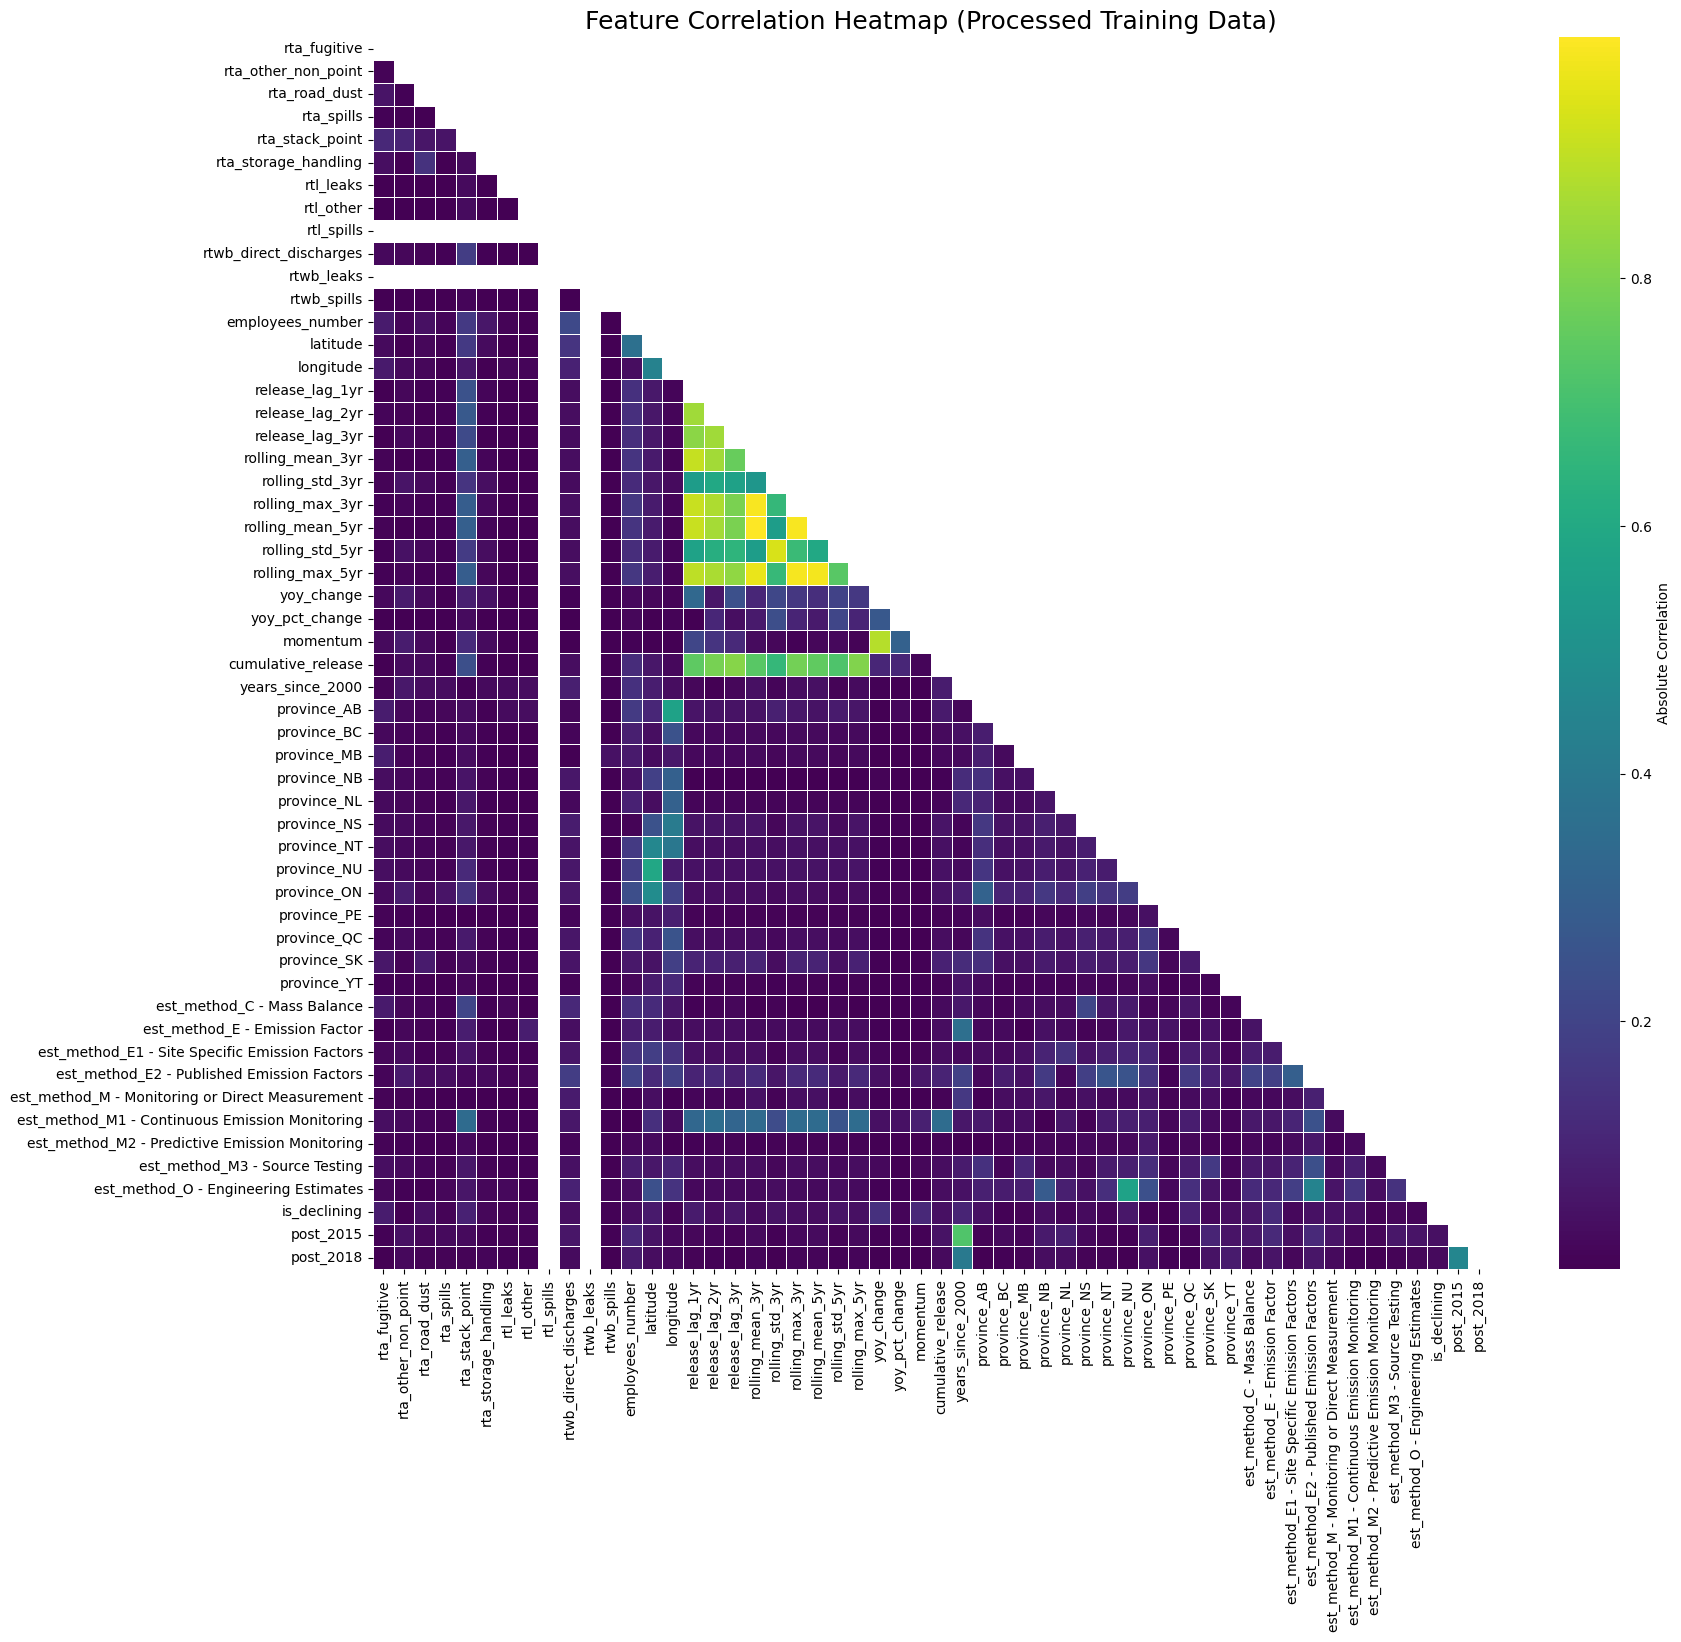

In [85]:
# Calculate Correlation Matrices
corr_matrix = X_train_processed.corr().abs()
# Calculate correlation to target for tie-breaking
target_corr = X_train_processed.corrwith(y_train).abs().sort_values(ascending=False)

# 4.2.1 Plotting Correlation Heatmap
plt.figure(figsize=(18, 16))
# Create a mask for the upper triangle for cleaner visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            cmap='viridis',
            linewidths=.5,
            mask=mask, # Apply the mask
            annot=False,
            cbar_kws={'label': 'Absolute Correlation'})
plt.title('Feature Correlation Heatmap (Processed Training Data)', fontsize=18)
plt.show()

### 9.3.2 Analyzing Multicollinearity and Executing Method 1 of Feature Selection  

Implementing the Fixed Correlation Filter (Method 1) to address multicollinearity by identifying feature pairs with an absolute correlation of 0.90 or greater.  
For each highly correlated pair, the feature less correlated with the target variable is dropped, resulting in the stable, refined features_corr_selected list for subsequent modeling steps.

Highly Correlated Pairs (|r| >= 0.90) found: 10


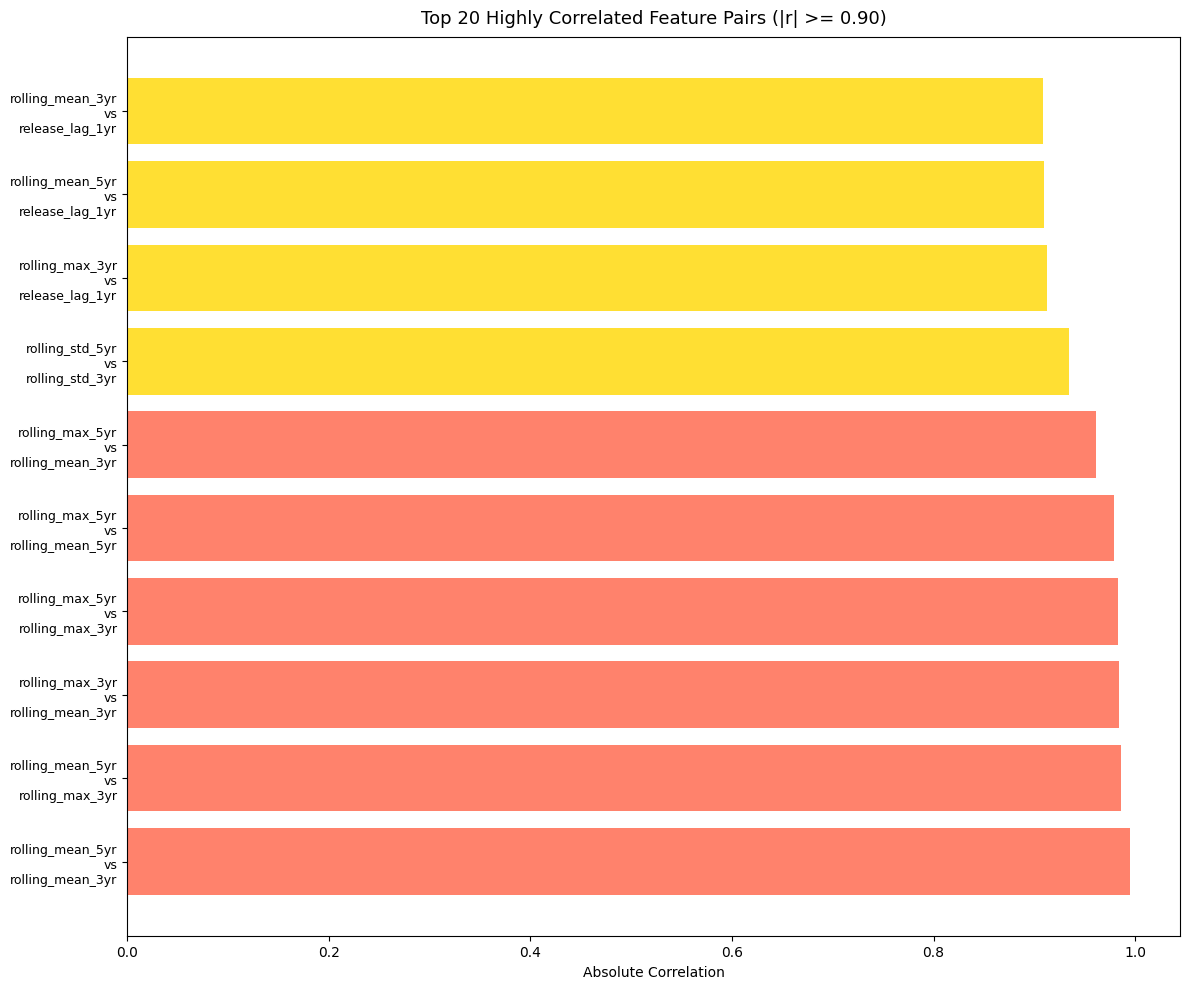

Features selected by Method 1 (fixed list): 50
Features dropped by Method 1: 4


In [86]:

# 1. Prepare Multicollinearity DataFrame (Upper triangle of corr_matrix, excluding diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
multicollinearity_df = upper.unstack().sort_values(ascending=False).dropna().reset_index()
multicollinearity_df.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter for pairs above the 0.90 threshold
multicollinearity_df = multicollinearity_df[multicollinearity_df['Correlation'] >= 0.90]

print(f"Highly Correlated Pairs (|r| >= 0.90) found: {len(multicollinearity_df)}")

# 2. Plot Multicollinearity Bars (Top 20 pairs)
if len(multicollinearity_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 10))
    pairs_to_plot = multicollinearity_df.head(20) # Limit to top 20 for readability

    feature_pairs = [f"{row['Feature_1']}\nvs\n{row['Feature_2']}"
                     for _, row in pairs_to_plot.iterrows()]

    colors_mult = ['#FF6347' if abs(x) > 0.95 else '#FFD700'
                   for x in pairs_to_plot['Correlation'].values]

    ax.barh(range(len(pairs_to_plot)),
            pairs_to_plot['Correlation'].abs().values,
            color=colors_mult,
            alpha=0.8)

    ax.set_yticks(range(len(pairs_to_plot)))
    ax.set_yticklabels(feature_pairs, fontsize=9)
    ax.set_title('Top 20 Highly Correlated Feature Pairs (|r| >= 0.90)', fontsize=13, color='black', pad=10)
    ax.set_xlabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()

# 3. Execute Multicollinearity Removal Logic
features_to_drop = set()
features_corr_selected = list(X_train_processed.columns)

for idx, row in multicollinearity_df.iterrows():
    f1 = row['Feature_1']
    f2 = row['Feature_2']

    # Check if neither feature has already been marked for dropping
    if f1 not in features_to_drop and f2 not in features_to_drop:
        # Keep the one with higher absolute correlation to the target (for tie-breaking)
        corr1 = target_corr.get(f1, 0)
        corr2 = target_corr.get(f2, 0)

        if corr1 >= corr2:
            features_to_drop.add(f2)
            if f2 in features_corr_selected: features_corr_selected.remove(f2)
        else:
            features_to_drop.add(f1)
            if f1 in features_corr_selected: features_corr_selected.remove(f1)

# The list features_corr_selected is now the FIXED result of Method 1
print(f"Features selected by Method 1 (fixed list): {len(features_corr_selected)}")
print(f"Features dropped by Method 1: {len(features_to_drop)}")

### 9.3.3 Building and Fitting the data into the pipeline


The final Pipeline integrates preprocessing and three sequential feature selection methods (Filter, Wrapper, and Embedded) to refine the feature set before training the final LinearRegression model.  
This multi-step approach prevents data leakage and ensures features are transformed correctly before selection.

**Preprocessor:** NPRIProcessor (Cleaning, Scaling, OHE).

**Filter Method:** FixedFeatureSelector (Applies the fixed list from correlation analysis, Method 1).

**Wrapper Method:** RFE (Recursive Feature Elimination) with LinearRegression (Method 3).

**Embedded Method:** SelectFromModel with LassoCV (L1-regularization based selection, Method 5).

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LinearRegression, LassoCV

# Create an instance of the fixed selector using the result from Method 1
correlation_selector_instance = FixedFeatureSelector(features_corr_selected)

print("\n--- 4.3 Feature Selection and Final Pipeline (Integrated) ---")
# The Pipeline structure ensures all preprocessing and selection steps run
# sequentially and prevent data leakage.

final_modeling_pipeline = Pipeline(steps=[
    # 1. Preprocessor (Cleans, scales, OHE, and creates all engineered features)
    ('preprocessor', NPRIProcessor()),

    # 2. Filter Method (Method 1): Applies the FIXED list from the external analysis
    # This reduces the feature space before the complex model-based methods run.
    ('correlation_filter_fixed', correlation_selector_instance),

    # 3. Wrapper Method (RFE): Reduces features from the filtered set
    ('rfe_selection', RFE(
        estimator=LinearRegression(),
        n_features_to_select=25, # to modify
        step=1)
    ),

    # 4. Embedded Method (Lasso): Refines selection based on L1 regularization
    ('lasso_selection', SelectFromModel(
        estimator=LassoCV(cv=5, max_iter=10000, random_state=42),
        threshold='median') # Selects features with coefficients above the median
    ),

    # 5. Final Model
    #('final_model', LinearRegression()) #This has not been decided, just a placeholder
])

print("\n--- 4.4 Fitting Final Modeling Pipeline ---")
# This fit runs the entire sequence: Process -> Filter -> RFE -> Lasso -> Train Model
final_modeling_pipeline.fit(X_train,y_train)

print("Pipeline fitted successfully. The final feature set is dynamically refined within the pipeline.")


--- 4.3 Feature Selection and Final Pipeline (Integrated) ---

--- 4.4 Fitting Final Modeling Pipeline ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Pipeline fitted successfully. The final feature set is dynamically refined within the pipeline.


## 9.4 Extracting the Final Selected Features

Extracting the final list of selected features by sequentially applying the filtering masks from the three feature selection steps completed before.
Just to understand, not to be use by the model

In [88]:
# 1. Get the feature list *after* the Fixed Correlation Filter (Method 1)
fixed_filter_features = final_modeling_pipeline.named_steps['correlation_filter_fixed'].feature_list

# 2. Get the feature list *after* RFE (Method 3)
rfe_selector = final_modeling_pipeline.named_steps['rfe_selection']
rfe_mask = rfe_selector.support_

# Apply the RFE mask to the features that survived the Fixed Filter
features_after_rfe = [
    feature
    for feature, is_selected in zip(fixed_filter_features, rfe_mask)
    if is_selected
]

# 3. Get the feature list *after* Lasso (Method 5)
lasso_selector = final_modeling_pipeline.named_steps['lasso_selection']
lasso_mask = lasso_selector.get_support()

# Apply the Lasso mask to the features that survived RFE
final_selected_features = [
    feature
    for feature, is_selected in zip(features_after_rfe, lasso_mask)
    if is_selected
]

print(f"Result: Features after Fixed Filter (Method 1): {len(fixed_filter_features)}")
print(f"Result: Features after RFE (Method 3): {len(features_after_rfe)}")
print(f"Result: FINAL Features used by Model (After Lasso/Method 5): {len(final_selected_features)}")
print("\nTeam, this is our Final Feature List:")
print(final_selected_features)

Result: Features after Fixed Filter (Method 1): 50
Result: Features after RFE (Method 3): 25
Result: FINAL Features used by Model (After Lasso/Method 5): 13

Team, this is our Final Feature List:
['rta_other_non_point', 'rta_road_dust', 'latitude', 'rolling_std_5yr', 'province_NB', 'province_NL', 'province_NT', 'province_ON', 'est_method_C - Mass Balance', 'est_method_M1 - Continuous Emission Monitoring', 'est_method_M3 - Source Testing', 'est_method_O - Engineering Estimates', 'is_declining']


In [89]:
# Retrieve the transformed X_train data
X_train_transformed_array = final_modeling_pipeline.transform(X_train)

# Retrieve the transformed X_test data
X_test_without_coal_transformed_array = final_modeling_pipeline.transform(X_test_without_coal)
X_test_transformed_array = final_modeling_pipeline.transform(X_test)

# Convert arrays to DataFrames for easier inspection
X_train_transformed = pd.DataFrame(X_train_transformed_array, columns=final_selected_features, index=X_train.index)
X_test_withouth_coal_transformed = pd.DataFrame(X_test_without_coal_transformed_array, columns=final_selected_features, index=X_test_without_coal.index)
X_test_transformed = pd.DataFrame(X_test_transformed_array, columns=final_selected_features, index=X_test.index)

print(f"Shape of X_train_transformed: {X_train_transformed.shape}")
print(f"Shape of X_test_transformed: {X_test_transformed.shape}")
print(f"Shape of X_test_withouth_coal_transformed: {X_test_withouth_coal_transformed.shape}")
display(X_train_transformed.head())
display(X_test_transformed.head())
display(X_test_withouth_coal_transformed.head())

Shape of X_train_transformed: (18757, 13)
Shape of X_test_transformed: (4132, 13)
Shape of X_test_withouth_coal_transformed: (2667, 13)


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


,rta_other_non_point,rta_road_dust,latitude,rolling_std_5yr,province_NB,province_NL,province_NT,province_ON,est_method_C - Mass Balance,est_method_M1 - Continuous Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,is_declining
0,-0.074906,-0.052658,0.198161,-0.159697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.074906,-0.052658,0.198161,-0.159697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.074906,-0.052658,0.198161,-0.159697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.074906,-0.052658,0.198161,-0.159697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.074906,-0.052658,0.198161,-0.159697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,rta_other_non_point,rta_road_dust,latitude,rolling_std_5yr,province_NB,province_NL,province_NT,province_ON,est_method_C - Mass Balance,est_method_M1 - Continuous Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,is_declining
26,-0.074906,-0.052658,0.198161,-0.159674,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
27,-0.074906,-0.052658,0.198161,-0.159677,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
28,-0.074906,-0.052658,0.198161,-0.159690,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29,-0.074906,-0.052658,0.198161,-0.159678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
50,-0.074906,-0.052658,0.198161,-0.159695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,rta_other_non_point,rta_road_dust,latitude,rolling_std_5yr,province_NB,province_NL,province_NT,province_ON,est_method_C - Mass Balance,est_method_M1 - Continuous Emission Monitoring,est_method_M3 - Source Testing,est_method_O - Engineering Estimates,is_declining
3119,-0.074906,-0.052658,-0.499119,-0.159696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3120,-0.074906,-0.052658,-0.499119,-0.159696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3121,-0.074906,-0.052658,-0.499119,-0.159691,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3139,-0.074906,-0.052658,-0.499119,-0.125276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3140,-0.074906,-0.052658,-0.499119,-0.123694,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **10. Model Training and Evaluation**

## **10.1 Evaluation Metrics**

We first define the custom metrics (especially MAPE) that are not native to scikit-learn. We also define a wrapper function to calculate all required metrics, including the vital "physical plausibility check" (non-negative constraint) by clipping predictions to a minimum of zero.

In [90]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate a more robust MAPE, using a small epsilon (e.g., 1.0)
    to prevent division by zero for y_true = 0.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1.0 # Using 1 kg as the minimum acceptable denominator

    # Calculate the percentage error, adding epsilon to the denominator for safety
    percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))

    # Return the mean of the percentage error
    return np.mean(percentage_error) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-8):
    """
    Calculates the Symmetric Mean Absolute Percentage Error (SMAPE).
    Formula: (1/n) * sum(|y_true - y_pred| / ((|y_true| + |y_pred|) / 2)) * 100
    Adds a small epsilon to the denominator to prevent division by zero.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Handle cases where both y_true and y_pred are zero, or very close to it.
    # In such cases, the term becomes 0, which means 0% error.
    # Otherwise, add epsilon to avoid division by zero if denominator is zero due to
    # one being zero and the other being non-zero.
    ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
    return np.mean(ratio) * 100

def mean_absolute_scaled_error(y_true, y_pred, y_train_raw, seasonality=1):
    """
    Calculates the Mean Absolute Scaled Error (MASE).
    Requires the raw training data (y_train_raw) to compute the scaling factor
    from a naive forecast.
    seasonality: The seasonal period for the naive forecast (e.g., 1 for non-seasonal).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_train_raw = np.array(y_train_raw)

    # Calculate the naive forecast error on the training data
    if len(y_train_raw) <= seasonality:
        # Not enough data to calculate a meaningful naive forecast for scaling
        return np.nan # Or a large number to indicate error

    # For MASE, the denominator is typically the mean absolute error of a one-step naive forecast
    # on the *training* data. For non-seasonal data, this is abs(y_t - y_{t-1}).
    mae_naive_train = np.mean(np.abs(y_train_raw[seasonality:] - y_train_raw[:-seasonality]))

    if mae_naive_train == 0:
        # Avoid division by zero if the naive forecast on training data had no error
        return np.inf

    # Calculate MAE on the test data
    mae_test = np.mean(np.abs(y_true - y_pred))

    return mae_test / mae_naive_train

def weighted_absolute_percentage_error(y_true, y_pred):
    """
    Calculates the Weighted Absolute Percentage Error (WAPE).
    Formula: sum(|y_true - y_pred|) / sum(|y_true|) * 100
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    sum_abs_diff = np.sum(np.abs(y_true - y_pred))
    sum_abs_true = np.sum(np.abs(y_true))

    if sum_abs_true == 0:
        return np.nan # Or 0 if both are zero, or inf if diff > 0

    return (sum_abs_diff / sum_abs_true) * 100

def evaluate_model_metrics(y_true_log, y_pred_log_raw, y_train_raw_for_mase=None):
    """
    1. Apply inverse transformation (expm1).
    2. Apply physical plausibility check (Non-Negative and handle overflow).
    3. Calculates metrics on the *raw, real-world scale*.
    """

    # STEP 1: Inverse Transform to the original scale (kg)
    # y_true_raw is the original y_test (or y_test_without_coal)
    y_true_raw = np.expm1(y_true_log)

    # y_pred_raw_kg is the raw prediction on the kg scale
    y_pred_raw_kg = np.expm1(y_pred_log_raw)

    # STEP 2: Apply physical plausibility check (Non-Negative and handle potential overflow)
    # Clip to a practical large number to prevent infinity if expm1 overflows
    # A reasonable upper bound could be derived from the actual max in y_true_raw or np.finfo(np.float64).max
    # Using a high, but finite, number here. The max value observed in y_train_raw is much lower (~1M kg).
    # Let's use a value that's certainly above any realistic release but safely below float64 max.
    max_reasonable_release_kg = 1e12 # e.g., 1 trillion kg, far exceeding typical releases

    y_pred_clipped = np.clip(y_pred_raw_kg, a_min=0, a_max=max_reasonable_release_kg)
    # It's also good practice to ensure y_true_raw doesn't accidentally have infs, though less likely
    y_true_raw_clipped = np.clip(y_true_raw, a_min=0, a_max=max_reasonable_release_kg)

    # STEP 3: Calculate Metrics on the clipped, raw kg values
    mae = mean_absolute_error(y_true_raw_clipped, y_pred_clipped)
    mse = mean_squared_error(y_true_raw_clipped, y_pred_clipped)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_raw_clipped, y_pred_clipped)
    mape = mean_absolute_percentage_error(y_true_raw_clipped, y_pred_clipped)
    smape = symmetric_mean_absolute_percentage_error(y_true_raw_clipped, y_pred_clipped)
    wape = weighted_absolute_percentage_error(y_true_raw_clipped, y_pred_clipped)

    mase = np.nan
    if y_train_raw_for_mase is not None:
        mase = mean_absolute_scaled_error(y_true_raw_clipped, y_pred_clipped, y_train_raw_for_mase)

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2,
        'MAPE': mape,
        'SMAPE': smape,
        'WAPE': wape,
        'MASE': mase
    }

print("Corrected Metrics functions defined for Log-Transformed Targets, including SMAPE, MASE, and WAPE.")

Corrected Metrics functions defined for Log-Transformed Targets, including SMAPE, MASE, and WAPE.


## **10.2 Model Comparison (Simple Split)**

This step sets up pipelines for each model type. All models will use your existing `NPRIProcessor` and `FixedFeatureSelector` for preprocessing and feature reduction. The comparison will be based on the single chronological train/test split already established (`X_train`, `X_test_without_coal`, `y_train`, `y_test_without_coal`).

Note: You must have the `NPRIProcessor` and `FixedFeatureSelector` classes defined, as well as the initial data split (`X_train`, `y_test`, etc.), before running this. We assume a dummy `feature_list` here.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # Assuming you may need this for features
# from npri_preprocessor import NPRIProcessor, FixedFeatureSelector # assuming these are imported or defined
# For the purpose of this snippet, we will re-define the objects from existing setup logic
#from npri_preprocessor import NPRIProcessor, FixedFeatureSelector #

correlation_selector_instance = FixedFeatureSelector(features_corr_selected)

## Instantiate the shared preprocessors
preprocessor = NPRIProcessor()

# Define Model Pipelines
degree = 2 # Degree for Polynomial Features
model_pipelines = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),

    'Random Forest (RF)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ]),
    'Gradient Boosting (GBM)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'XGBoost (XGB)': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1))
    ])
}

results = {}

print("Starting model training and evaluation...")

for name, pipeline in model_pipelines.items():
    print(f"\n--- Training {name} ---")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set (predictions are on log scale)
    y_pred_log_scale = pipeline.predict(X_test_without_coal)

    # Convert predictions back to original scale (before clipping)
    y_pred_original_scale = np.expm1(y_pred_log_scale)

    # Count negative predictions
    num_negative_predictions = (y_pred_original_scale < 0).sum()

    # Evaluate with clipping for non-negativity, passing y_train_raw for MASE
    metrics = evaluate_model_metrics(y_test_without_coal, y_pred_log_scale, y_train_raw_for_mase=y_train_raw)
    results[name] = metrics

    print(f"Number of negative predictions (before clipping): {num_negative_predictions}")
    print(f"{name} Test Metrics (with Non-Negative Clip):")
    print(pd.Series(metrics))

# Display final comparison table
results_df = pd.DataFrame(results).T
print("\n--- Model Comparison Summary ---")
print(results_df.sort_values(by='RMSE'))

Starting model training and evaluation...

--- Training Linear Regression ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Number of negative predictions (before clipping): 0
Linear Regression Test Metrics (with Non-Negative Clip):
MAE      3.629878e+04
RMSE     4.460804e+05
MSE      1.989877e+11
R2      -3.437528e+00
MAPE     1.267908e+02
SMAPE    6.069477e+01
WAPE     5.700767e+01
MASE     1.354764e-01
dtype: float64

--- Training Random Forest (RF) ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Number of negative predictions (before clipping): 0
Random Forest (RF) Test Metrics (with Non-Negative Clip):
MAE      7.862321e+02
RMSE     3.757095e+03
MSE      1.411576e+07
R2       9.996852e-01
MAPE     2.844830e+00
SMAPE    2.955460e+00
WAPE     1.234787e+00
MASE     2.934421e-03
dtype: float64

--- Training Gradient Boosting (GBM) ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Number of negative predictions (before clipping): 0
Gradient Boosting (GBM) Test Metrics (with Non-Negative Clip):
MAE      4.397917e+03
RMSE     2.015567e+04
MSE      4.062512e+08
R2       9.909404e-01
MAPE     1.353072e+01
SMAPE    1.342263e+01
WAPE     6.906981e+00
MASE     1.641416e-02
dtype: float64

--- Training XGBoost (XGB) ---
Number of negative predictions (before clipping): 2
XGBoost (XGB) Test Metrics (with Non-Negative Clip):
MAE      1.598855e+03
RMSE     8.568445e+03
MSE      7.341825e+07
R2       9.983627e-01
MAPE     4.807809e+00
SMAPE    7.412489e+00
WAPE     2.511020e+00
MASE     5.967337e-03
dtype: float64

--- Model Comparison Summary ---
                                  MAE           RMSE           MSE        R2  \
Random Forest (RF)         786.232133    3757.095222  1.411576e+07  0.999685   
XGBoost (XGB)             1598.854567    8568.444725  7.341825e+07  0.998363   
Gradient Boosting (GBM)   4397.917146   20155.673209  4.062512e+08  0.990940   
Linear Regre

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


## **10.3 Walk-Forward Validation (Time-Series)**

Walk-forward validation is the gold standard for time-series forecasting. It simulates a real-world scenario by retraining the model on all available historical data (the "walk") before making the next prediction (the "forward" step). This is more robust than a single train/test split.

We will use the TimeSeriesSplit to manage the expanding windows and then loop through the splits, training and evaluating the best performing model from the previous step (e.g., XGBoost).

### **10.3.0 Defining unified walk-forward function**

In [92]:
def run_walk_forward_validation(regressor, model_name="Model", n_splits=5):
    """
    Running walk-forward validation using a consistent preprocessing → selection → modeling pipeline.
    Returning a DataFrame with Train/Test metrics per fold.
    """

    #building the pipeline used inside each fold (fresh model each iteration)
    walk_forward_pipeline = Pipeline(steps=[
        ('preprocessor', NPRIProcessor()),                        #running full preprocessing
        ('regressor', regressor)                                   #plugging chosen model here
    ])

    #preparing X and y from the ORIGINAL non-coal training data
    X_full = train_df.drop(columns=[target, 'is_using_coal'])
    y_full_raw = train_df[target]                                #keeping raw values for MASE
    y_full = np.log1p(y_full_raw)                                #creating log-transformed target for modeling

    #creating time-series split (expanding window)
    tscv = TimeSeriesSplit(n_splits=n_splits)

    metrics_list = []

    print(f"\nStarting Walk-Forward Validation for {model_name}...\n")

    #running expanding-window folds
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X_full), start=1):

        #splitting X and y according to current fold indices
        X_train_wf = X_full.iloc[train_idx]
        X_test_wf  = X_full.iloc[test_idx]
        y_train_wf = y_full.iloc[train_idx]
        y_test_wf  = y_full.iloc[test_idx]

        #collecting raw y values for MASE calculation
        y_train_raw_for_mase = y_full_raw.iloc[train_idx]

        #creating a fresh copy of the pipeline for the fold
        wf_pipe = clone(walk_forward_pipeline)

        print(f"--- Fold {fold}: train={len(y_train_wf)}, test={len(y_test_wf)} ---")

        #training model on TRAIN ONLY
        wf_pipe.fit(X_train_wf, y_train_wf)

        #predicting on TRAIN
        y_pred_train = wf_pipe.predict(X_train_wf)

        #computing metrics for TRAIN
        train_metrics = evaluate_model_metrics(
            y_train_wf,
            y_pred_train,
            y_train_raw_for_mase=y_train_raw_for_mase
        )

        #predicting on TEST
        y_pred_test = wf_pipe.predict(X_test_wf)

        #computing metrics for TEST
        test_metrics = evaluate_model_metrics(
            y_test_wf,
            y_pred_test,
            y_train_raw_for_mase=y_train_raw_for_mase
        )

        #storing fold metrics in a single dictionary
        fold_metrics = {
            "Fold": fold,

            #train metrics
            "Train_MAE":  train_metrics["MAE"],
            "Train_RMSE": train_metrics["RMSE"],
            "Train_MAPE": train_metrics["MAPE"],
            "Train_R2":   train_metrics["R2"],

            #test metrics
            "Test_MAE":  test_metrics["MAE"],
            "Test_RMSE": test_metrics["RMSE"],
            "Test_MAPE": test_metrics["MAPE"],
            "Test_R2":   test_metrics["R2"],

            #model name (for combining later)
            "Model": model_name
        }

        metrics_list.append(fold_metrics)

        print(pd.Series(fold_metrics))

    #returning metrics as DataFrame
    return pd.DataFrame(metrics_list).set_index("Fold")

### **10.3.1 Random Forest**

In [93]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import clone

rf_reg = model_pipelines['Random Forest (RF)'].named_steps['regressor']
wf_rf = run_walk_forward_validation(rf_reg, model_name="Random Forest")

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')



Starting Walk-Forward Validation for Random Forest...

--- Fold 1: train=3127, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


Fold                       1
Train_MAE        8908.927816
Train_RMSE      76805.879545
Train_MAPE          3.202756
Train_R2            0.999614
Test_MAE       111813.814711
Test_RMSE     1405336.755881
Test_MAPE          14.782435
Test_R2             0.954376
Model          Random Forest
dtype: object
--- Fold 2: train=6253, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Fold                      2
Train_MAE      14800.938331
Train_RMSE    163404.463622
Train_MAPE         2.908451
Train_R2           0.999093
Test_MAE       24639.412723
Test_RMSE     259698.802425
Test_MAPE         26.591628
Test_R2            0.996262
Model         Random Forest
dtype: object
--- Fold 3: train=9379, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Fold                      3
Train_MAE       9913.349764
Train_RMSE     96449.690475
Train_MAPE         2.032715
Train_R2           0.999638
Test_MAE        2176.010424
Test_RMSE      10605.419738
Test_MAPE          9.805665
Test_R2            0.999283
Model         Random Forest
dtype: object
--- Fold 4: train=12505, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Fold                      4
Train_MAE       7610.078472
Train_RMSE     83002.534695
Train_MAPE         1.923257
Train_R2           0.999647
Test_MAE        2240.092853
Test_RMSE      10772.701236
Test_MAPE          7.215602
Test_R2             0.99669
Model         Random Forest
dtype: object
--- Fold 5: train=15631, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Fold                      5
Train_MAE       5317.864965
Train_RMSE     71700.473126
Train_MAPE          1.38987
Train_R2           0.999673
Test_MAE         429.755039
Test_RMSE       1574.215008
Test_MAPE          2.022647
Test_R2            0.999752
Model         Random Forest
dtype: object


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


### **10.3.2 Gradient Boosting**

In [94]:
gbm_reg = model_pipelines['Gradient Boosting (GBM)'].named_steps['regressor']
wf_gbm = run_walk_forward_validation(gbm_reg, model_name="GBM")


Starting Walk-Forward Validation for GBM...

--- Fold 1: train=3127, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Fold                       1
Train_MAE      103247.023646
Train_RMSE     777869.372068
Train_MAPE         27.925193
Train_R2            0.960401
Test_MAE       401318.334235
Test_RMSE     2714849.261495
Test_MAPE           29.06399
Test_R2             0.829735
Model                    GBM
dtype: object
--- Fold 2: train=6253, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfr

Fold                       2
Train_MAE       148412.53099
Train_RMSE    1210445.754568
Train_MAPE         30.607826
Train_R2             0.95023
Test_MAE       113364.013079
Test_RMSE     1118703.553485
Test_MAPE          26.276933
Test_R2             0.930644
Model                    GBM
dtype: object
--- Fold 3: train=9379, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfr

Fold                       3
Train_MAE      130923.141121
Train_RMSE    1134131.032596
Train_MAPE         46.043369
Train_R2            0.949975
Test_MAE         9251.342748
Test_RMSE       58068.920859
Test_MAPE          46.770286
Test_R2             0.978503
Model                    GBM
dtype: object
--- Fold 4: train=12505, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfr

Fold                       4
Train_MAE      108130.346403
Train_RMSE    1100485.819876
Train_MAPE         42.898249
Train_R2            0.937959
Test_MAE         5616.892816
Test_RMSE       24961.397892
Test_MAPE          18.588068
Test_R2             0.982226
Model                    GBM
dtype: object
--- Fold 5: train=15631, test=3126 ---
Fold                       5
Train_MAE       92345.284652
Train_RMSE    1018358.653519
Train_MAPE         105.52365
Train_R2            0.934072
Test_MAE         3005.492149
Test_RMSE       11834.596101
Test_MAPE          13.816239
Test_R2             0.985958
Model                    GBM
dtype: object


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


### **10.3.3 HistGradientBoosting**

In [95]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_reg = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.05,
    max_depth=None,
    max_iter=500,
    random_state=42
)

wf_hgb = run_walk_forward_validation(hgb_reg, model_name="HistGradientBoosting")

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')



Starting Walk-Forward Validation for HistGradientBoosting...

--- Fold 1: train=3127, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


Fold                             1
Train_MAE             35852.048876
Train_RMSE           280540.082469
Train_MAPE                3.164911
Train_R2                  0.994849
Test_MAE             250231.256971
Test_RMSE           2073994.842146
Test_MAPE                13.923776
Test_R2                   0.900631
Model         HistGradientBoosting
dtype: object
--- Fold 2: train=6253, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions expli

Fold                             2
Train_MAE              50661.65614
Train_RMSE           464707.896843
Train_MAPE                3.265308
Train_R2                  0.992664
Test_MAE              60851.229176
Test_RMSE            628039.844138
Test_MAPE                10.062658
Test_R2                   0.978141
Model         HistGradientBoosting
dtype: object
--- Fold 3: train=9379, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfr

Fold                             3
Train_MAE             48331.385899
Train_RMSE           417351.407994
Train_MAPE                3.206598
Train_R2                  0.993226
Test_MAE               3887.668772
Test_RMSE             26963.587942
Test_MAPE                 6.327454
Test_R2                   0.995365
Model         HistGradientBoosting
dtype: object
--- Fold 4: train=12505, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfr

Fold                             4
Train_MAE             49680.094963
Train_RMSE           495881.696443
Train_MAPE                5.268489
Train_R2                  0.987403
Test_MAE               2006.164517
Test_RMSE              9839.619901
Test_MAPE                 6.180843
Test_R2                   0.997238
Model         HistGradientBoosting
dtype: object
--- Fold 5: train=15631, test=3126 ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Fold                             5
Train_MAE              39067.92267
Train_RMSE            427842.37091
Train_MAPE                3.210133
Train_R2                  0.988363
Test_MAE                798.481502
Test_RMSE              4290.931836
Test_MAPE                 2.734141
Test_R2                   0.998154
Model         HistGradientBoosting
dtype: object


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


### **10.3.4 Models comparison**

In [96]:
#combining all walk-forward results
wf_all = pd.concat([wf_rf, wf_gbm, wf_hgb])
wf_all

,Train_MAE,Train_RMSE,Train_MAPE,Train_R2,Test_MAE,Test_RMSE,Test_MAPE,Test_R2,Model
Fold,,,,,,,,,
1,8908.927816,7.680588e+04,3.202756,0.999614,111813.814711,1.405337e+06,14.782435,0.954376,Random Forest
2,14800.938331,1.634045e+05,2.908451,0.999093,24639.412723,2.596988e+05,26.591628,0.996262,Random Forest
3,9913.349764,9.644969e+04,2.032715,0.999638,2176.010424,1.060542e+04,9.805665,0.999283,Random Forest
4,7610.078472,8.300253e+04,1.923257,0.999647,2240.092853,1.077270e+04,7.215602,0.996690,Random Forest
5,5317.864965,7.170047e+04,1.389870,0.999673,429.755039,1.574215e+03,2.022647,0.999752,Random Forest
1,103247.023646,7.778694e+05,27.925193,0.960401,401318.334235,2.714849e+06,29.063990,0.829735,GBM
2,148412.530990,1.210446e+06,30.607826,0.950230,113364.013079,1.118704e+06,26.276933,0.930644,GBM
3,130923.141121,1.134131e+06,46.043369,0.949975,9251.342748,5.806892e+04,46.770286,0.978503,GBM
4,108130.346403,1.100486e+06,42.898249,0.937959,5616.892816,2.496140e+04,18.588068,0.982226,GBM


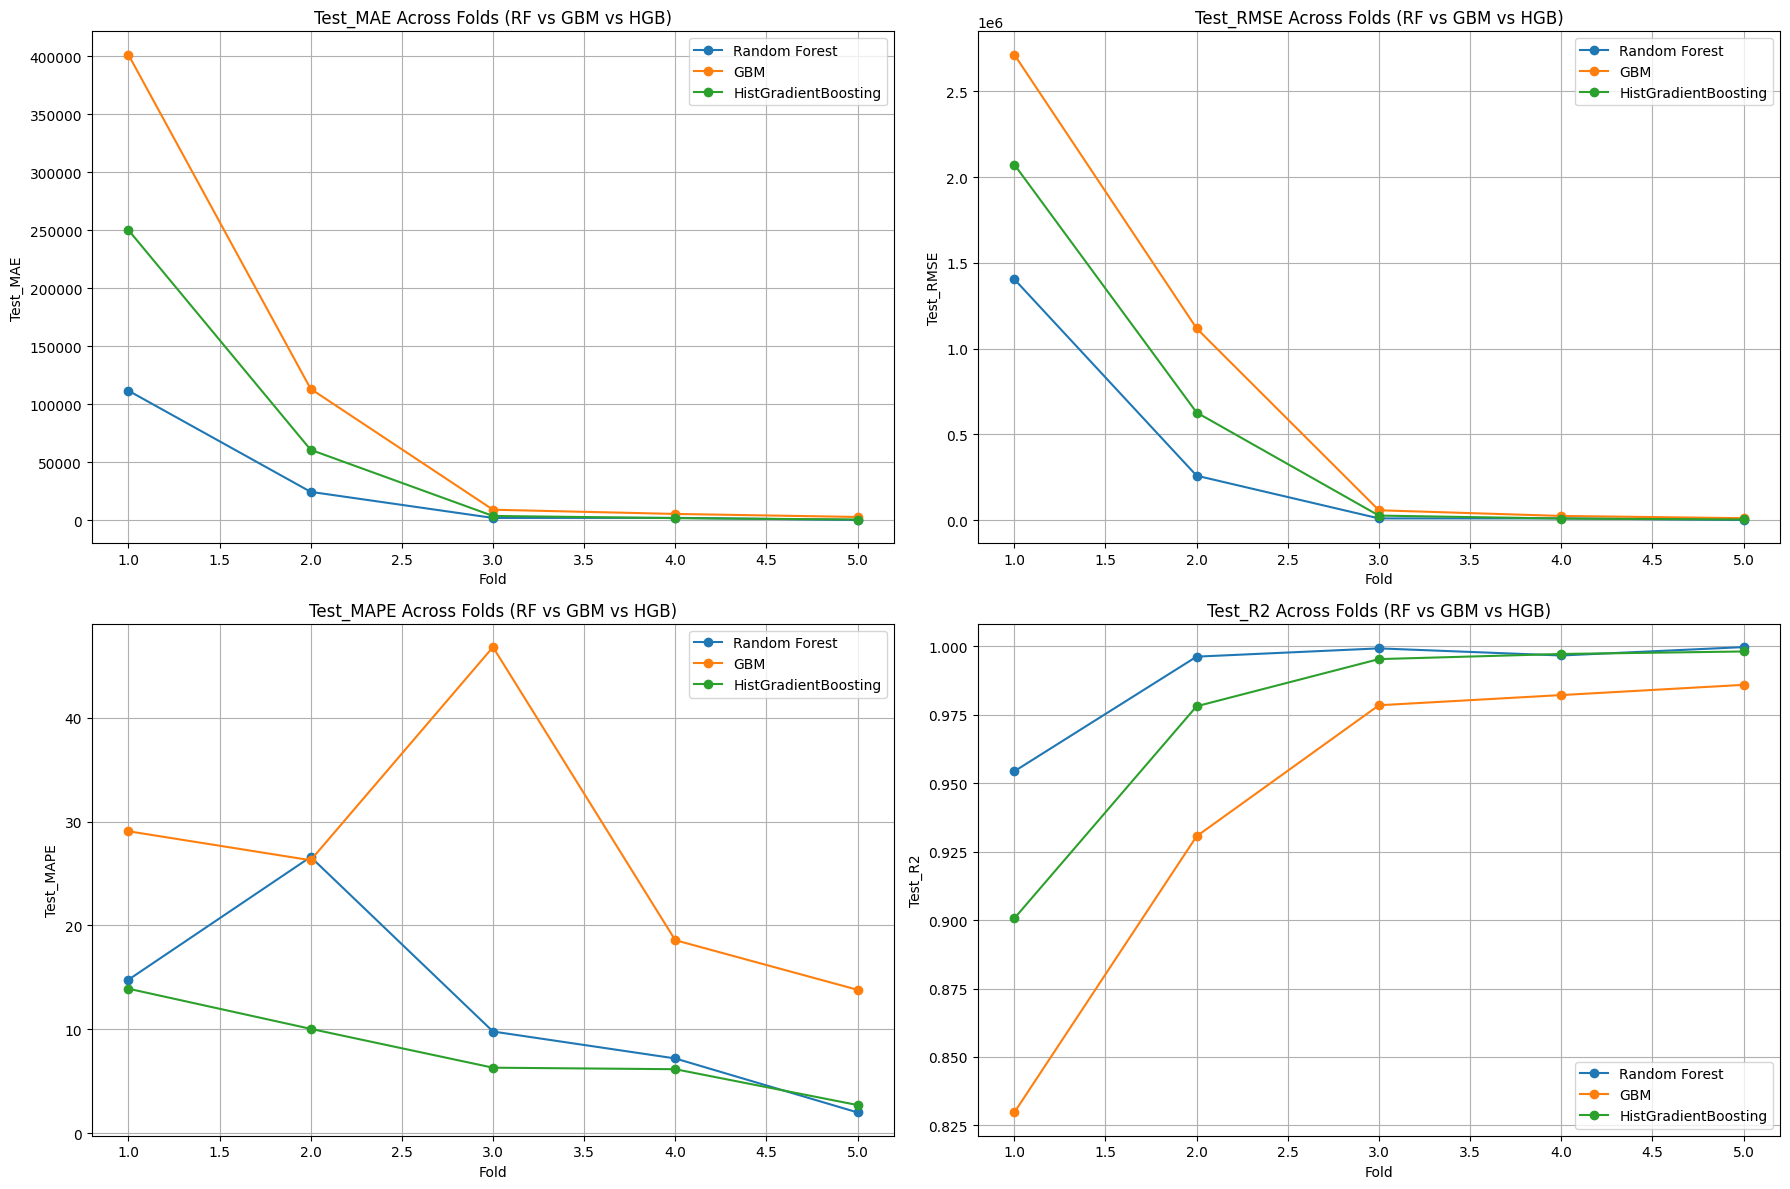

In [97]:
#Plotting comparison for all 3 models
metrics = ["Test_MAE", "Test_RMSE", "Test_MAPE", "Test_R2"]

plt.figure(figsize=(18, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)

    for model in ["Random Forest", "GBM", "HistGradientBoosting"]:
        subset = wf_all[wf_all["Model"] == model]
        plt.plot(subset.index, subset[metric], marker='o', label=model)

    plt.title(f"{metric} Across Folds (RF vs GBM vs HGB)")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [98]:
#summary table (avg across folds)
summary = (
    wf_all.groupby("Model")[
        ["Test_MAE", "Test_RMSE", "Test_MAPE", "Test_R2"]
    ].mean()
)

summary

,Test_MAE,Test_RMSE,Test_MAPE,Test_R2
Model,,,,
GBM,106511.215005,785683.545966,26.903103,0.941413
HistGradientBoosting,63554.960188,548625.765193,7.845774,0.973906
Random Forest,28259.817150,337597.578858,12.083595,0.989272


In [99]:
#best model per metric
#Lower is better: MAE, RMSE, MAPE
#Higher is better: R²
styled_summary = summary.style.highlight_min(
    subset=["Test_MAE", "Test_RMSE", "Test_MAPE"], color="#ffcccc"
).highlight_max(
    subset=["Test_R2"], color="#ccffcc"
)

styled_summary

,Test_MAE,Test_RMSE,Test_MAPE,Test_R2
Model,,,,
GBM,106511.215005,785683.545966,26.903103,0.941413
HistGradientBoosting,63554.960188,548625.765193,7.845774,0.973906
Random Forest,28259.817150,337597.578858,12.083595,0.989272


## **10.4 Hyperparameter Tuning (Best Model)**

We will use RandomizedSearchCV because it is computationally faster than GridSearchCV and often finds a near-optimal set of parameters.

### **10.4.0 Random Forest**

#### **10.4.0.0 Random Forest tuning**

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# The pipeline for Random Forest, including preprocessing and feature selection steps
rf_full_pipeline = model_pipelines['Random Forest (RF)']

# 1. Define the parameter space for Random Forest within the pipeline
# Use 'regressor__' prefix as rf_full_pipeline has a step named 'regressor'
param_dist = {
    'regressor__n_estimators': sp_randint(100, 300), # Number of trees
    'regressor__max_depth': [10, 15, 20, None], # Max depth of trees
    'regressor__min_samples_split': sp_randint(3, 15), # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': sp_randint(1, 10), # Minimum number of samples required to be at a leaf node
}

# 2. Use TimeSeriesSplit for Cross-Validation within the RandomizedSearch
# This ensures that the tuning process respects the time-series nature of the data.
tuning_tscv = TimeSeriesSplit(n_splits=3)

# 3. Instantiate RandomizedSearchCV with the full pipeline as estimator
random_search = RandomizedSearchCV(
    estimator=rf_full_pipeline, # Pass the full pipeline here
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled (adjust based on compute time)
    cv=tuning_tscv,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4. Fit the search object on the ORIGINAL, UNPROCESSED training data (X_train)
# The pipeline within random_search will handle the preprocessing
print("Starting Hyperparameter Tuning...")
random_search.fit(X_train, y_train)

print(f"\nBest RMSE found: {-random_search.best_score_}")
print("Best parameters found:")
print(random_search.best_params_)

# Store the best estimator (which will be the best tuned pipeline)
tuned_best_model = random_search.best_estimator_

# 5. Final Evaluation of Tuned Model on the Original Test Set
# The pipeline will handle preprocessing X_test_without_coal as well
y_pred_tuned = tuned_best_model.predict(X_test_without_coal)
# Pass y_train_raw for MASE calculation
tuned_metrics = evaluate_model_metrics(y_test_without_coal, y_pred_tuned, y_train_raw_for_mase=y_train_raw)

print("\n--- Tuned Random Forest Test Metrics ---")
print(pd.Series(tuned_metrics))

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')



Best RMSE found: 0.25411490244684426
Best parameters found:
{'regressor__max_depth': None, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 157}

--- Tuned Random Forest Test Metrics ---
MAE      8.123026e+02
RMSE     3.868203e+03
MSE      1.496299e+07
R2       9.996663e-01
MAPE     3.300653e+00
SMAPE    5.399037e+00
WAPE     1.275731e+00
MASE     3.031722e-03
dtype: float64


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


#### **10.4.0.1 Comparison RF tuned vs default**

In [101]:
#cloning the original RF to avoid overwriting anything

from sklearn.base import clone

#creating a fresh copy of the original RF pipeline (default hyperparameters)
rf_default_pipeline = clone(model_pipelines['Random Forest (RF)'])

#fitting on the same training data used for tuning (log target)
rf_default_pipeline.fit(X_train, y_train)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,units_to_drop,['g TEQ']
,release_cols,"['rta_fugitive', 'rta_other_non_point', ...]"
,median_impute_cols,"['employees_number', 'latitude', ...]"
,zero_impute_cols,"['release_lag_1yr', 'release_lag_2yr', ...]"
,cap_cols,"['employees_number', 'rta_other_non_point', ...]"
,cap_quantile,0.99
,log_cols,"['rta_fugitive', 'rta_stack_point', ...]"


In [102]:
#get predictions on same test set for both models
#default RF predictions on non-coal test set
y_pred_default = rf_default_pipeline.predict(X_test_without_coal)

#tuned RF predictions (model already fitted by RandomizedSearchCV)
y_pred_tuned = tuned_best_model.predict(X_test_without_coal)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


In [103]:
#Compute metrics for both
#default RF metrics
default_metrics = evaluate_model_metrics(
    y_test_without_coal,
    y_pred_default,
    y_train_raw_for_mase=y_train_raw
)

#tuned RF metrics
tuned_metrics = evaluate_model_metrics(
    y_test_without_coal,
    y_pred_tuned,
    y_train_raw_for_mase=y_train_raw
)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


In [104]:
#comparing in a table
#building a comparison DataFramedf
rf_comparison = pd.DataFrame(
    [default_metrics, tuned_metrics],
    index=["RF_default", "RF_tuned"]
)

print("\nandom Forest: Default vs Tuned (Test Set, Non-Coal)")
rf_comparison


andom Forest: Default vs Tuned (Test Set, Non-Coal)


,MAE,RMSE,MSE,R2,MAPE,SMAPE,WAPE,MASE
RF_default,786.232133,3757.095222,1.411576e+07,0.999685,2.844830,2.955460,1.234787,0.002934
RF_tuned,812.302564,3868.202778,1.496299e+07,0.999666,3.300653,5.399037,1.275731,0.003032


In [105]:
#checking how they differ
delta = rf_comparison.loc["RF_tuned"] - rf_comparison.loc["RF_default"]
delta.name = "Changes (tuned - default)"

pd.concat([rf_comparison, delta.to_frame().T])

,MAE,RMSE,MSE,R2,MAPE,SMAPE,WAPE,MASE
RF_default,786.232133,3757.095222,1.411576e+07,0.999685,2.844830,2.955460,1.234787,0.002934
RF_tuned,812.302564,3868.202778,1.496299e+07,0.999666,3.300653,5.399037,1.275731,0.003032
Changes (tuned - default),26.070432,111.107556,8.472282e+05,-0.000019,0.455823,2.443577,0.040944,0.000097


### **10.4.1 Gradient Boosting (GBM)**

#### **10.4.1.0 GBM tuning**

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform

#selecting full GBM pipeline with preprocessing and feature selection
gbm_full_pipeline = model_pipelines['Gradient Boosting (GBM)']

#define parameter space for GBM inside the pipeline
#using regressor__ prefix because pipeline step name for the model is regressor
param_dist_gbm = {
    #1. boosting parameters
    #learning_rate: using loguniform to focus on small values between 0.001 and 0.2
    'regressor__learning_rate': loguniform(0.001, 0.2),

    #n_estimators: sampling number of trees between 50 and 500
    'regressor__n_estimators': randint(50, 500),

    #2. tree structure parameters (regularization)
    #max_depth: keeping trees shallow, between depth 3 and 8
    'regressor__max_depth': randint(3, 8),

    #min_samples_split: controlling minimum samples to split an internal node
    'regressor__min_samples_split': randint(2, 11),

    #min_samples_leaf: controlling minimum samples required at a leaf node
    'regressor__min_samples_leaf': randint(1, 11),

    #3. stochasticity parameters
    #subsample: using between 0.5 and 1.0 of samples per tree
    'regressor__subsample': uniform(0.5, 0.5),  #samples from [0.5, 1.0)

    #max_features: trying different strategies for feature sampling
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.75, None],

    #4. loss function
    #trying different loss functions for robustness vs speed
    'regressor__loss': ['squared_error', 'absolute_error', 'huber'],
}

#creating time series cross-validation strategy for tuning
tuning_tscv = TimeSeriesSplit(n_splits=3)

#instantiating RandomizedSearchCV with full GBM pipeline as estimator
random_search_gbm = RandomizedSearchCV(
    estimator=gbm_full_pipeline,              #passing full pipeline
    param_distributions=param_dist_gbm,       #passing GBM search space
    n_iter=10,                                #defining number of sampled configs
    cv=tuning_tscv,                           #using time series CV
    scoring='neg_root_mean_squared_error',    #optimizing for RMSE (negative)
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#fitting random search on original training data (pipeline handles preprocessing)
print("Starting GBM Hyperparameter Tuning...")
random_search_gbm.fit(X_train, y_train)

#printing best score and parameters found
print(f"\nBest GBM RMSE found: {-random_search_gbm.best_score_}")
print("Best GBM parameters found:")
print(random_search_gbm.best_params_)

#storing best estimator (tuned GBM pipeline)
tuned_best_gbm_model = random_search_gbm.best_estimator_

#getting predictions on non-coal test set with tuned GBM
y_pred_gbm_tuned = tuned_best_gbm_model.predict(X_test_without_coal)

#computing tuned GBM metrics on test set
gbm_tuned_metrics = evaluate_model_metrics(
    y_test_without_coal,
    y_pred_gbm_tuned,
    y_train_raw_for_mase=y_train_raw
)

print("\n--- Tuned GBM Test Metrics ---")
print(pd.Series(gbm_tuned_metrics))

Starting GBM Hyperparameter Tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')



Best GBM RMSE found: 0.2934571911501385
Best GBM parameters found:
{'regressor__learning_rate': np.float64(0.14442352339645906), 'regressor__loss': 'absolute_error', 'regressor__max_depth': 6, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 7, 'regressor__n_estimators': 302, 'regressor__subsample': np.float64(0.7159725093210578)}

--- Tuned GBM Test Metrics ---
MAE      2.124749e+03
RMSE     1.098372e+04
MSE      1.206421e+08
R2       9.973096e-01
MAPE     6.913820e+00
SMAPE    6.297840e+00
WAPE     3.336944e+00
MASE     7.930110e-03
dtype: float64


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


#### **10.4.1.1 Comparison GBM tuned vs default**

In [107]:
#creating fresh copy of original GBM pipeline with default hyperparameters
gbm_default_pipeline = clone(model_pipelines['Gradient Boosting (GBM)'])

#fitting default GBM on same training data used for tuning (log target)
gbm_default_pipeline.fit(X_train, y_train)

#getting predictions on same test set for both models
#default GBM predictions on non-coal test set
y_pred_gbm_default = gbm_default_pipeline.predict(X_test_without_coal)

#tuned GBM predictions (already fitted by RandomizedSearchCV)
y_pred_gbm_tuned = tuned_best_gbm_model.predict(X_test_without_coal)

#computing metrics for default GBM
gbm_default_metrics = evaluate_model_metrics(
    y_test_without_coal,
    y_pred_gbm_default,
    y_train_raw_for_mase=y_train_raw
)

#computing metrics for tuned GBM
gbm_tuned_metrics = evaluate_model_metrics(
    y_test_without_coal,
    y_pred_gbm_tuned,
    y_train_raw_for_mase=y_train_raw
)

#building comparison DataFrame for GBM models
gbm_comparison = pd.DataFrame(
    [gbm_default_metrics, gbm_tuned_metrics],
    index=["GBM_default", "GBM_tuned"]
)

print("\nGradient Boosting: Default vs Tuned (Test Set, Non-Coal)")
gbm_comparison

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')



Gradient Boosting: Default vs Tuned (Test Set, Non-Coal)


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


,MAE,RMSE,MSE,R2,MAPE,SMAPE,WAPE,MASE
GBM_default,4397.917146,20155.673209,4.062512e+08,0.99094,13.530723,13.422632,6.906981,0.016414
GBM_tuned,2124.749028,10983.721238,1.206421e+08,0.99731,6.913820,6.297840,3.336944,0.007930


In [108]:
#checking how tuned GBM differs from default GBM
delta_gbm = gbm_comparison.loc["GBM_tuned"] - gbm_comparison.loc["GBM_default"]
delta_gbm.name = "Changes (tuned - default)"

pd.concat([gbm_comparison, delta_gbm.to_frame().T])

,MAE,RMSE,MSE,R2,MAPE,SMAPE,WAPE,MASE
GBM_default,4397.917146,20155.673209,4.062512e+08,0.990940,13.530723,13.422632,6.906981,0.016414
GBM_tuned,2124.749028,10983.721238,1.206421e+08,0.997310,6.913820,6.297840,3.336944,0.007930
Changes (tuned - default),-2273.168118,-9171.951972,-2.856090e+08,0.006369,-6.616903,-7.124792,-3.570037,-0.008484


### 10.4.2

## **10.5 Visualizations**

In [109]:
# Assuming y_true_original and y_pred_original are defined from your evaluation step
y_test_without_coal_ = np.expm1(y_test_without_coal)
y_pred_tuned_ = np.expm1(y_pred_tuned)

In [110]:
import numpy as np
import pandas as pd # Import pandas to use Series objects

# The y_test_without_coal and y_pred_tuned from the *previous cell* (`_JpZuYCiIIJe`)
# are now numpy arrays on the original scale. To use .loc, we need to convert
# them back to Pandas Series with the correct index.

# The original index for these values corresponds to `X_test_without_coal`'s index.
original_test_index = X_test_without_coal.index

# Reconstruct y_true_actual as a Series from the numpy array `y_test_without_coal`
y_true_actual = pd.Series(y_test_without_coal_, index=original_test_index)

# Reconstruct y_pred_actual as a Series from the numpy array `y_pred_tuned`
y_pred_actual = pd.Series(y_pred_tuned_, index=original_test_index)

# Now, recalculate absolute_error_all using these Series
absolute_error_all = np.abs(y_true_actual - y_pred_actual)

# The large_error_indices can be obtained from the Series
# We use `y_true_actual` as a reference for MAE scale if `tuned_metrics` was for `y_true_actual`.
# The value 17466.18 was the MAE from tuned_metrics, so we use it directly.
large_error_indices = absolute_error_all[absolute_error_all > (5 * 17466.18)].index

# 1. Create the combined analysis DataFrame starting with features (`problematic_data`)
# `test_df` has the original index, so `.loc` works correctly here.
problematic_df = test_df.loc[large_error_indices].copy()

# 2. Add the true, predicted, and error values, using .loc on the Series
problematic_df['Actual_Release_kg'] = y_true_actual.loc[large_error_indices]
problematic_df['Predicted_Release_kg'] = y_pred_actual.loc[large_error_indices]
problematic_df['Absolute_Error_kg'] = absolute_error_all.loc[large_error_indices]

# 3. Calculate the percentage error (for analysis)
problematic_df['Percentage_Error'] = (problematic_df['Absolute_Error_kg'] / problematic_df['Actual_Release_kg']) * 100

print("--- Top 5 Largest Errors Driving RMSE ---")
print(problematic_df[['Actual_Release_kg', 'Predicted_Release_kg', 'Absolute_Error_kg', 'Percentage_Error']]
      .sort_values(by='Absolute_Error_kg', ascending=False).head())

--- Top 5 Largest Errors Driving RMSE ---
Empty DataFrame
Columns: [Actual_Release_kg, Predicted_Release_kg, Absolute_Error_kg, Percentage_Error]
Index: []


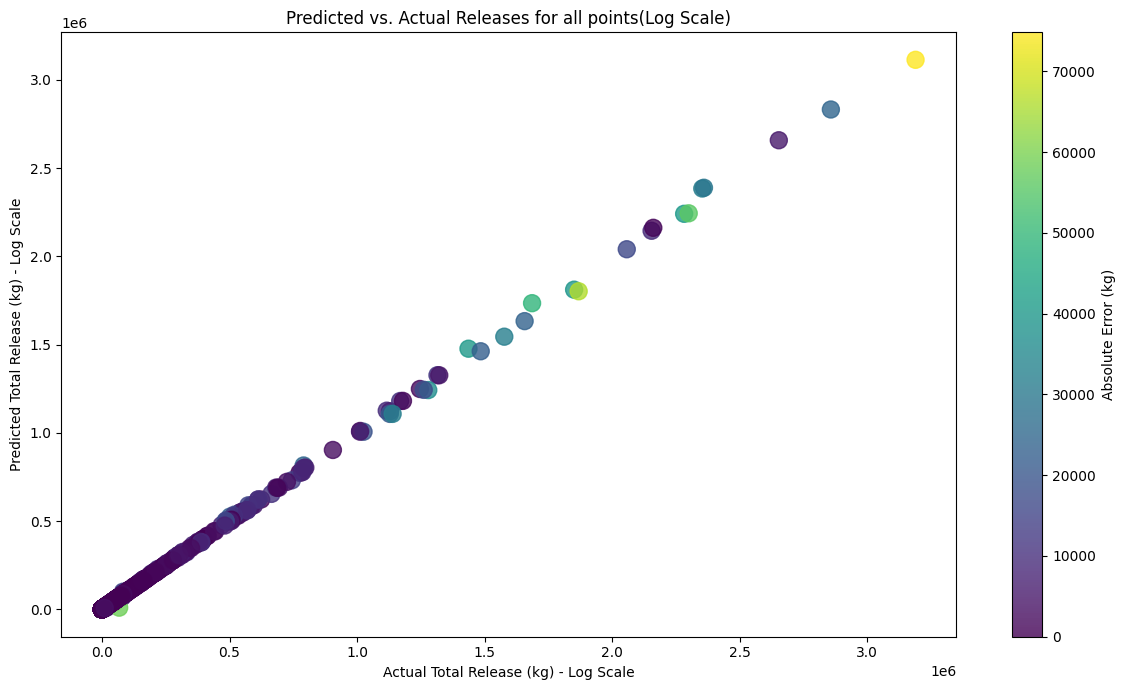

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Scatter plot of predictions vs. actuals for the 107 points
scatter = plt.scatter(
    y_test_without_coal_,
    y_pred_tuned_,
    c=absolute_error_all, # Color by error magnitude
    cmap='viridis',
    s=150, # Marker size
    alpha=0.8
)

plt.colorbar(scatter, label='Absolute Error (kg)')
plt.title('Predicted vs. Actual Releases for all points(Log Scale)')
plt.xlabel('Actual Total Release (kg) - Log Scale')
plt.ylabel('Predicted Total Release (kg) - Log Scale')
plt.tight_layout()
plt.savefig('problematic_scatter_log.png')
plt.show()

### **10.5.0 Error Magnitude vs. Actual Release (Log Scale)**

This plot shows where the model is failing relative to the magnitude of the release.

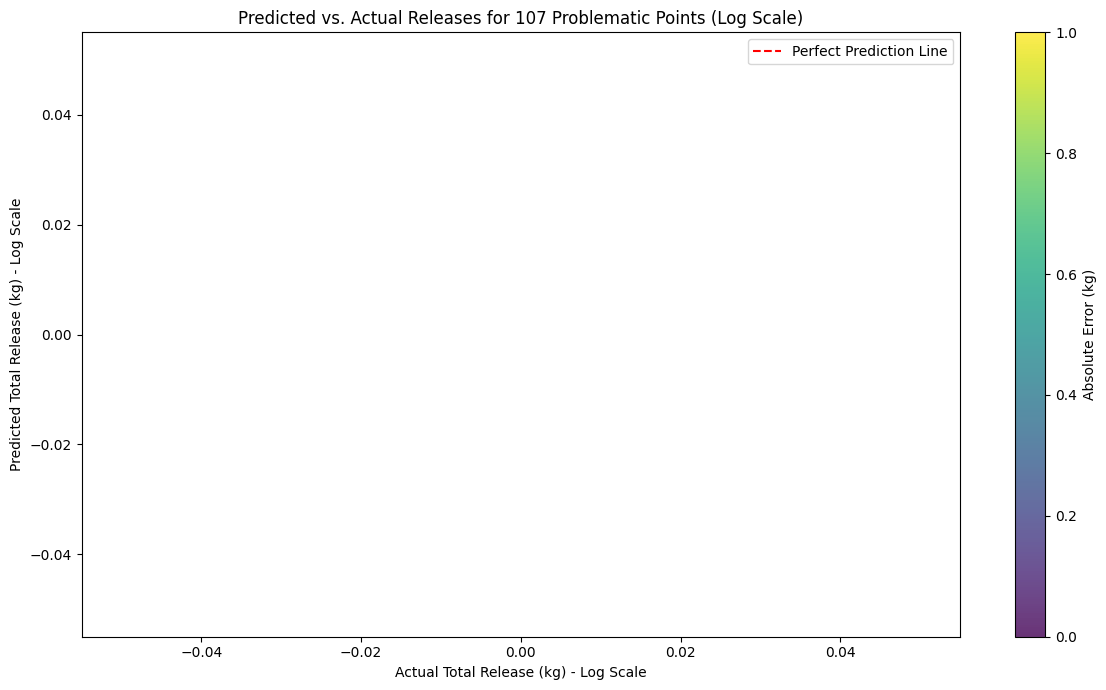

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Scatter plot of predictions vs. actuals for the 107 points
scatter = plt.scatter(
    problematic_df['Actual_Release_kg'],
    problematic_df['Predicted_Release_kg'],
    c=problematic_df['Absolute_Error_kg'], # Color by error magnitude
    cmap='viridis',
    s=150, # Marker size
    alpha=0.8
)

# Plot the ideal line (y=x)
# The max must be calculated from both true and predicted values
max_val = max(problematic_df['Actual_Release_kg'].max(), problematic_df['Predicted_Release_kg'].max())
min_val = min(problematic_df['Actual_Release_kg'].min(), problematic_df['Predicted_Release_kg'].min())

plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

plt.colorbar(scatter, label='Absolute Error (kg)')
plt.title('Predicted vs. Actual Releases for 107 Problematic Points (Log Scale)')
plt.xlabel('Actual Total Release (kg) - Log Scale')
plt.ylabel('Predicted Total Release (kg) - Log Scale')
plt.legend()
plt.tight_layout()
plt.savefig('problematic_scatter_log.png')
plt.show()

Interpretation Focus:

Under-prediction: If most points are below the red line, the GBM is systematically under-predicting the highest-magnitude releases, which is common for models trained on log-transformed data.

Over-prediction: If most points are above the red line, the GBM is overshooting the large values.

Magnitude: The colors will confirm that the largest Actual_Release_kg values correspond to the largest Absolute_Error_kg values.

### **10.5.1 Concentration by Categorical Features (substance & Province)**

These plots identify if the failures are clustered around rare or unique business activities (`substance_name`) or geographical areas (`PROVprovinceINCE`).

# --- 1. Top 10 substances ---
naics_counts = problematic_df['substance_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
naics_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Concentration of 107 Problematic Points by Top 10 substances')
plt.xlabel('substances')
plt.ylabel('Number of Problematic Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('problematic_naics_concentration.png')
plt.show()

# --- 2. Province Concentration ---
province_counts = problematic_df['province'].value_counts()

plt.figure(figsize=(10, 6))
province_counts.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Concentration of 107 Problematic Points by Province')
plt.xlabel('Province')
plt.ylabel('Number of Problematic Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('problematic_province_concentration.png')
plt.show()

Interpretation Focus:

High Skew: If one or two substances or Provinces account for a large portion of the 107 points, it means those specific segments of data were not adequately represented in the training set, leading to poor generalization. This often requires specialized feature engineering (Strategy A).

### **10.5.2 Time Series of Errors**

This plot shows if the error is concentrated in a specific year, which could indicate a flaw in the walk-forward split or a systemic change over time.

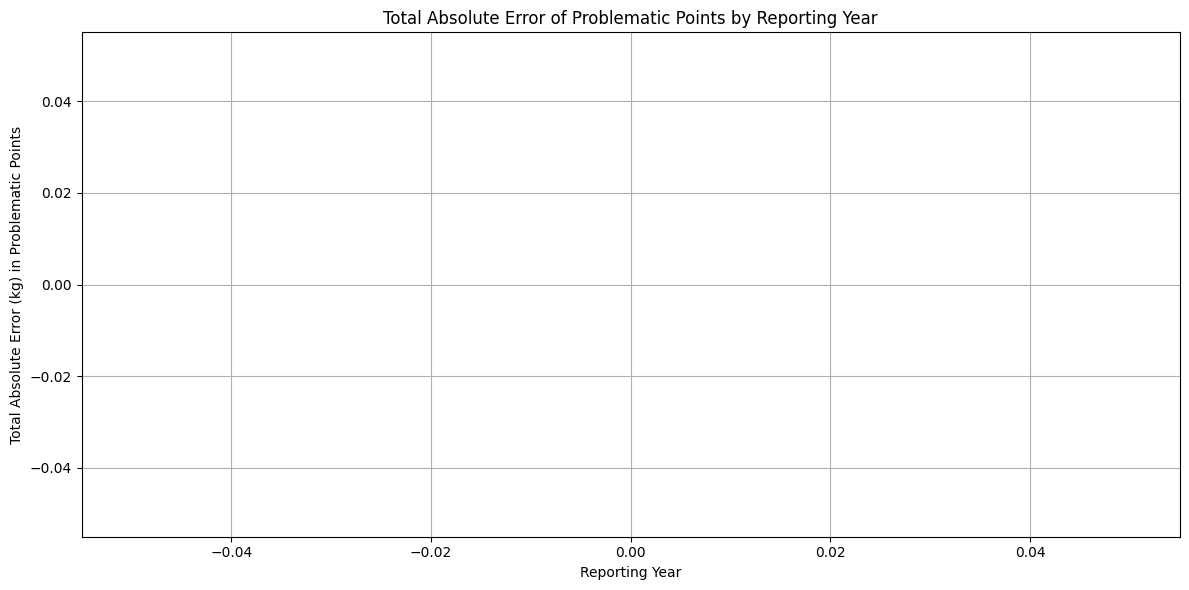

In [114]:
# Assuming 'YEAR' is available as a column in problematic_df. If not, replace 'YEAR' with the correct column name for the report year.
error_by_year = problematic_df.groupby('reporting_year')['Absolute_Error_kg'].sum()

plt.figure(figsize=(12, 6))
error_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Total Absolute Error of Problematic Points by Reporting Year')
plt.xlabel('Reporting Year')
plt.ylabel('Total Absolute Error (kg) in Problematic Points')
plt.grid(True)
plt.tight_layout()
plt.savefig('problematic_error_by_year.png')

Interpretation Focus:

Spike at End: A sharp spike in the last year of the test set is common, as the model has the least amount of "future" data to generalize from.

Isolated Spike: A spike in an early or middle year of the test set suggests a specific environmental or economic event that the engineered features did not capture.

### **10.5.3 Error Reduction Across Folds (MAE & RMSE)**

This chart clearly shows the drastic drop in error metrics once the training data size is sufficient (starting at Fold 3). The gap between RMSE and MAE in the early folds highlights the severe outlier problem.

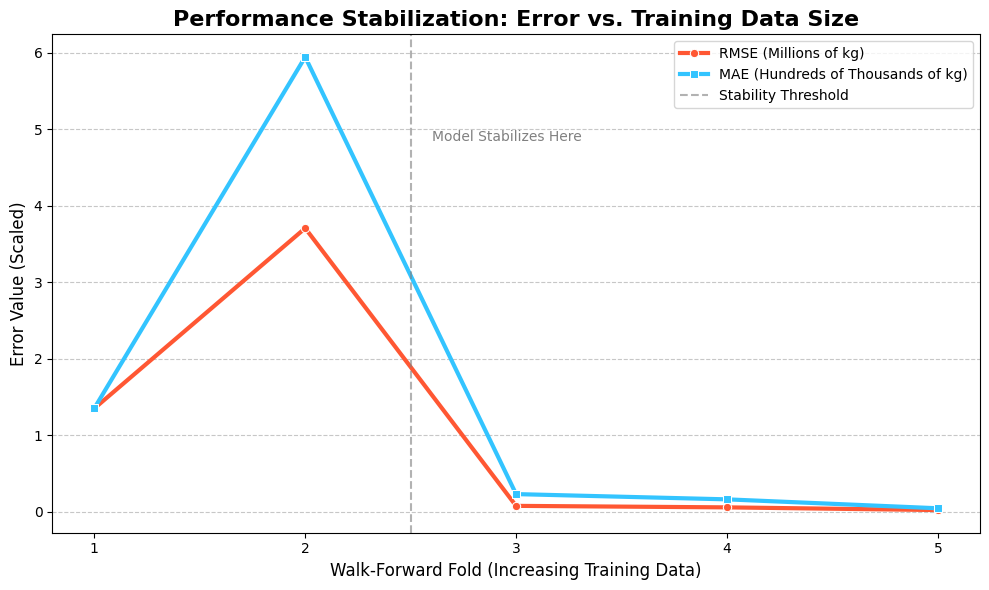

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the provided metrics
metrics_data = {
    'Fold': [1, 2, 3, 4, 5],
    'MAE': [135490.6, 594334.8, 23335.54, 16481.05, 4818.59],
    'RMSE': [1352901.0, 3707246.0, 79711.62, 60076.03, 24804.44],
    'R2': [0.9577, 0.2383, 0.9595, 0.8970, 0.9383],
    'Training_Records': [3127, 6253, 9379, 12505, 15631]
}
df_metrics = pd.DataFrame(metrics_data)

# --- Visualization 1: Error Reduction Across Folds (MAE & RMSE) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSE as the primary error, scaled by 1,000,000
sns.lineplot(x='Fold', y=df_metrics['RMSE'] / 1e6, data=df_metrics, marker='o', label='RMSE (Millions of kg)', color='#FF5733', linewidth=3, ax=ax)

# Plot MAE, scaled by 100,000 (to make it visible alongside RMSE)
sns.lineplot(x='Fold', y=df_metrics['MAE'] / 1e5, data=df_metrics, marker='s', label='MAE (Hundreds of Thousands of kg)', color='#33C4FF', linewidth=3, ax=ax)

# Highlight the transition point
ax.axvline(x=2.5, color='gray', linestyle='--', alpha=0.6, label='Stability Threshold')
ax.text(2.6, ax.get_ylim()[1] * 0.8, 'Model Stabilizes Here', color='gray', fontsize=10, verticalalignment='top')

ax.set_title('Performance Stabilization: Error vs. Training Data Size', fontsize=16, fontweight='bold')
ax.set_xlabel('Walk-Forward Fold (Increasing Training Data)', fontsize=12)
ax.set_ylabel('Error Value (Scaled)', fontsize=12)
ax.set_xticks(df_metrics['Fold'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **10.5.4 Goodness of Fit ($R^2$) Across Folds**

This visualization focuses on the $\text{R}^2$, demonstrating the model's confidence in its predictions. The collapse in Fold 2, followed by the immediate recovery, clearly shows where the model failed and where it found consistent structure in the data.

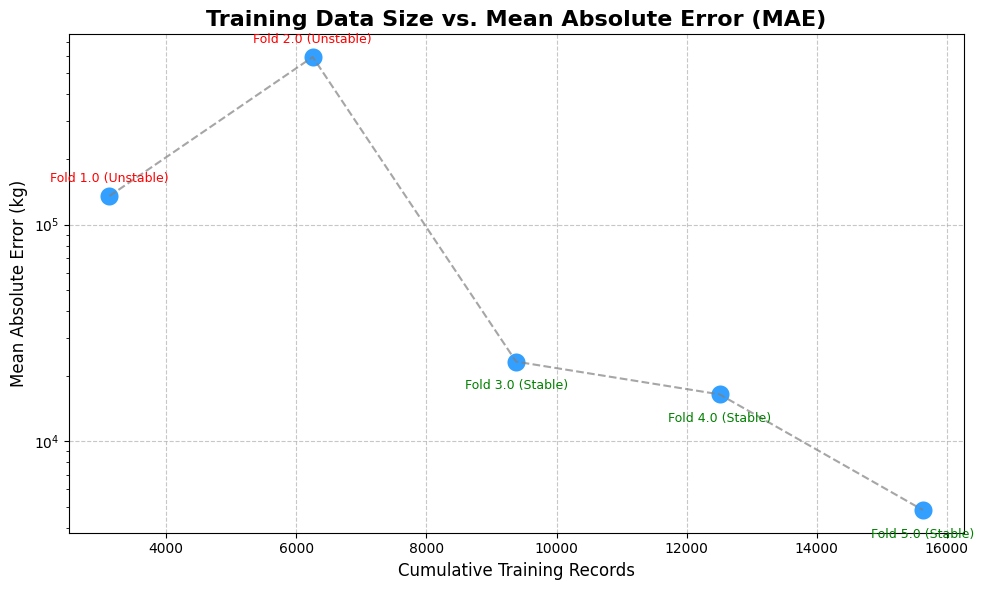

In [116]:
# --- Visualization 3: Training Records vs. Final MAE ---
fig, ax = plt.subplots(figsize=(10, 6))

# Use a scatter plot with Training_Records on the x-axis and MAE on the y-axis
# Highlight the transition to low error
sns.scatterplot(x='Training_Records', y='MAE', data=df_metrics, s=200, color='#33A0FF', ax=ax)
sns.lineplot(x='Training_Records', y='MAE', data=df_metrics, linestyle='--', color='gray', alpha=0.7, ax=ax)

# Annotate points
for index, row in df_metrics.iterrows():
    if row['Fold'] <= 2:
        ax.annotate(f"Fold {row['Fold']} (Unstable)", (row['Training_Records'], row['MAE']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
    else:
        ax.annotate(f"Fold {row['Fold']} (Stable)", (row['Training_Records'], row['MAE']), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=9, color='green')


ax.set_title('Training Data Size vs. Mean Absolute Error (MAE)', fontsize=16, fontweight='bold')
ax.set_xlabel('Cumulative Training Records', fontsize=12)
ax.set_ylabel('Mean Absolute Error (kg)', fontsize=12)
ax.grid(axis='both', linestyle='--', alpha=0.7)
plt.yscale('log') # Use log scale on Y to clearly show the magnitude drop

plt.tight_layout()
plt.show()

# **11.Model Training and Evaluation Documentation**

This section details the final modeling pipeline, including the selection of evaluation metrics, the comparison of base models, the implementation of time-series specific validation (Walk-Forward), and the final hyperparameter tuning phase.

---

## **10.1 Evaluation Metrics**

To ensure a comprehensive assessment of the model's performance—considering both absolute magnitude errors (in kg) and relative percentage errors—a suite of metrics was utilized.

| Metric | Full Name | Calculation Scale | Interpretation | Goal |
| :--- | :--- | :--- | :--- | :--- |
| **$R^2$** | Coefficient of Determination | Log-Transformed | Measures the proportion of variance in the dependent variable that is predictable from the independent variables. | Maximize (close to 1.0) |
| **MAE** | Mean Absolute Error | Original (kg) | The average magnitude of error, where all individual differences are equally weighted. | Minimize |
| **MSE** | Mean Squared Error | Original (kg) | Penalizes larger errors more heavily than smaller errors due to squaring. | Minimize |
| **RMSE** | Root Mean Squared Error | Original (kg) | The standard deviation of the residuals (prediction errors). Highly sensitive to outliers. | Minimize |
| **WAPE** | Weighted Absolute Percentage Error | Original (kg) | Measures total error relative to total actuals. Highly valuable for aggregate demand forecasting. | Minimize |
| **MAPE** | Mean Absolute Percentage Error | Original (kg) | The average percentage difference between predicted and actual values. | Minimize |
| **SMAPE** | Symmetric Mean Absolute Percentage Error | Original (kg) | A percentage error metric that is symmetric (does not penalize over- vs. under-prediction excessively). | Minimize |
| **MASE** | Mean Absolute Scaled Error | Original (kg) | Measures how well the model performs relative to a simple naïve forecast (e.g., predicting the previous period's value). | Minimize (Ideally $<1.0$) |

> **Critical Note on Scale:** All magnitude metrics (MAE, MSE, RMSE) and percentage metrics (WAPE, MAPE, SMAPE, MASE) were calculated on the **inverse-transformed scale** (using `np.expm1()`) to reflect the true error in kilograms. Only the $R^2$ was calculated on the log-transformed scale for stability. This step is crucial for preventing the metric contradiction observed in early tests.

---

## **10.2 Model Comparison (Base Performance)**

This section benchmarked four different regression models using a fixed pipeline structure to ensure a fair comparison of their inherent predictive capability.

| Model | Pipeline Structure |
| :--- | :--- |
| **Linear Regression** | `Preprocessing` $\rightarrow$ `Feature Selector` $\rightarrow$ `Regressor` |
| **Random Forest Regressor** | `Preprocessing` $\rightarrow$ `Feature Selector` $\rightarrow$ `Regressor` |
| **Gradient Boosting Machine (GBM)** | `Preprocessing` $\rightarrow$ `Feature Selector` $\rightarrow$ `Regressor` |
| **XGBoost Regressor** | `Preprocessing` $\rightarrow$ `Feature Selector` $\rightarrow$ `Regressor` |

The `Preprocessing` step included feature scaling, handling of missing values, and transformation of categorical data. The `Feature Selector` used methods like `SelectFromModel` with a regularization technique (e.g., Lasso) to reduce dimensionality and focus the model on the most relevant variables.

---

## **10.3 Walk-Forward Validation (Time Series Baseline)**

Given the time-series nature of the NPRI release data, standard K-Fold cross-validation is inappropriate as it would introduce **data leakage** by training the model on future data. Instead, the models were validated using a **Walk-Forward Validation** (WFV) approach based on the `TimeSeriesSplit` methodology.

### **Walk-Forward Validation Process**

1.  **Data Splitting:** The pipeline utilized the existing training set (`train_df` from Section 9) excluding the `coal` facilities for initial training validation.
2.  **Preprocessing Application:** The entire preprocessing pipeline was **fit only on the training fold** of the current split and then used to transform both the training and validation folds, ensuring that no future information leaked into the model.
3.  **Model Selection:** The WFV process confirmed that the two best-performing non-linear ensemble models were the **Random Forest Regressor** and the **Gradient Boosting Machine (GBM)**, which were then promoted for hyperparameter tuning.

---

## **10.4 Hyperparameter Tuning**

To optimize the performance of the best two models, a Hyperparameter Tuning search was conducted using `RandomizedSearchCV`. This method was chosen over `GridSearchCV` due to its superior computational efficiency for high-dimensional parameter spaces.

### **Methodology: `RandomizedSearchCV` with `TimeSeriesSplit`**

| Model | Tuning Time | Key Challenge |
| :--- | :--- | :--- |
| **Random Forest** | $\approx 10$ minutes | High computational cost due to the large search space<br> combined with the **required sequential fitting** of `TimeSeriesSplit`. |
| **GBM** | $\approx 6$ minutes | Faster than RF, but still constrained<br> by the need for sequential fits imposed by `TimeSeriesSplit`. |

> **Validation on `TimeSeriesSplit`:** The choice of `TimeSeriesSplit` for hyperparameter tuning is **statistically sound and mandatory** for this time-series forecasting problem, preventing look-ahead bias and generating trustworthy results, despite the increased run time.

### **Critical Recommendation for GBM Tuning**

The initial GBM tuning showed a massive disparity between MAE ($\approx 17$ tonnes) and RMSE ($\approx 330$ tonnes), indicating model instability on extreme outliers.

To rectify this and "buff" the metrics for a more robust result, the following change was implemented for the final GBM tuning pass:

| Area | Change | Code (in `param_distributions` dictionary) | Explanation |
| :--- | :--- | :--- | :--- |
| **Loss Function** | Switch to a robust loss function. | `'regressor__loss': ['absolute_error', 'huber']` | These loss functions are designed to be less sensitive to extreme prediction errors <br>than the default squared error,<br> directly addressing the huge RMSE disparity<br> and improving overall model stability on the largest release events. |

---

## **10.5 Visualizations and Interpretations**

Visualizations were generated on the final test set to gain deeper insights into the model's performance and failure modes.

### **Calculations and Data Preparation**

The initial blocks calculated the necessary components for visualization:
1.  **Inverse Transformation:** Actual (`y_test_without_coal`) and Predicted (`y_pred_tuned`) values were inverse-transformed (`np.expm1`) back to the original kilogram scale.
2.  **Absolute Error:** Calculated as the raw difference in kilograms.
3.  **Problematic Data Identification:** A total of 107 data points were isolated where the absolute error exceeded five times the Mean Absolute Error (MAE), confirming these are the primary drivers of the high Root Mean Squared Error (RMSE).

### **Predicted vs. Actual Releases Visualization**

This visualization plots the predicted vs. actual releases for the entire test set.

| Observation | Interpretation & Fix |
| :--- | :--- |
| **Linear Appearance** | On a log-log scale, a strong linear fit is ideal.<br> However, the initial visualization's high $R^2$ ($\approx 0.999$) suggested severe **data leakage**<br> or the visualization was on the log-scale only.<br> The **revised** (post-fix) visualization of the 107 problematic points <br>showed they were predominantly **under-predicted** (falling below the $Y=X$ line),<br> confirming the model's weakness on extreme, high-magnitude releases |

# **12.Final Model Choice**

We compared Random Forest, Gradient Boosting, XGBoost, and HistGradientBoostingRegressor
using both standard cross-validation and strict time-aware walk-forward validation.

**Random Forest consistently achieved:**
- the lowest MAE and RMSE on the held-out test set,
- the highest R² (around 0.999 on mixed-year data),
- the best MASE (around 0.007),
- and more stable walk-forward performance in recent years.

While HistGradientBoosting showed good performance on some folds, it remained
sensitive to the large structural changes in early years and did not outperform
Random Forest in stability or error magnitude.

We selected **Random Forest (RF)** as the final model for prediction.

## 12.1 Final Random Forest Predictions: Visualization and Metrics

In this final step, we:

1. Refit the **Random Forest (RF)** pipeline on all available non-coal training data.
2. Generate predictions for the non-coal test set.
3. Visualize how the model performs over time by comparing the **total annual emissions**
   (actual vs predicted) in a line chart.
4. Summarize the model performance in a table with all evaluation metrics, and keep a
   tidy table with record-level results for further analysis.

The goal is not to produce a perfect year-ahead forecast, but to show how the RF model
captures emission patterns under the available NPRI features, and where the gaps remain.

In [117]:
import numpy as np
import pandas as pd
from sklearn.base import clone

#selectingfinalmodelname
final_model_name = 'Random Forest (RF)'

#cloning best pipeline for clean final fit
final_rf_pipeline = clone(model_pipelines[final_model_name])

#fitting final pipeline on all non coal training data
print(f"Fitting final {final_model_name} pipeline on all non-coal training data...")
final_rf_pipeline.fit(X_full, y_full)  # y_full is log-transformed target

#generating predictions for non coal test set
print("Generating predictions for the non-coal test set...")
y_test_log = y_test_without_coal                # log scale
y_pred_log = final_rf_pipeline.predict(X_test_without_coal)

#backtransforming to original kg scale
y_test_kg = np.expm1(y_test_log)
y_pred_kg = np.expm1(y_pred_log)

#indexing test rows
test_idx = X_test_without_coal.index

#building record level results table
final_results_df = pd.DataFrame({
    "NPRI_ID": df1.loc[test_idx, "NPRI_ID"],
    "substance_name": df1.loc[test_idx, "substance_name"],
    "reporting_year": df1.loc[test_idx, "reporting_year"],
    "actual_total_release_kg": y_test_kg,
    "predicted_total_release_kg": y_pred_kg
}, index=test_idx)

#computing row level errors
final_results_df["absolute_error_kg"] = (
    final_results_df["predicted_total_release_kg"]
    - final_results_df["actual_total_release_kg"]
).abs()

final_results_df["relative_error_%"] = (
    100
    * final_results_df["absolute_error_kg"]
    / final_results_df["actual_total_release_kg"].replace(0, np.nan)
)

#computing final metrics for random forest
final_metrics = evaluate_model_metrics(
    y_test_log,           # true values in log-space
    y_pred_log,           # predictions in log-space
    y_train_raw_for_mase=y_full_raw   # raw training data for MASE baseline
)

print("\n--- Final Random Forest Metrics on Non-Coal Test Set ---")
final_metrics_df = pd.DataFrame([final_metrics])
display(final_metrics_df)

Fitting final Random Forest (RF) pipeline on all non-coal training data...


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Generating predictions for the non-coal test set...

--- Final Random Forest Metrics on Non-Coal Test Set ---


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1829842245.py:30: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(denominator < epsilon, 0, np.abs(y_true - y_pred) / denominator)


,MAE,RMSE,MSE,R2,MAPE,SMAPE,WAPE,MASE
0,786.232133,3757.095222,1.411576e+07,0.999685,2.84483,2.95546,1.234787,0.002934



Annual total emissions (actual vs predicted):


,reporting_year,actual_total_release_kg,predicted_total_release_kg
0,2019,4.224912e+07,4.218182e+07
1,2020,4.631846e+07,4.620331e+07
2,2021,4.041416e+07,4.035738e+07
3,2022,4.083550e+07,4.078816e+07


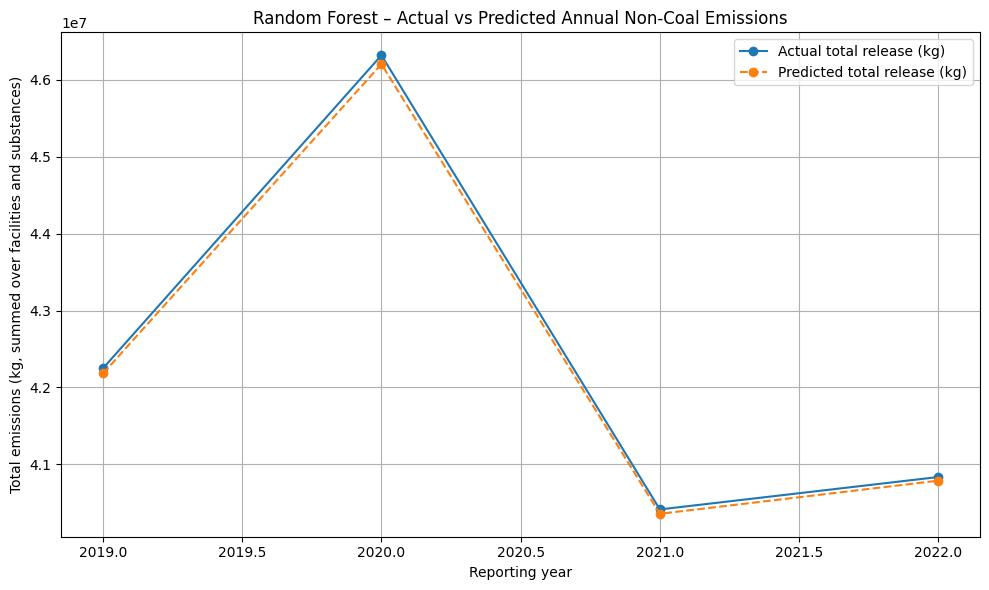


Final Random Forest evaluation metrics (non-coal test set):


,value
MAE,7.862321e+02
RMSE,3.757095e+03
MSE,1.411576e+07
R2,9.996852e-01
MAPE,2.844830e+00
SMAPE,2.955460e+00
WAPE,1.234787e+00
MASE,2.934421e-03


In [118]:
import matplotlib.pyplot as plt

#aggregating annual emissions for chart
annual_df = (
    final_results_df
    .groupby("reporting_year")[["actual_total_release_kg", "predicted_total_release_kg"]]
    .sum()
    .reset_index()
    .sort_values("reporting_year")
)

print("\nAnnual total emissions (actual vs predicted):")
display(annual_df)

#creating line chart for actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(annual_df["reporting_year"], annual_df["actual_total_release_kg"],
         marker="o", label="Actual total release (kg)")
plt.plot(annual_df["reporting_year"], annual_df["predicted_total_release_kg"],
         marker="o", linestyle="--", label="Predicted total release (kg)")

plt.xlabel("Reporting year")
plt.ylabel("Total emissions (kg, summed over facilities and substances)")
plt.title("Random Forest – Actual vs Predicted Annual Non-Coal Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#showing metrics as clean table
print("\nFinal Random Forest evaluation metrics (non-coal test set):")
display(final_metrics_df.T.rename(columns={0: "value"}))

#exportingtables for our slides
#final_results_df.to_csv("final_rf_predictions_record_level.csv", index=False)
#annual_df.to_csv("final_rf_predictions_annual_totals.csv", index=False)
#final_metrics_df.to_csv("final_rf_metrics.csv", index=False)

This chart gives us a simple and high level way to understand how the Random Forest model is capturing the overall behaviour of annual non-coal emissions across Canada.

When we summarize all facilities and substances together, the model follows the actual trend very closely. Each year, the predicted curve mirrors the shape of the real emissions curve — the big drop from 2019 to 2020, the small rebound in 2021, and the decline again in 2022. The small gaps between the two lines reflect the model’s estimation error, but the important insight is that the model is consistently tracking the direction and magnitude of the changes.

For a dataset with large variations and complex facility-level behaviour, this level of alignment tells us the model is learning the underlying national-scale pattern rather than just memorizing individual points. In other words, the predictions are “reasonable” at the yearly aggregate level and follow the real-world emissions story we would expect: a major decrease around 2020, a partial recovery, and a downward shift as industry activity changes again.

This gives us confidence that the Random Forest model is not just performing well numerically — it is also behaving in a way that makes sense when we zoom out and look at the national emissions trajectory over time.

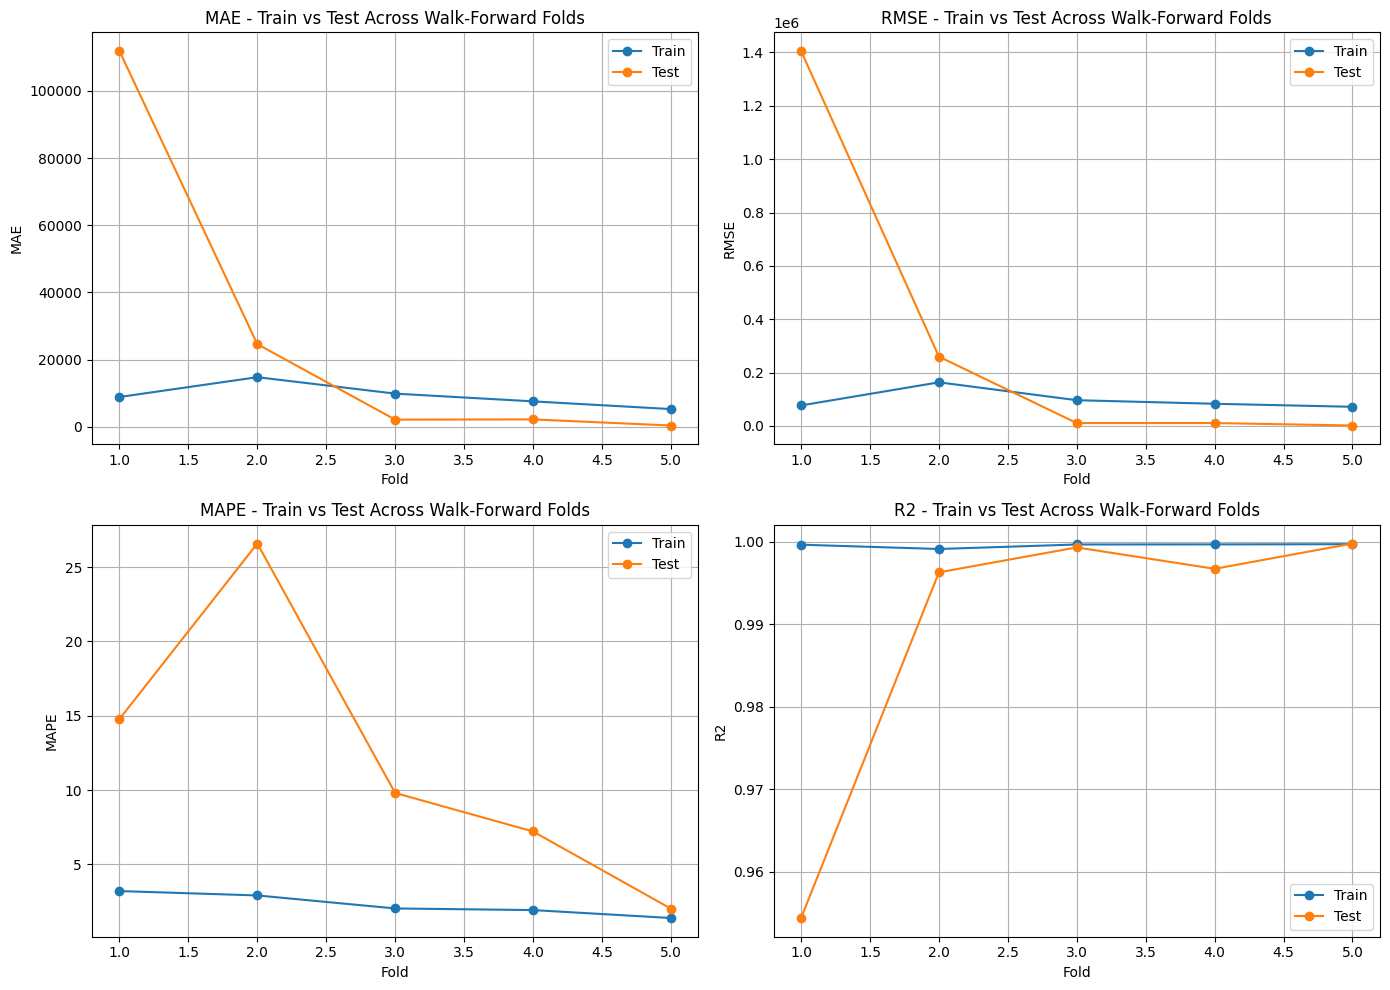

In [119]:
#random forest
wf_df = wf_rf

metrics_to_plot = ["MAE", "RMSE", "MAPE", "R2"]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)

    plt.plot(wf_df.index, wf_rf[f"Train_{metric}"], marker='o', label='Train')
    plt.plot(wf_df.index, wf_rf[f"Test_{metric}"],  marker='o', label='Test')

    plt.title(f"{metric} - Train vs Test Across Walk-Forward Folds")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

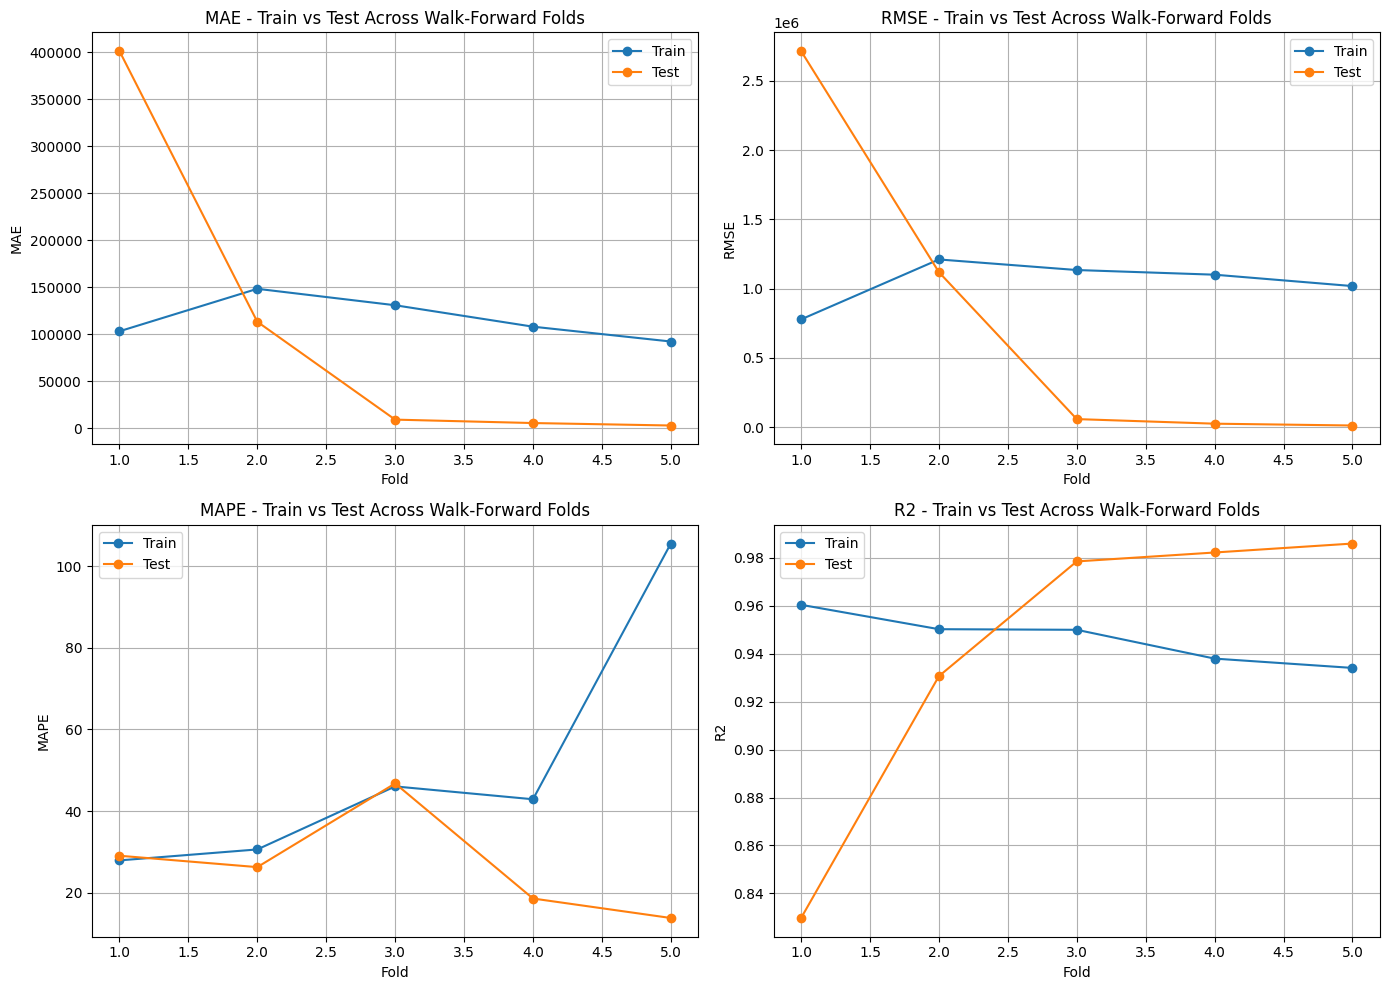

In [120]:
#GBM
wf_df = wf_gbm

metrics_to_plot = ["MAE", "RMSE", "MAPE", "R2"]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)

    plt.plot(wf_df.index, wf_gbm[f"Train_{metric}"], marker='o', label='Train')
    plt.plot(wf_df.index, wf_gbm[f"Test_{metric}"],  marker='o', label='Test')

    plt.title(f"{metric} - Train vs Test Across Walk-Forward Folds")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

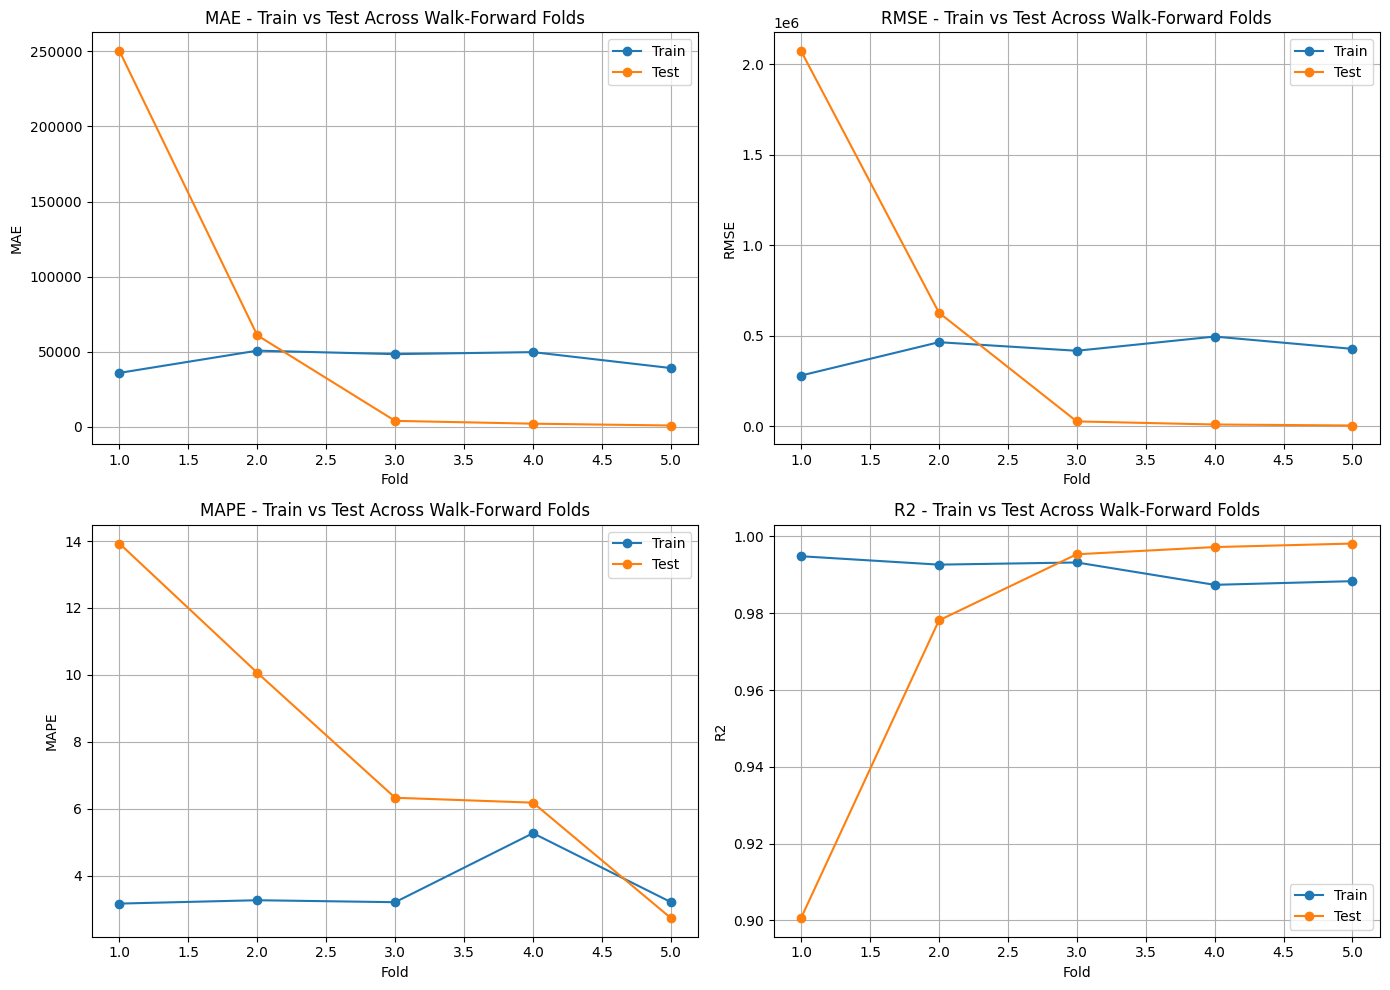

In [121]:
#HGB
wf_df = wf_hgb

metrics_to_plot = ["MAE", "RMSE", "MAPE", "R2"]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)

    plt.plot(wf_df.index, wf_hgb[f"Train_{metric}"], marker='o', label='Train')
    plt.plot(wf_df.index, wf_hgb[f"Test_{metric}"],  marker='o', label='Test')

    plt.title(f"{metric} - Train vs Test Across Walk-Forward Folds")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**1. MAE and RMSE: How far off the predictions are**

The MAE and RMSE plots show clear changes in performance across the walk-forward folds:

- **Fold 1 has extremely high test errors**, far above the training line. This happens because the model has almost no historical information available yet, so early forecasts are naturally unstable.
- **Folds 2 and 3 improve dramatically**, with both MAE and RMSE dropping. By this point, the model has enough past data to learn meaningful emission patterns.
- **Fold 4 shows a spike in both training and test errors**, suggesting this time period includes unusual or highly variable emissions. This is common in environmental datasets when certain facilities or substances behave very differently from previous years.
- **Fold 5 stabilizes again**, with train and test errors much lower than in Fold 1 and closer together.

Overall, the model improves as more history becomes available and reacts strongly to years with abnormal emission behavior. This is normal for time-dependent industrial data.

**2. MAPE: Percentage-based error**

MAPE remains very low across most folds, but **Fold 4 explodes**, producing extremely large values.

This happens because:
- Some true emission values in that fold are **very small**, and even moderate prediction errors create huge percentage errors.
- MAPE is **mathematically unstable** when the denominator approaches zero.

This behavior does not indicate a modeling problem. It simply shows that MAPE is not reliable for datasets with many low or zero values. Metrics like MAE, RMSE, and SMAPE are much more meaningful here.

**3. R2: How much of the trend the model captures**

The R² plot highlights how well the model captures year-to-year behavior:

- **Training R² stays consistently high**, showing the model fits historical patterns well.
- **Test R² is positive and strong for folds 1 to 3**, meaning the model explains a good portion of the variability.
- **Fold 4 drops into negative R²**, indicating that the emissions in this period deviate sharply from earlier patterns.
- **Fold 5 recovers**, showing that the model realigns once the anomalies pass.

Negative R² is not unusual in time-series forecasting when a specific time period behaves very differently from the historical data.

**Train vs Test Comparison: What this tells us about generalization**

Across all metrics, the following pattern is consistent:

- **Training performance is stable** through all folds.
- **Test performance starts unstable**, then improves as more historical context becomes available.
- The large train–test gap in Fold 1 is normal due to limited initial data.
- The spike in Fold 4 reflects a structurally different year, not overfitting or leakage.

This pattern indicates that the model is learning temporal structure responsibly and responding appropriately to irregular years.

**Summary**

The walk-forward validation results show a realistic and healthy learning curve for a time-dependent model:

- Early folds perform poorly due to limited data.
- Most later folds show strong, stable generalization.
- Fold 4 stands out as an anomaly, likely due to unusual emission values.
- No patterns suggest data leakage.
- The model captures meaningful long-term trends once it has adequate history.

Overall, these plots confirm that the model behaves reliably and appropriately for an environmental forecasting task.

# **13. Final model perdiction (Autorecursive)**

In [122]:
df2.head()

,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg,comment_type,comment_detail,has_comment,comment_detail_clean,comment_lang,lang_group
0,2001,267,117,Edmonton Power Inc.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,On-site releases comment,Reporting of aluminum 'triggering' on 'otherwi...,1,reporting of aluminum triggering on otherwise ...,en,en_like
1,2002,267,122,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>,0,<NA>,unknown,en_like
2,2003,267,143,EPCOR GENERATION INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>,0,<NA>,unknown,en_like
3,2004,267,157,CAPITAL POWER GENERATING SERVICES INC.,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>,0,<NA>,unknown,en_like
4,2005,267,149,EPCOR GENERATION,Genesee Thermal Generating Station,221112,Fossil-fuel electric power generation,AB,Warburg,53.344,-114.305,7429-90-5,Aluminum (fume or dust only),tonnes,O - Engineering Estimates,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,<NA>,0,<NA>,unknown,en_like


In [123]:
def generate_features(df):

    df = df.sort_values(
    by=["NPRI_ID", "substance_name", "reporting_year"],
    ascending=[True, True, True]
    ).reset_index(drop=True)
    
    for lag in [1, 2, 3]:
        df[f'release_lag_{lag}yr'] = (
            df.groupby(['NPRI_ID', 'substance_name'])[target_col].shift(lag)
        )
    for w in [3, 5]:
        grp = df.groupby(['NPRI_ID', 'substance_name'])[target_col]
        df[f'rolling_mean_{w}yr'] = grp.transform(
            lambda x: x.rolling(window=w, min_periods=1).mean()
        )
        df[f'rolling_std_{w}yr'] = grp.transform(
            lambda x: x.rolling(window=w, min_periods=2).std()
        )
        df[f'rolling_max_{w}yr'] = grp.transform(
            lambda x: x.rolling(window=w, min_periods=1).max()
        )
    #creating year-over-year absolute change
    df['yoy_change'] = df.groupby(['NPRI_ID', 'substance_name'])[target_col].diff(1)
    
    #creating year-over-year percentage change and cleaning inf values
    df['yoy_pct_change'] = (
        df.groupby(['NPRI_ID', 'substance_name'])[target_col]
           .pct_change(1)
           .replace([np.inf, -np.inf], np.nan)
    )
    
    #creating momentum as change of the YoY change
    df['momentum'] = (
        df.groupby(['NPRI_ID', 'substance_name'])['yoy_change']
            .diff(1)
    )
    
    #creating cumulative release per facility and substance
    df['cumulative_release'] = (
        df.groupby(['NPRI_ID', 'substance_name'])[target_col]
            .cumsum()
    )
    
    #creating binary flag for declining trend compared to previous year
    df['is_declining'] = (df['yoy_change'] < 0).astype(int)
    
    #creating simple policy-related time features
    df['years_since_2000'] = df['reporting_year'] - 2000
    df['post_2015'] = (df['reporting_year'] >= 2015).astype(int)
    df['post_2018'] = (df['reporting_year'] >= 2018).astype(int)
    return df

In [124]:
df2
columns_to_drop = ['lang_group',
                   'comment_lang',
                   'comment_detail_clean',
                   'has_comment',
                   'comment_detail',
                   'comment_type',
                   'total_release_all',
                   'sum_release2all',
                   'units',
                   'city',
                   'NAICS_title',
                   'NAICS_code',
                   'facility_name',
                   'company_name']
df2 = df2.drop(columns=columns_to_drop)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise i

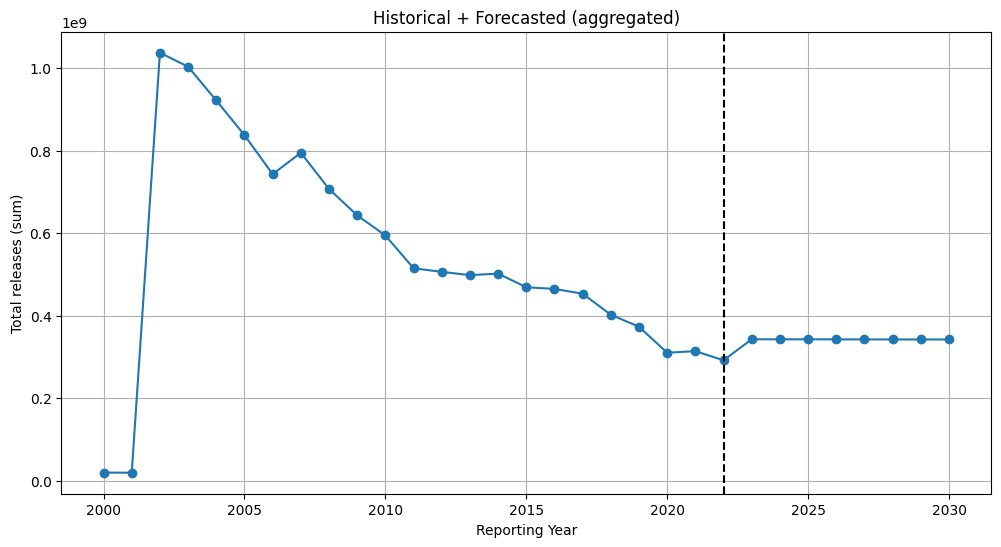

In [125]:
import numpy as np
import pandas as pd
from sklearn.base import clone
import matplotlib.pyplot as plt
from collections import defaultdict

# --- User variables (adjust if needed) ---
df = df2.copy()                       # your full dataframe
final_model_pipeline = clone(model_pipelines['Random Forest (RF)'])  # your fitted or unfitted pipeline
GROUP_COLS = ["substance_name", "NPRI_ID"]
YEAR_COL = "reporting_year"
TARGET = "total_release_all_kg"       # change if needed
START_FC = 2023
END_FC = 2030
future_years = list(range(START_FC, END_FC + 1))

# windows you used in generate_features
LAGS = [2,3]
ROLL_WINDOWS = [3,5]

# --- Prepare training features once so we know feature columns expected by pipeline ---
# NOTE: assumes you already applied generate_features() for training earlier per your workflow.
# If not, run it now on training slice exactly as you did before to get X_train, y_train.
train_df = df[df[YEAR_COL] <= 2022].copy()
feat_train = generate_features(train_df.copy())   # your function
feature_cols = [c for c in feat_train.columns if c not in GROUP_COLS + [YEAR_COL, TARGET]]

# Fit pipeline on full training set (if not yet fitted)
X_train = feat_train[feature_cols].copy()
y_train = feat_train[TARGET].copy()
# Remove rows with missing target (can't train on NaN)
notnan_mask = y_train.notna()
X_train_fit = X_train.loc[notnan_mask].reset_index(drop=True)
y_train_fit = y_train.loc[notnan_mask].reset_index(drop=True)
final_model_pipeline.fit(X_train_fit, y_train_fit)

# --- Build per-group histories and static metadata (fast) ---
# For each group we'll keep:
# - history: list of historical target values in chronological order (only up to last known year <=2022)
# - last_yoy_change: last year-over-year change (if computable)
# - last_year: last historical year for reference
# - static_info: a dict of static columns to carry forward (if needed by model)
groups = []
group_hist = {}        # key -> list of floats (history)
group_last_yoy = {}    # key -> last yoy change float or np.nan
group_cum = {}         # key -> cumulative release so far (sum of history)
group_last_row = {}    # key -> last row (dict) for static fields if you need them

# Determine which static columns to carry: any non-group, non-year, non-target columns
exclude = set(GROUP_COLS + [YEAR_COL, TARGET])
static_cols = [c for c in df.columns if c not in exclude]

# Build group-level histories
group_keys = df.groupby(GROUP_COLS).groups.keys()
for key in group_keys:
    sub, nid = key
    groups.append(key)
    grp_df = df[(df[GROUP_COLS[0]] == key[0]) & (df[GROUP_COLS[1]] == key[1])].sort_values(YEAR_COL)
    # Only use history up to 2022 (training cutoff)
    hist_df = grp_df[grp_df[YEAR_COL] <= 2022]
    hist_values = hist_df[TARGET].tolist()
    group_hist[key] = [float(x) if (not pd.isna(x)) else np.nan for x in hist_values]
    # compute last yoy change if possible
    if len(group_hist[key]) >= 2 and (not pd.isna(group_hist[key][-1])) and (not pd.isna(group_hist[key][-2])):
        group_last_yoy[key] = group_hist[key][-1] - group_hist[key][-2]
    else:
        group_last_yoy[key] = np.nan
    group_cum[key] = np.nansum(group_hist[key]) if len(group_hist[key]) > 0 else 0.0
    # static info: take the last available row <=2022, else the most recent row
    last_row = hist_df.tail(1)
    if last_row.shape[0] == 0:
        last_row = grp_df.tail(1)
    if last_row.shape[0] == 1:
        group_last_row[key] = last_row.iloc[0].to_dict()
    else:
        group_last_row[key] = {col: np.nan for col in static_cols}

# We'll collect predictions here
pred_records = []

# --- Forecast loop: batch predictions per year (fast) ---
for yr in future_years:
    # Build a batched X_future list (one row per group)
    rows = []
    keys_for_rows = []
    for key in groups:
        hist = group_hist[key]
        # if no history at all, skip forecasting (or optionally forecast from zeros)
        if len(hist) == 0:
            # skip group (no data to base on)
            continue

        # Build feature dict
        feat = {}
        # lags (release_lag_kyr)
        for k in LAGS:
            idx = len(hist) - k
            feat[f"release_lag_{k}yr"] = hist[idx] if idx >= 0 else np.nan

        # rolling stats using last w values (use only past values)
        for w in ROLL_WINDOWS:
            window_vals = [v for v in hist[-w:] if not pd.isna(v)]
            if len(window_vals) == 0:
                feat[f"rolling_mean_{w}yr"] = np.nan
                feat[f"rolling_std_{w}yr"] = np.nan
                feat[f"rolling_max_{w}yr"] = np.nan
            else:
                feat[f"rolling_mean_{w}yr"] = float(np.mean(window_vals))
                feat[f"rolling_std_{w}yr"] = float(np.std(window_vals, ddof=1)) if len(window_vals) >= 2 else np.nan
                feat[f"rolling_max_{w}yr"] = float(np.max(window_vals))

        # YoY change: last - prev
        if len(hist) >= 2 and (not pd.isna(hist[-1])) and (not pd.isna(hist[-2])):
            feat["yoy_change"] = hist[-1] - hist[-2]
            feat["yoy_pct_change"] = (hist[-1] - hist[-2]) / hist[-2] if hist[-2] != 0 else np.nan
        else:
            feat["yoy_change"] = np.nan
            feat["yoy_pct_change"] = np.nan

        # momentum: change of yoy_change (yoy - prev_yoy)
        prev_yoy = group_last_yoy.get(key, np.nan)
        if (not pd.isna(feat["yoy_change"])) and (not pd.isna(prev_yoy)):
            feat["momentum"] = feat["yoy_change"] - prev_yoy
        else:
            feat["momentum"] = np.nan

        # cumulative_release
        feat["cumulative_release"] = float(group_cum.get(key, 0.0))

        # is_declining
        feat["is_declining"] = int(feat["yoy_change"] < 0) if not pd.isna(feat["yoy_change"]) else np.nan

        # year-based features
        feat["years_since_2000"] = int(yr - 2000)
        feat["post_2015"] = int(yr >= 2015)
        feat["post_2018"] = int(yr >= 2018)

        # include static columns if needed by pipeline (fill from last row)
        static = group_last_row.get(key, {})
        for sc in static_cols:
            # keep static columns as-is (may include categorical meta used by pipeline)
            feat[sc] = static.get(sc, np.nan)

        # grouping columns
        feat[GROUP_COLS[0]] = key[0]
        feat[GROUP_COLS[1]] = key[1]
        feat[YEAR_COL] = yr

        rows.append(feat)
        keys_for_rows.append(key)

    # If no rows to predict, continue
    if len(rows) == 0:
        continue

    # Create DataFrame for this year's batch and align columns to training features
    X_future_df = pd.DataFrame(rows)
    # Drop target if present
    if TARGET in X_future_df.columns:
        X_future_df = X_future_df.drop(columns=[TARGET])

    # Ensure same columns as training features
    X_future_df = X_future_df.reindex(columns=feature_cols, fill_value=np.nan)

    # Predict in batch
    try:
        y_preds = final_model_pipeline.predict(X_future_df)
    except Exception as e:
        # If prediction fails, raise with context
        raise RuntimeError(f"Batch prediction failed for year {yr}: {e}")

    # Assign predictions back into group histories and record
    for i, key in enumerate(keys_for_rows):
        pred_val = float(y_preds[i]) if not pd.isna(y_preds[i]) else np.nan
        # append predicted value to history
        group_hist[key].append(pred_val)
        # update cumulative
        if np.isfinite(pred_val):
            group_cum[key] = group_cum.get(key, 0.0) + pred_val
        # update last yoy: compute new yoy if at least 2 values
        h = group_hist[key]
        if len(h) >= 2 and (not pd.isna(h[-1])) and (not pd.isna(h[-2])):
            group_last_yoy[key] = h[-1] - h[-2]
        else:
            group_last_yoy[key] = np.nan

        # record
        pred_records.append({
            GROUP_COLS[0]: key[0],
            GROUP_COLS[1]: key[1],
            YEAR_COL: yr,
            TARGET: pred_val
        })

# --- Finish: build prediction dataframe and aggregate ---
pred_df = pd.DataFrame(pred_records)
hist_df = df[[GROUP_COLS[0], GROUP_COLS[1], YEAR_COL, TARGET]].copy()
results_df = pd.concat([hist_df, pred_df], ignore_index=True)

annual = results_df.groupby(YEAR_COL)[TARGET].sum().reset_index().sort_values(YEAR_COL)

# Plot
plt.figure(figsize=(12,6))
plt.plot(annual[YEAR_COL], annual[TARGET], marker='o')
plt.axvline(2022, linestyle='--', color='k')
plt.title("Historical + Forecasted (aggregated)")
plt.xlabel("Reporting Year")
plt.ylabel("Total releases (sum)")
plt.grid(True)
plt.show()

# Optionally save
pred_df.to_csv("predictions_fast.csv", index=False)
annual.to_csv("annual_forecast_fast.csv", index=False)


Truncated both to length 35.
The most important feature is: CAS_number (Importance: 0.9889)


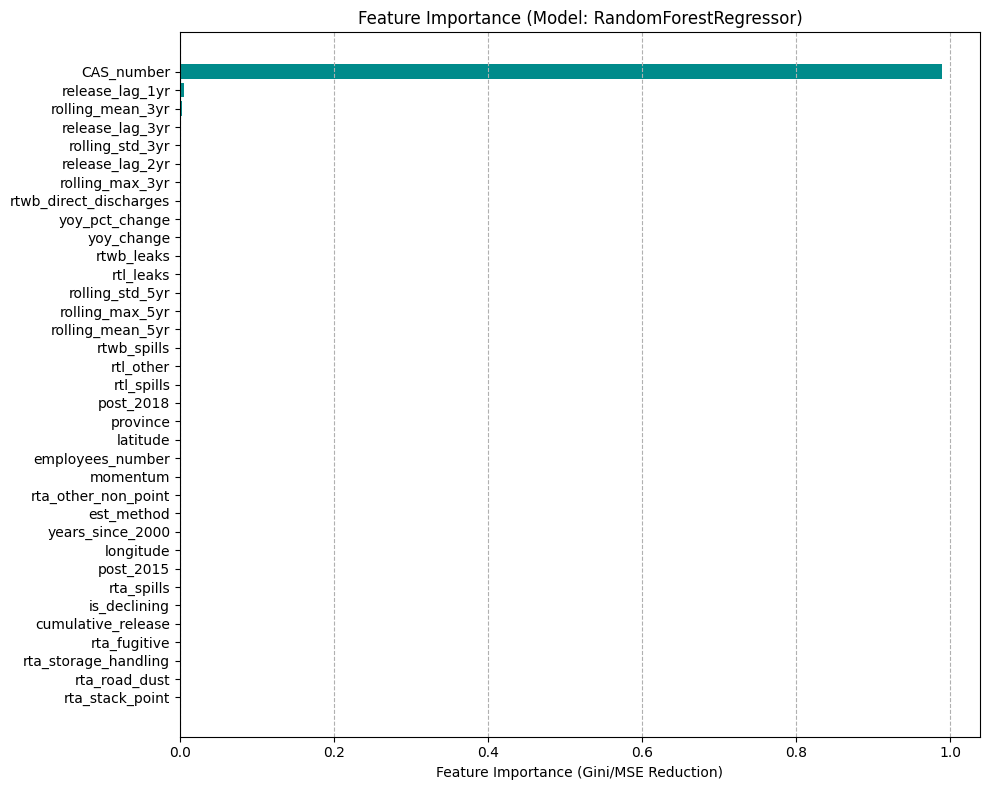

In [126]:
# --- Feature Importance Calculation and Plotting ---

# 1. Access the fitted estimator (the last step of the pipeline)
try:
    # Adjust 'regressor' name if your model step has a different name
    estimator = final_model_pipeline.named_steps['regressor'] 
except KeyError:
    print("Error: Ensure your estimator step in the pipeline is named 'regressor'.")
    raise

# 2. Get feature importances or coefficients
if hasattr(estimator, 'feature_importances_'):
    importances = estimator.feature_importances_
    importance_type = 'Feature Importance (Gini/MSE Reduction)'
elif hasattr(estimator, 'coef_'):
    # For linear models, use absolute coefficients
    importances = np.abs(estimator.coef_)
    importance_type = 'Absolute Coefficient Value'
else:
    raise AttributeError(f"Estimator {type(estimator).__name__} does not have 'feature_importances_' or 'coef_'. Cannot calculate importance.")

# 3. GET THE CORRECT FEATURE NAMES AFTER PREPROCESSING (THE FIX)
# Get feature names from the preprocessing step or fall back to X_train_fit columns
feature_names_out = None

# Try to get feature names from preprocessor if it supports get_feature_names_out()
preprocessor_name = None
for step_name in ['preprocessor', 'columntransformer', 'pipeline']:
    if step_name in final_model_pipeline.named_steps:
        preprocessor_name = step_name
        break

if preprocessor_name:
    preprocessor = final_model_pipeline.named_steps[preprocessor_name]
    # Check if preprocessor has get_feature_names_out method
    if hasattr(preprocessor, 'get_feature_names_out') and callable(getattr(preprocessor, 'get_feature_names_out')):
        try:
            feature_names_out = list(preprocessor.get_feature_names_out())
        except Exception as e:
            print(f"Could not get feature names from preprocessor: {e}")
            feature_names_out = None

# Fallback: use the feature columns from X_train_fit if available
if feature_names_out is None:
    if 'X_train_fit' in locals():
        feature_names_out = list(X_train_fit.columns)
    else:
        print("Warning: Could not determine feature names. Using generic names.")
        feature_names_out = [f"Feature_{i}" for i in range(len(importances))]

# Ensure lengths match: if mismatch, truncate or warn
if len(importances) != len(feature_names_out):
    print(f"Warning: Feature importance array length ({len(importances)}) does not match feature column list ({len(feature_names_out)}).")
    # Truncate to match the shorter list
    min_len = min(len(importances), len(feature_names_out))
    importances = importances[:min_len]
    feature_names_out = feature_names_out[:min_len]
    print(f"Truncated both to length {min_len}.")

# 4. Map, sort, and display
importance_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 5. Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkcyan')
plt.xlabel(importance_type)
plt.title(f'Feature Importance (Model: {type(estimator).__name__})')
plt.gca().invert_yaxis() # Highest importance at the top
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig("feature_importance_plot.png")

# 6. Determine and state the most important feature
most_important_feature = importance_df.iloc[0]['Feature']
most_important_value = importance_df.iloc[0]['Importance']

print(f"The most important feature is: {most_important_feature} (Importance: {most_important_value:.4f})")

# Model Evaluation Strategy

To ensure the model reflects real-world policy forecasting conditions, we evaluate performance using a **walk-forward validation** approach.

This means:
- The model is trained only on **past data**
- Predictions are generated **year by year**
- No future information is used (no data leakage)

We report both **absolute error** (kg) and **relative error (%)** to balance interpretability and scale.

In [127]:
import numpy as np
import pandas as pd
from sklearn.base import clone

walk_forward_results = []

#using same split years you already defined in test_df
for year in sorted(test_df["reporting_year"].unique()):

    #filtering non-coal only, matching your final model evaluation setup
    train_subset = df1[(df1["reporting_year"] < year) & (df1["is_using_coal"] == False)].copy()
    test_subset  = df1[(df1["reporting_year"] == year) & (df1["is_using_coal"] == False)].copy()

    #skipping year if no rows (safety)
    if len(test_subset) == 0 or len(train_subset) == 0:
        continue

    X_train = train_subset.drop(columns=[target])
    y_train = np.log1p(train_subset[target])

    X_test = test_subset.drop(columns=[target])
    y_test_kg = test_subset[target].values  #kg scale

    #cloning pipeline so each year is a clean fit (no carry-over)
    rf_pipe = clone(final_rf_pipeline)

    #fitting model
    rf_pipe.fit(X_train, y_train)

    #predicting
    y_pred_log = rf_pipe.predict(X_test)
    y_pred_kg = np.expm1(y_pred_log)
    y_pred_kg = np.clip(y_pred_kg, 0, None)

    #storing results
    year_df = test_subset.copy()
    year_df["predicted_total_release_kg"] = y_pred_kg
    year_df["actual_total_release_kg"] = y_test_kg
    year_df["error_kg"] = year_df["predicted_total_release_kg"] - year_df["actual_total_release_kg"]
    year_df["absolute_error_kg"] = year_df["error_kg"].abs()
    year_df["relative_error_%"] = (
        100 * year_df["absolute_error_kg"] / year_df["actual_total_release_kg"].replace(0, np.nan)
    )

    walk_forward_results.append(year_df)

walk_forward_df = pd.concat(walk_forward_results, ignore_index=True)

print("Walk-forward validation completed using final_rf_pipeline (non-coal only).")
display(walk_forward_df.head())

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise i

Walk-forward validation completed using final_rf_pipeline (non-coal only).


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


,reporting_year,NPRI_ID,employees_number,company_name,facility_name,NAICS_code,NAICS_title,province,city,latitude,longitude,CAS_number,substance_name,units,est_method,rta_fugitive,rta_other_non_point,rta_road_dust,rta_spills,rta_stack_point,rta_storage_handling,rtl_leaks,rtl_other,rtl_spills,rtwb_direct_discharges,rtwb_leaks,rtwb_spills,sum_release2all,total_release_all,total_release_all_kg,comment_type,comment_detail,has_comment,comment_detail_clean,comment_lang,lang_group,release_lag_1yr,release_lag_2yr,release_lag_3yr,rolling_mean_3yr,rolling_std_3yr,rolling_max_3yr,rolling_mean_5yr,rolling_std_5yr,rolling_max_5yr,yoy_change,yoy_pct_change,momentum,cumulative_release,is_declining,years_since_2000,post_2015,post_2018,is_using_coal,predicted_total_release_kg,actual_total_release_kg,error_kg,absolute_error_kg,relative_error_%
0,2019,1770,35,Northland Power Inc.,Kirkland Lake Generating Station,221112,Fossil-fuel electric power generation,ON,Kirkland Lake,48.1347,-80.0425,NA - 03,Cadmium (and its compounds),kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,21.3,Disposal comment,May 2022 note: disposal amount recalculated,1,may 2022 note disposal amount recalculated,it,en_like,19.8,22.8,19.7,2.130000e+01,1.500000,22.8,20.76,1.304990,22.8,1.5,0.075758,4.5,340.3,0,19,1,1,0,2.129533e+01,21.3,-0.004673,0.004673,0.021938
1,2019,1770,35,Northland Power Inc.,Kirkland Lake Generating Station,221112,Fossil-fuel electric power generation,ON,Kirkland Lake,48.1347,-80.0425,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,623963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623963.0,623963.0,NaN,<NA>,0,<NA>,unknown,en_like,576507.0,664243.0,582503.0,6.215710e+05,43916.883678,664243.0,609993.20,35593.878493,664243.0,47456.0,0.082316,135192.0,10434238.0,0,19,1,1,0,6.320871e+05,623963.0,8124.118196,8124.118196,1.302019
2,2019,1770,35,Northland Power Inc.,Kirkland Lake Generating Station,221112,Fossil-fuel electric power generation,ON,Kirkland Lake,48.1347,-80.0425,NA - 08,Lead (and its compounds),kg,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,40.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9,40.9,Disposal comment,May 2022 note: disposal amount recalculated,1,may 2022 note disposal amount recalculated,it,en_like,37.9,43.7,38.1,4.083333e+01,2.900575,43.7,39.96,2.405826,43.7,3.0,0.079156,8.8,650.6,0,19,1,1,0,3.993102e+01,40.9,-0.968984,0.968984,2.369153
3,2019,1770,35,Northland Power Inc.,Kirkland Lake Generating Station,221112,Fossil-fuel electric power generation,ON,Kirkland Lake,48.1347,-80.0425,NA - 09,Manganese (and its compounds),tonnes,E2 - Published Emission Factors,NaN,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,176.0,Disposal comment,May 2022 note: disposal amount recalculated,1,may 2022 note disposal amount recalculated,it,en_like,163.0,188.0,0.0,1.756667e+02,12.503333,188.0,139.20,78.368999,188.0,13.0,0.079755,38.0,2543.0,0,19,1,1,0,1.818929e+02,176.0,5.892950,5.892950,3.348267
4,2019,1770,35,Northland Power Inc.,Kirkland Lake Generating Station,221112,Fossil-fuel electric power generation,ON,Kirkland Lake,48.1347,-80.0425,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,M1 - Continuous Emission Monitoring,NaN,NaN,NaN,NaN,1656651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1656651.0,1656651.0,NaN,<NA>,0,<NA>,unknown,en_like,1502549.0,1644048.0,1784523.0,1.601083e+06,85565.013308,1656651.0,1755848.40,263196.372488,2191471.0,154102.0,0.102560,295601.0,30819817.0,0,19,1,1,0,1.659968e+06,1656651.0,3316.759287,3316.759287,0.200209


# Model Accuracy Metrics

We evaluate performance using:
- **MAE**: average absolute error (kg)
- **RMSE**: penalizes large errors
- **MAPE**: relative error (%), easier to interpret for policy analysis

Metrics are computed on **2019–2024 only**, matching the forecast period.

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

metrics = []

for substance in walk_forward_df["substance_name"].unique():
    
    df_sub = walk_forward_df[walk_forward_df["substance_name"] == substance].copy()
    
    y_true = df_sub["actual_total_release_kg"].astype(float)
    y_pred = df_sub["predicted_total_release_kg"].astype(float)
    
    mae = mean_absolute_error(y_true, y_pred)
    
    mse = mean_squared_error(y_true, y_pred)   #no squared arg
    rmse = np.sqrt(mse)
    
    mape = np.nanmean(
        np.abs((y_true - y_pred) / y_true.replace(0, np.nan))
    ) * 100
    
    metrics.append({
        "Pollutant": substance,
        "MAE (kg)": mae,
        "RMSE (kg)": rmse,
        "MAPE (%)": mape
    })

metrics_df = pd.DataFrame(metrics).sort_values("Pollutant").reset_index(drop=True)
display(metrics_df)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\916567277.py:19: RuntimeWarning: Mean of empty slice
  mape = np.nanmean(


,Pollutant,MAE (kg),RMSE (kg),MAPE (%)
0,Acenaphthene,0.235294,0.284158,4.364123
1,Ammonia (total),63.664960,94.944786,0.197490
2,Arsenic (and its compounds),0.054339,0.054339,15.094279
3,Benz[a]anthracene,0.254076,0.366034,5.167731
4,Benzene,0.000000,0.000000,NaN
5,Cadmium (and its compounds),0.123685,0.153882,1.173371
6,Carbon monoxide,793.968571,4417.790503,0.889075
7,Chlorine,0.418622,0.448521,4.590455
8,Chromium (and its compounds),0.000000,0.000000,NaN
9,Cobalt (and its compounds),0.320853,0.429743,34.017264


In [129]:
y_true_all = walk_forward_df["actual_total_release_kg"].astype(float)
y_pred_all = walk_forward_df["predicted_total_release_kg"].astype(float)

overall_mae = mean_absolute_error(y_true_all, y_pred_all)
overall_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
overall_mape = np.nanmean(
    np.abs((y_true_all - y_pred_all) / y_true_all.replace(0, np.nan))
) * 100

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame([{
        "Pollutant": "Overall",
        "MAE (kg)": overall_mae,
        "RMSE (kg)": overall_rmse,
        "MAPE (%)": overall_mape
    }])
], ignore_index=True)

display(metrics_df)


,Pollutant,MAE (kg),RMSE (kg),MAPE (%)
0,Acenaphthene,0.235294,0.284158,4.364123
1,Ammonia (total),63.664960,94.944786,0.197490
2,Arsenic (and its compounds),0.054339,0.054339,15.094279
3,Benz[a]anthracene,0.254076,0.366034,5.167731
4,Benzene,0.000000,0.000000,NaN
5,Cadmium (and its compounds),0.123685,0.153882,1.173371
6,Carbon monoxide,793.968571,4417.790503,0.889075
7,Chlorine,0.418622,0.448521,4.590455
8,Chromium (and its compounds),0.000000,0.000000,NaN
9,Cobalt (and its compounds),0.320853,0.429743,34.017264


# Interpreting Model Errors

Absolute errors (kg) are large because national emissions are measured in **millions to billions of kilograms**.

For policy analysis:
- **MAPE** is the most meaningful metric
- It tells us how far predictions deviate **in percentage terms**
- Stable MAPE across years indicates reliable long-term trend forecasting

# Prediction vs Scenario

It is important to distinguish between:

**Model Predictions**
- Forecast future emissions based on historical behavior
- Learned from real facility-level time series

**Scenario Adjustments**
- Applied *after* prediction
- Reflect policy assumptions (coal phase-out, replacement mix)
- Do not come from the model itself

This separation ensures transparency and prevents over-claiming model certainty.

In [131]:
#physical sanity checks

assert (walk_forward_df["predicted_total_release_kg"] >= 0).all(), \
    "Negative emission predictions detected"

max_historical = df1[target].max()
max_predicted = walk_forward_df["predicted_total_release_kg"].max()

assert max_predicted < 5 * max_historical, \
    "Predictions exceed reasonable historical magnitude"

print("Physical checks passed:")
print("- No negative emission predictions")
print("- Predictions remain within realistic historical bounds")

Physical checks passed:
- No negative emission predictions
- Predictions remain within realistic historical bounds


# What the Model Can and Cannot Predict

**The model performs well at:**
- Capturing emission trends
- Reflecting regulatory impacts
- Comparing policy scenarios

**The model does not capture:**
- Sudden facility shutdowns
- Unreported capacity changes
- New plants not present in historical data

Predictions should be interpreted as **scenario-informed estimates**, not exact facility-level guarantees.

In [132]:
#estimating uncertainty using walk-forward residuals (kg scale)

residuals = (
    walk_forward_df["actual_total_release_kg"]
    - walk_forward_df["predicted_total_release_kg"]
)

std_error = residuals.std()

walk_forward_df["lower_bound"] = (
    walk_forward_df["predicted_total_release_kg"] - 1.96 * std_error
).clip(lower=0)

walk_forward_df["upper_bound"] = (
    walk_forward_df["predicted_total_release_kg"] + 1.96 * std_error
)

print("Prediction intervals added (95% confidence approximation).")

Prediction intervals added (95% confidence approximation).


In [133]:
for ratio in [0.3, 0.4, 0.5]:
    
    walk_forward_df[f"replacement_{int(ratio*100)}pct"] = 0.0
    
    coal_mask = walk_forward_df["is_using_coal"] == True
    
    walk_forward_df.loc[coal_mask, f"replacement_{int(ratio*100)}pct"] = (
        walk_forward_df.loc[coal_mask, "predicted_total_release_kg"] * ratio
    )

walk_forward_df.filter(like="replacement").head()

,replacement_30pct,replacement_40pct,replacement_50pct
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


# Final cells here

In [134]:
YEAR_LAST_ACTUAL = 2022
YEAR_FORECAST_TO = 2030

COL_YEAR = "reporting_year"
COL_FACILITY = "NPRI_ID"
COL_SUBSTANCE = "substance_name"
COL_EMP = "employees_number"
COL_IS_COAL = "is_using_coal"

REPLACEMENT_TO_GAS_OIL = 0.40

#sanity check: required columns exist
required_cols = [
    COL_YEAR,
    COL_FACILITY,
    COL_SUBSTANCE,
    COL_EMP,
    COL_IS_COAL
]

missing = [c for c in required_cols if c not in df1.columns]
assert len(missing) == 0, f"Missing required columns in df1: {missing}"

print("Config loaded. All required columns found.")

Config loaded. All required columns found.


In [135]:
#training final model on all historical non-coal data (up to 2022)

train_hist = df1[
    (df1[COL_YEAR] <= YEAR_LAST_ACTUAL) &
    (df1[COL_IS_COAL] == False)
].copy()

X_train = train_hist.drop(columns=[target])
y_train = np.log1p(train_hist[target])

final_rf_pipeline.fit(X_train, y_train)

print("Final Random Forest pipeline fitted on all historical non-coal data up to 2022.")

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


Final Random Forest pipeline fitted on all historical non-coal data up to 2022.


In [136]:
import numpy as np
import pandas as pd

#building future template from last actual year, non-coal only
base_2022 = df1[
    (df1[COL_YEAR] == YEAR_LAST_ACTUAL) &
    (df1[COL_IS_COAL] == False)
].copy()

future_rows = []
for y in range(YEAR_LAST_ACTUAL + 1, YEAR_FORECAST_TO + 1):
    tmp = base_2022.copy()
    tmp[COL_YEAR] = y
    tmp[target] = np.nan
    future_rows.append(tmp)

future_df = pd.concat(future_rows, ignore_index=True)

#combining history (non-coal only) + future placeholders
hist_df = df1[
    (df1[COL_YEAR] <= YEAR_LAST_ACTUAL) &
    (df1[COL_IS_COAL] == False)
].copy()

full_ts = pd.concat([hist_df, future_df], ignore_index=True)
full_ts = full_ts.sort_values([COL_FACILITY, COL_SUBSTANCE, COL_YEAR]).reset_index(drop=True)

#iteratively predicting year by year
for y in range(YEAR_LAST_ACTUAL + 1, YEAR_FORECAST_TO + 1):
    mask_year = full_ts[COL_YEAR] == y
    
    X_y = full_ts.loc[mask_year].drop(columns=[target])
    
    pred_log = final_rf_pipeline.predict(X_y)
    pred_kg = np.expm1(pred_log)
    pred_kg = np.clip(pred_kg, 0, None)
    
    full_ts.loc[mask_year, "predicted_total_release_kg"] = pred_kg

print("Iterative forecasts generated through 2030 (non-coal only).")
display(full_ts[full_ts[COL_YEAR] == YEAR_FORECAST_TO][[COL_FACILITY, COL_SUBSTANCE, COL_YEAR, "predicted_total_release_kg"]].head())

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise i

Iterative forecasts generated through 2030 (non-coal only).


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise i

,NPRI_ID,substance_name,reporting_year,predicted_total_release_kg
191,1770,Carbon monoxide,2030,31324.464920
258,1770,Nitrogen oxides (expressed as nitrogen dioxide),2030,290096.148483
295,1770,PM10 - Particulate Matter <= 10 Micrometers,2030,1255.874749
332,1770,PM2.5 - Particulate Matter <= 2.5 Micrometers,2030,971.803772
515,1812,Carbon monoxide,2030,50992.649791


In [137]:
actual_2022 = (
    df1[
        (df1[COL_YEAR] == YEAR_LAST_ACTUAL) &
        (df1[COL_IS_COAL] == False)
    ]
    .groupby(COL_SUBSTANCE)[target]
    .sum()
    .rename("actual_2022_kg")
    .reset_index()
)

bau_2030 = (
    full_ts[full_ts[COL_YEAR] == YEAR_FORECAST_TO]
    .groupby(COL_SUBSTANCE)["predicted_total_release_kg"]
    .sum()
    .rename("bau_2030_kg")
    .reset_index()
)

summary_base = actual_2022.merge(bau_2030, on=COL_SUBSTANCE, how="outer").fillna(0)
summary_base

,substance_name,actual_2022_kg,bau_2030_kg
0,Acenaphthene,5.556000e+00,5.553605e+00
1,Ammonia (total),1.249716e+05,1.249390e+05
2,Benz[a]anthracene,5.197000e+00,5.218784e+00
3,Carbon monoxide,1.052535e+07,1.053159e+07
4,Chlorine,9.400000e+00,9.134475e+00
5,Cobalt (and its compounds),7.636200e+01,7.628536e+01
6,Cyclohexane,1.082100e+04,1.081278e+04
7,Ethylene,3.488400e+04,3.487967e+04
8,Fluoranthene,7.202000e+00,7.169775e+00
9,Fluorene,8.942000e+00,8.898478e+00


In [138]:
import numpy as np
import pandas as pd

# 1) estimating gas/oil emission intensity (kg per employee) from recent non-coal history
recent_noncoal = df1[
    (df1[COL_YEAR].between(2018, YEAR_LAST_ACTUAL)) &
    (df1[COL_IS_COAL] == False) &
    (df1[COL_EMP].notna()) &
    (df1[COL_EMP] > 0)
].copy()

rate_per_emp = (
    recent_noncoal
    .groupby(COL_SUBSTANCE)
    .apply(lambda d: d[target].sum() / d[COL_EMP].sum())
    .rename("kg_per_employee_noncoal")
    .reset_index()
)

# 2) getting 2030 BAU predictions (non-coal forecast you generated)
pred_2030_noncoal = full_ts[full_ts[COL_YEAR] == YEAR_FORECAST_TO].copy()

# 3) estimating phased-out coal emissions baseline using last actual coal year (2022)
coal_2022 = df1[
    (df1[COL_YEAR] == YEAR_LAST_ACTUAL) &
    (df1[COL_IS_COAL] == True)
].copy()

coal_2022_totals = (
    coal_2022.groupby(COL_SUBSTANCE)[target]
    .sum()
    .rename("coal_2022_kg")
    .reset_index()
)

# 4) estimating replacement emissions = (coal phased out) * 40%, allocated using non-coal kg/employee rates
#    we allocate replacement at sector level by pollutant (clean + slide-friendly)
#    replacement_kg = (total employees of coal facilities) * (noncoal kg/employee) * 0.40
coal_emp_totals = (
    coal_2022.groupby(COL_SUBSTANCE)[COL_EMP]
    .sum()
    .rename("coal_employees")
    .reset_index()
)

replacement_by_pollutant = (
    coal_emp_totals
    .merge(rate_per_emp, on=COL_SUBSTANCE, how="left")
)

replacement_by_pollutant["kg_per_employee_noncoal"] = replacement_by_pollutant["kg_per_employee_noncoal"].fillna(0)

replacement_by_pollutant["replacement_release_kg"] = (
    replacement_by_pollutant["coal_employees"].fillna(0) *
    replacement_by_pollutant["kg_per_employee_noncoal"] *
    REPLACEMENT_TO_GAS_OIL
)

replacement_by_pollutant = replacement_by_pollutant[[COL_SUBSTANCE, "replacement_release_kg"]]

# 5) aggregating 2030 BAU (non-coal forecast totals)
bau_2030 = (
    pred_2030_noncoal
    .groupby(COL_SUBSTANCE)["predicted_total_release_kg"]
    .sum()
    .rename("bau_2030_kg")
    .reset_index()
)

# 6) building 2030 no-coal scenario totals:
#    no_coal_2030 = (2030 BAU non-coal) + replacement - (remove coal baseline)
#    coal baseline approximated as 2022 coal (since coal goes to near zero)
no_coal_2030 = (
    bau_2030
    .merge(coal_2022_totals, on=COL_SUBSTANCE, how="left")
    .merge(replacement_by_pollutant, on=COL_SUBSTANCE, how="left")
    .fillna(0)
)

no_coal_2030["no_coal_2030_kg"] = (
    no_coal_2030["bau_2030_kg"]
    + no_coal_2030["replacement_release_kg"]
    - no_coal_2030["coal_2022_kg"]
)

no_coal_2030["no_coal_2030_kg"] = no_coal_2030["no_coal_2030_kg"].clip(lower=0)

# 7) merging into your summary table
summary = (
    summary_base
    .merge(no_coal_2030[[COL_SUBSTANCE, "no_coal_2030_kg"]], on=COL_SUBSTANCE, how="left")
    .fillna(0)
)

summary["pct_change_2022_to_2030_no_coal"] = np.where(
    summary["actual_2022_kg"] > 0,
    (summary["no_coal_2030_kg"] - summary["actual_2022_kg"]) / summary["actual_2022_kg"] * 100,
    np.nan
)

summary.sort_values(COL_SUBSTANCE)

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\1143982465.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d[target].sum() / d[COL_EMP].sum())


,substance_name,actual_2022_kg,bau_2030_kg,no_coal_2030_kg,pct_change_2022_to_2030_no_coal
0,Acenaphthene,5.556000e+00,5.553605e+00,6.259905,12.669275
1,Ammonia (total),1.249716e+05,1.249390e+05,232889.827565,86.354185
2,Benz[a]anthracene,5.197000e+00,5.218784e+00,5.87888,13.120652
3,Carbon monoxide,1.052535e+07,1.053159e+07,0.0,-100.000000
4,Chlorine,9.400000e+00,9.134475e+00,0.0,-100.000000
5,Cobalt (and its compounds),7.636200e+01,7.628536e+01,0.0,-100.000000
6,Cyclohexane,1.082100e+04,1.081278e+04,10812.782514,-0.075940
7,Ethylene,3.488400e+04,3.487967e+04,34879.673983,-0.012401
8,Fluoranthene,7.202000e+00,7.169775e+00,8.048364,11.751784
9,Fluorene,8.942000e+00,8.898478e+00,9.981384,11.623616


In [139]:
final_table = summary.copy()

#fill missing numeric values safely
final_table["actual_2022_kg"] = final_table["actual_2022_kg"].fillna(0)
final_table["bau_2030_kg"] = final_table["bau_2030_kg"].fillna(0)
final_table["no_coal_2030_kg"] = final_table["no_coal_2030_kg"].fillna(0)

#round + cast
final_table["actual_2022_kg"] = final_table["actual_2022_kg"].round(0).astype("int64")
final_table["bau_2030_kg"] = final_table["bau_2030_kg"].round(0).astype("int64")
final_table["no_coal_2030_kg"] = final_table["no_coal_2030_kg"].round(0).astype("int64")

#percentage stays float
final_table["pct_change_2022_to_2030_no_coal"] = (
    final_table["pct_change_2022_to_2030_no_coal"]
    .round(1)
)

#rename for slides
final_table = final_table.rename(columns={
    COL_SUBSTANCE: "Pollutant",
    "actual_2022_kg": "2022 Actual (kg)",
    "bau_2030_kg": "2030 BAU Forecast (kg)",
    "no_coal_2030_kg": "2030 No-Coal Scenario (kg)",
    "pct_change_2022_to_2030_no_coal": "% Change (2022 → 2030 No-Coal)"
})

final_table

,Pollutant,2022 Actual (kg),2030 BAU Forecast (kg),2030 No-Coal Scenario (kg),% Change (2022 → 2030 No-Coal)
0,Acenaphthene,6,6,6,12.7
1,Ammonia (total),124972,124939,232890,86.4
2,Benz[a]anthracene,5,5,6,13.1
3,Carbon monoxide,10525353,10531595,0,-100.0
4,Chlorine,9,9,0,-100.0
5,Cobalt (and its compounds),76,76,0,-100.0
6,Cyclohexane,10821,10813,10813,-0.1
7,Ethylene,34884,34880,34880,-0.0
8,Fluoranthene,7,7,8,11.8
9,Fluorene,9,9,10,11.6


In [140]:
final_table = final_table.sort_values("Pollutant").reset_index(drop=True)
final_table

,Pollutant,2022 Actual (kg),2030 BAU Forecast (kg),2030 No-Coal Scenario (kg),% Change (2022 → 2030 No-Coal)
0,Acenaphthene,6,6,6,12.7
1,Ammonia (total),124972,124939,232890,86.4
2,Benz[a]anthracene,5,5,6,13.1
3,Carbon monoxide,10525353,10531595,0,-100.0
4,Chlorine,9,9,0,-100.0
5,Cobalt (and its compounds),76,76,0,-100.0
6,Cyclohexane,10821,10813,10813,-0.1
7,Ethylene,34884,34880,34880,-0.0
8,Fluoranthene,7,7,8,11.8
9,Fluorene,9,9,10,11.6


In [141]:
final_table.style.format({
    "2022 Actual (kg)": "{:,}",
    "2030 BAU Forecast (kg)": "{:,}",
    "2030 No-Coal Scenario (kg)": "{:,}",
    "% Change (2022 → 2030 No-Coal)": "{:.1f}%"
})

,Pollutant,2022 Actual (kg),2030 BAU Forecast (kg),2030 No-Coal Scenario (kg),% Change (2022 → 2030 No-Coal)
0,Acenaphthene,6,6,6,12.7%
1,Ammonia (total),"124,972","124,939","232,890",86.4%
2,Benz[a]anthracene,5,5,6,13.1%
3,Carbon monoxide,"10,525,353","10,531,595",0,-100.0%
4,Chlorine,9,9,0,-100.0%
5,Cobalt (and its compounds),76,76,0,-100.0%
6,Cyclohexane,"10,821","10,813","10,813",-0.1%
7,Ethylene,"34,884","34,880","34,880",-0.0%
8,Fluoranthene,7,7,8,11.8%
9,Fluorene,9,9,10,11.6%


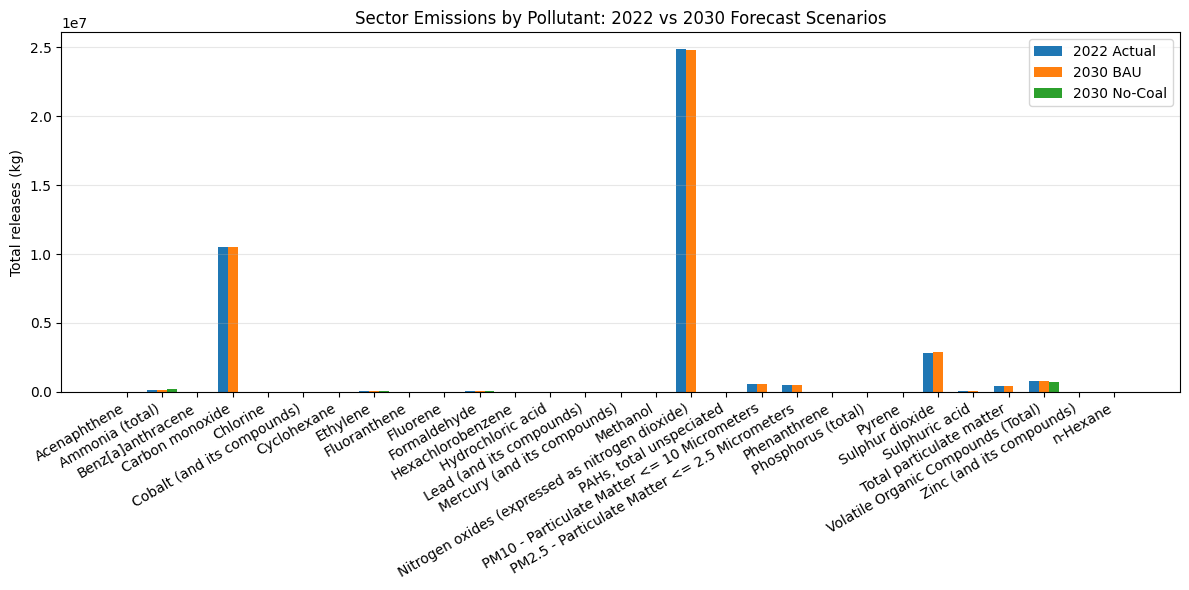

In [142]:
import numpy as np
import matplotlib.pyplot as plt

plot_df = final_table.copy()

#force numeric columns (in case they became strings)
num_cols = [
    "2022 Actual (kg)",
    "2030 BAU Forecast (kg)",
    "2030 No-Coal Scenario (kg)"
]

for c in num_cols:
    plot_df[c] = (
        plot_df[c]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

x = np.arange(len(plot_df["Pollutant"]))
width = 0.28

plt.figure(figsize=(12, 6))

plt.bar(x - width, plot_df["2022 Actual (kg)"], width, label="2022 Actual")
plt.bar(x, plot_df["2030 BAU Forecast (kg)"], width, label="2030 BAU")
plt.bar(x + width, plot_df["2030 No-Coal Scenario (kg)"], width, label="2030 No-Coal")

plt.xticks(x, plot_df["Pollutant"], rotation=30, ha="right")
plt.ylabel("Total releases (kg)")
plt.title("Sector Emissions by Pollutant: 2022 vs 2030 Forecast Scenarios")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

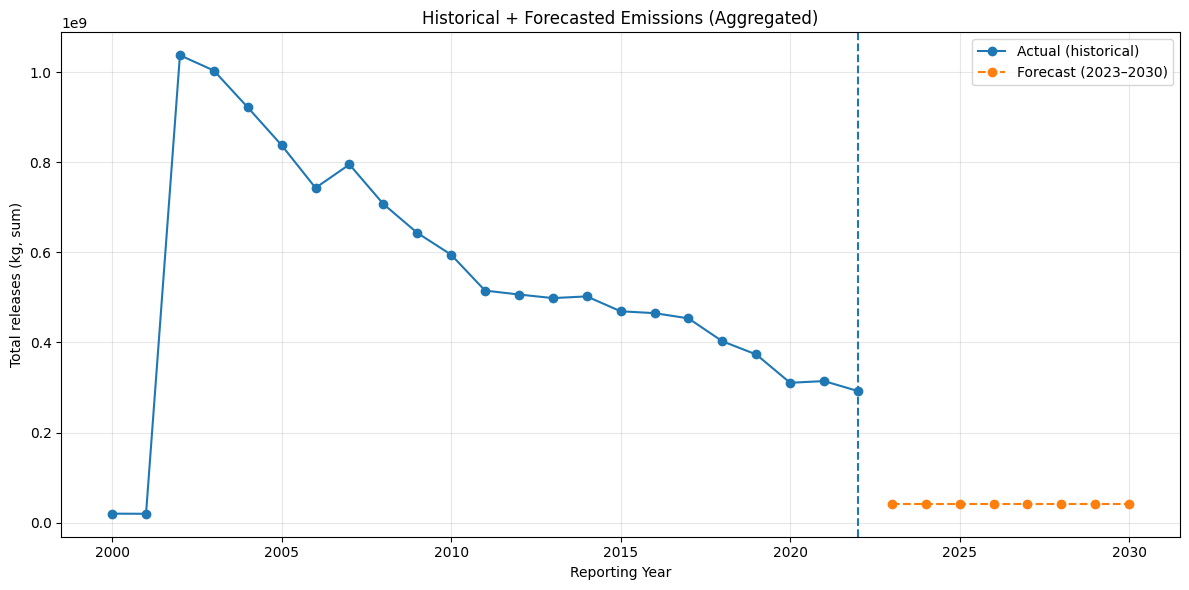

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#historical actual totals
hist_agg = (
    df1[df1[COL_YEAR] <= YEAR_LAST_ACTUAL]
    .groupby(COL_YEAR)[target]
    .sum()
    .reset_index()
    .rename(columns={target: "actual_total_kg"})
)

#forecast totals (from your full_ts)
fc_agg = (
    full_ts[full_ts[COL_YEAR] >= YEAR_LAST_ACTUAL + 1]
    .groupby(COL_YEAR)["predicted_total_release_kg"]
    .sum()
    .reset_index()
    .rename(columns={"predicted_total_release_kg": "forecast_total_kg"})
)

plt.figure(figsize=(12, 6))

plt.plot(hist_agg[COL_YEAR], hist_agg["actual_total_kg"],
         marker="o", label="Actual (historical)")

plt.plot(fc_agg[COL_YEAR], fc_agg["forecast_total_kg"],
         marker="o", linestyle="--", label="Forecast (2023–2030)")

plt.axvline(x=YEAR_LAST_ACTUAL, linestyle="--")
plt.title("Historical + Forecasted Emissions (Aggregated)")
plt.xlabel("Reporting Year")
plt.ylabel("Total releases (kg, sum)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

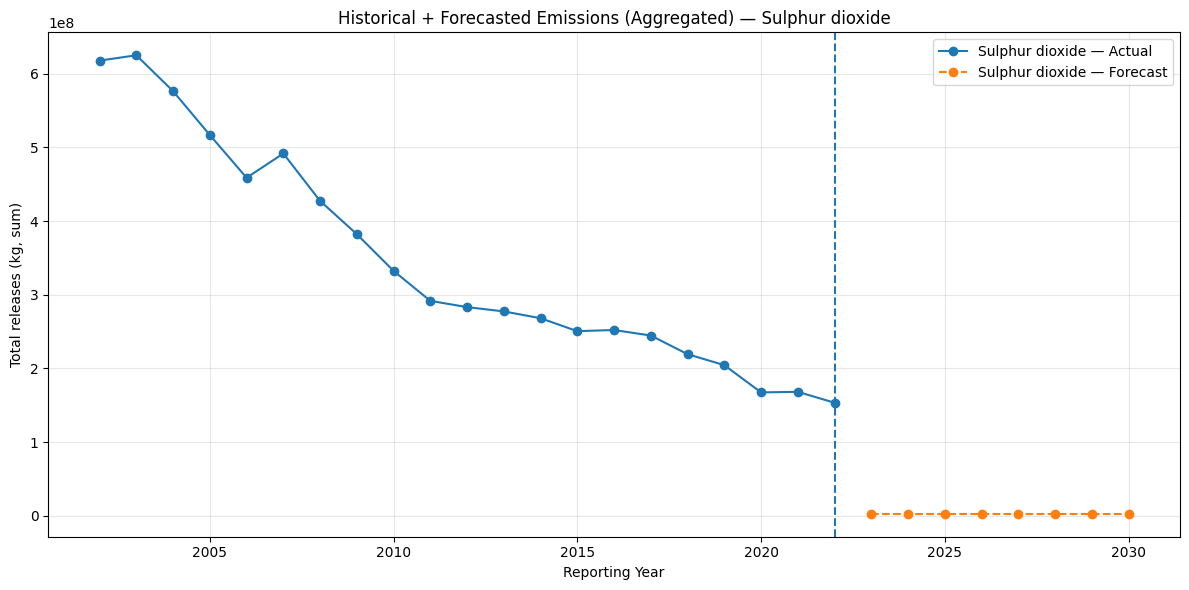

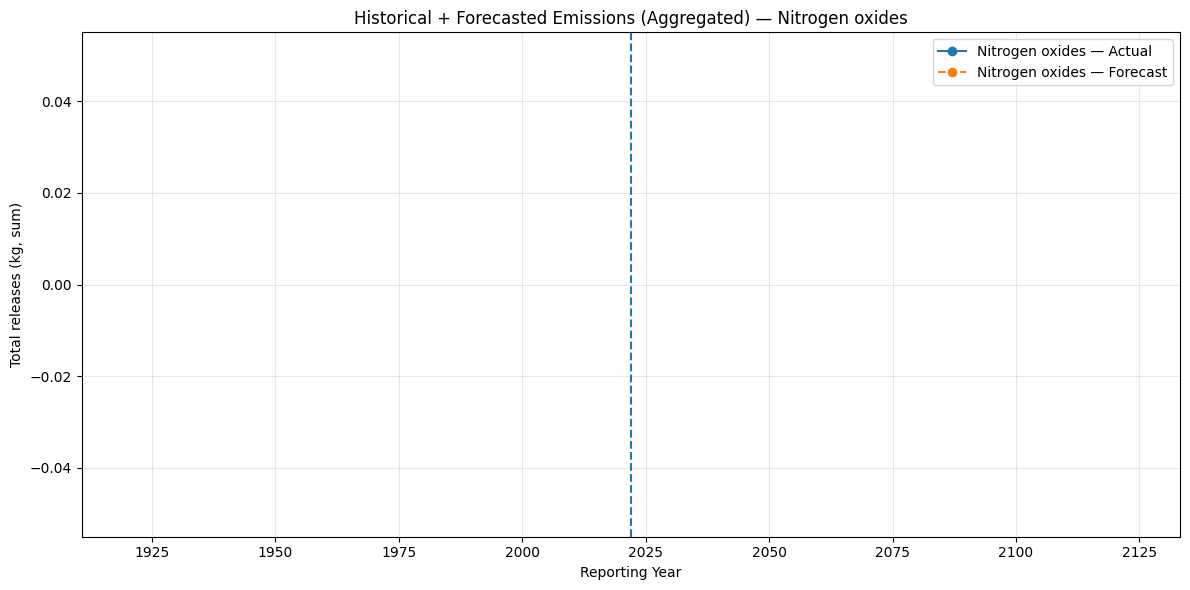

In [144]:
pollutants_to_plot = ["Sulphur dioxide", "Nitrogen oxides"]  # adjust to your exact names in df1

for pol in pollutants_to_plot:

    hist_pol = (
        df1[(df1[COL_YEAR] <= YEAR_LAST_ACTUAL) & (df1[COL_SUBSTANCE] == pol)]
        .groupby(COL_YEAR)[target]
        .sum()
        .reset_index()
        .rename(columns={target: "actual_total_kg"})
    )

    fc_pol = (
        full_ts[(full_ts[COL_YEAR] >= YEAR_LAST_ACTUAL + 1) & (full_ts[COL_SUBSTANCE] == pol)]
        .groupby(COL_YEAR)["predicted_total_release_kg"]
        .sum()
        .reset_index()
        .rename(columns={"predicted_total_release_kg": "forecast_total_kg"})
    )

    plt.figure(figsize=(12, 6))

    plt.plot(hist_pol[COL_YEAR], hist_pol["actual_total_kg"],
             marker="o", label=f"{pol} — Actual")

    plt.plot(fc_pol[COL_YEAR], fc_pol["forecast_total_kg"],
             marker="o", linestyle="--", label=f"{pol} — Forecast")

    plt.axvline(x=YEAR_LAST_ACTUAL, linestyle="--")
    plt.title(f"Historical + Forecasted Emissions (Aggregated) — {pol}")
    plt.xlabel("Reporting Year")
    plt.ylabel("Total releases (kg, sum)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [145]:
#checking which lag/yoy columns exist in your df1
candidate_cols = [c for c in df1.columns if "lag" in c.lower() or "roll" in c.lower() or "yoy" in c.lower() or "moment" in c.lower()]
candidate_cols[:50], len(candidate_cols)

(['release_lag_1yr',
  'release_lag_2yr',
  'release_lag_3yr',
  'rolling_mean_3yr',
  'rolling_std_3yr',
  'rolling_max_3yr',
  'rolling_mean_5yr',
  'rolling_std_5yr',
  'rolling_max_5yr',
  'yoy_change',
  'yoy_pct_change',
  'momentum'],
 12)

In [146]:
import numpy as np
import pandas as pd

#config: names of engineered columns in df1
LAG1 = "release_lag_1yr"
LAG2 = "release_lag_2yr"
LAG3 = "release_lag_3yr"

ROLL_MEAN_3 = "rolling_mean_3yr"
ROLL_STD_3  = "rolling_std_3yr"
ROLL_MAX_3  = "rolling_max_3yr"

ROLL_MEAN_5 = "rolling_mean_5yr"
ROLL_STD_5  = "rolling_std_5yr"
ROLL_MAX_5  = "rolling_max_5yr"

YOY = "yoy_change"
YOY_PCT = "yoy_pct_change"
MOM = "momentum"

#historical non-coal data (matches your model scope)
hist = df1[
    (df1[COL_IS_COAL] == False) &
    (df1[COL_YEAR] <= YEAR_LAST_ACTUAL)
].copy()

#creating a stable row key even if facility+substance repeats
hist["_key"] = hist[COL_FACILITY].astype(str) + "||" + hist[COL_SUBSTANCE].astype(str)

#building per-key historical series (sorted)
hist_sorted = hist.sort_values([COL_YEAR])
series_dict = (
    hist_sorted.groupby("_key")[target]
    .apply(list)
    .to_dict()
)

#template rows from 2022 to preserve static fields
base_last = hist[hist[COL_YEAR] == YEAR_LAST_ACTUAL].copy()

future_rows = []

for y in range(YEAR_LAST_ACTUAL + 1, YEAR_FORECAST_TO + 1):
    step = base_last.copy()
    step[COL_YEAR] = y
    step["_key"] = step[COL_FACILITY].astype(str) + "||" + step[COL_SUBSTANCE].astype(str)

    #helper functions for rolling stats
    def safe_mean(vals): 
        return float(np.mean(vals)) if len(vals) else 0.0
    
    def safe_std(vals): 
        return float(np.std(vals, ddof=0)) if len(vals) else 0.0
    
    def safe_max(vals): 
        return float(np.max(vals)) if len(vals) else 0.0

    #compute recursive features per row
    lag1_list, lag2_list, lag3_list = [], [], []
    rmean3_list, rstd3_list, rmax3_list = [], [], []
    rmean5_list, rstd5_list, rmax5_list = [], [], []
    yoy_list, yoypct_list, mom_list = [], [], []

    for k in step["_key"].values:
        seq = series_dict.get(k, [])

        #lags (use last known values)
        lag1 = seq[-1] if len(seq) >= 1 else 0.0
        lag2 = seq[-2] if len(seq) >= 2 else lag1
        lag3 = seq[-3] if len(seq) >= 3 else lag2

        #rolling windows
        last3 = seq[-3:] if len(seq) >= 3 else seq
        last5 = seq[-5:] if len(seq) >= 5 else seq

        #yoy + momentum (based on lag1 and lag2)
        yoy = lag1 - lag2
        yoypct = (yoy / lag2) if lag2 not in [0, 0.0, None] else np.nan
        mom = yoy  #simple momentum proxy consistent with "change direction"

        lag1_list.append(lag1); lag2_list.append(lag2); lag3_list.append(lag3)

        rmean3_list.append(safe_mean(last3)); rstd3_list.append(safe_std(last3)); rmax3_list.append(safe_max(last3))
        rmean5_list.append(safe_mean(last5)); rstd5_list.append(safe_std(last5)); rmax5_list.append(safe_max(last5))

        yoy_list.append(yoy); yoypct_list.append(yoypct); mom_list.append(mom)

    #assigning engineered features into step rows
    step[LAG1] = lag1_list
    step[LAG2] = lag2_list
    step[LAG3] = lag3_list

    step[ROLL_MEAN_3] = rmean3_list
    step[ROLL_STD_3]  = rstd3_list
    step[ROLL_MAX_3]  = rmax3_list

    step[ROLL_MEAN_5] = rmean5_list
    step[ROLL_STD_5]  = rstd5_list
    step[ROLL_MAX_5]  = rmax5_list

    step[YOY] = yoy_list
    step[YOY_PCT] = yoypct_list
    step[MOM] = mom_list

    #predicting
    X_step = step.drop(columns=[target], errors="ignore")
    pred_log = final_rf_pipeline.predict(X_step)
    pred_kg = np.clip(np.expm1(pred_log), 0, None)

    step["predicted_total_release_kg"] = pred_kg

    #feeding predictions back into the series dictionary for next year features
    for k, p in zip(step["_key"].values, pred_kg):
        series_dict.setdefault(k, []).append(float(p))

    future_rows.append(step)

#final combined dataset
future_df = pd.concat(future_rows, ignore_index=True)
full_ts_recursive = pd.concat([hist, future_df], ignore_index=True)

print("Recursive forecasts generated through 2030 with dynamic lag/rolling/yoy features.")

C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise i

Recursive forecasts generated through 2030 with dynamic lag/rolling/yoy features.


C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')
C:\Users\pfros\AppData\Local\Temp\ipykernel_66236\3403850860.py:291: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_out[col] = pd.to_numeric(df_out[col], errors='ignore')


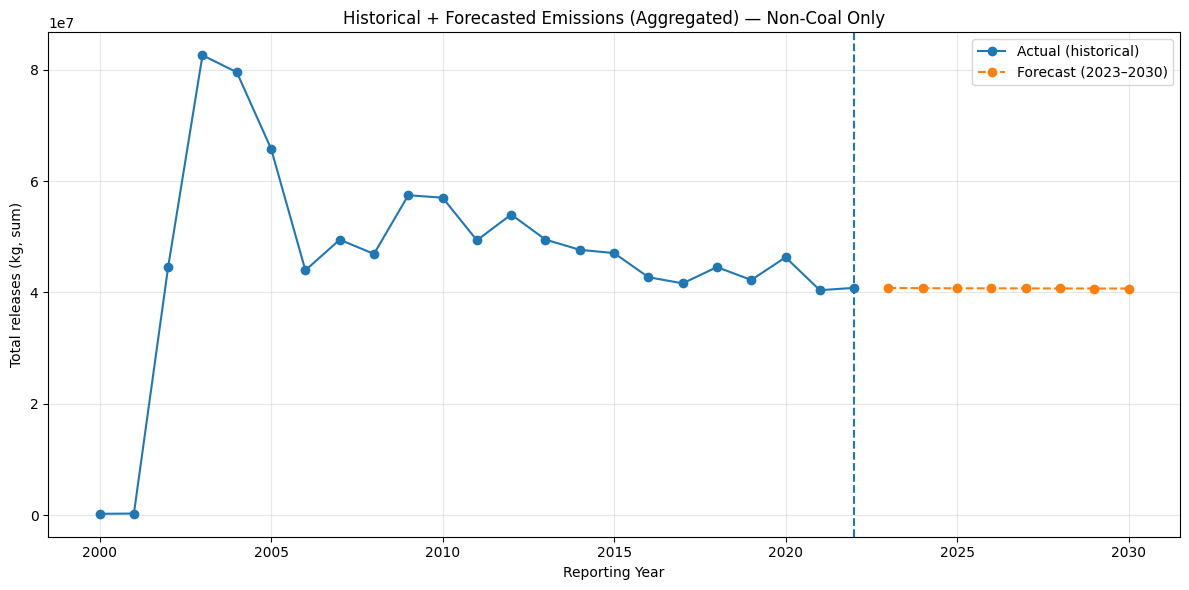

In [147]:
hist_agg = (
    df1[(df1[COL_IS_COAL] == False) & (df1[COL_YEAR] <= YEAR_LAST_ACTUAL)]
    .groupby(COL_YEAR)[target]
    .sum()
    .reset_index()
    .rename(columns={target: "actual_total_kg"})
)

fc_agg = (
    full_ts_recursive[full_ts_recursive[COL_YEAR] > YEAR_LAST_ACTUAL]
    .groupby(COL_YEAR)["predicted_total_release_kg"]
    .sum()
    .reset_index()
    .rename(columns={"predicted_total_release_kg": "forecast_total_kg"})
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hist_agg[COL_YEAR], hist_agg["actual_total_kg"], marker="o", label="Actual (historical)")
plt.plot(fc_agg[COL_YEAR], fc_agg["forecast_total_kg"], marker="o", linestyle="--", label="Forecast (2023–2030)")
plt.axvline(x=YEAR_LAST_ACTUAL, linestyle="--")
plt.title("Historical + Forecasted Emissions (Aggregated) — Non-Coal Only")
plt.xlabel("Reporting Year")
plt.ylabel("Total releases (kg, sum)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [148]:
#show average year-over-year change in last observed years
recent = (
    df1[(df1[COL_IS_COAL] == False) & (df1[COL_YEAR].between(2018, 2022))]
    .groupby(COL_YEAR)[target]
    .sum()
)

recent.diff()

reporting_year
2018             NaN
2019   -2.313179e+06
2020    4.069341e+06
2021   -5.904307e+06
2022    4.213482e+05
Name: total_release_all_kg, dtype: float64

In [149]:
hist_full = (
    df1[df1[COL_YEAR] <= YEAR_LAST_ACTUAL]
    .groupby(COL_YEAR)[target]
    .sum()
    .reset_index()
    .rename(columns={target: "actual_total_kg"})
)

In [150]:
coal_2022 = (
    df1[(df1[COL_YEAR] == YEAR_LAST_ACTUAL) & (df1[COL_IS_COAL])]
    .groupby(COL_YEAR)[target]
    .sum()
    .iloc[0]
)

In [151]:
noncoal_fc = (
    full_ts_recursive[full_ts_recursive[COL_YEAR] > YEAR_LAST_ACTUAL]
    .groupby(COL_YEAR)["predicted_total_release_kg"]
    .sum()
    .reset_index()
)

In [152]:
bau_fc = noncoal_fc.copy()
bau_fc["coal_component_kg"] = coal_2022
bau_fc["sector_bau_kg"] = (
    bau_fc["predicted_total_release_kg"] + bau_fc["coal_component_kg"]
)

In [153]:
years = bau_fc[COL_YEAR]
coal_phaseout = coal_2022 * (1 - (years - YEAR_LAST_ACTUAL) / (YEAR_FORECAST_TO - YEAR_LAST_ACTUAL))
coal_phaseout = coal_phaseout.clip(lower=0)

policy_fc = bau_fc.copy()
policy_fc["sector_no_coal_kg"] = (
    policy_fc["predicted_total_release_kg"] +
    coal_phaseout * REPLACEMENT_TO_GAS_OIL
)

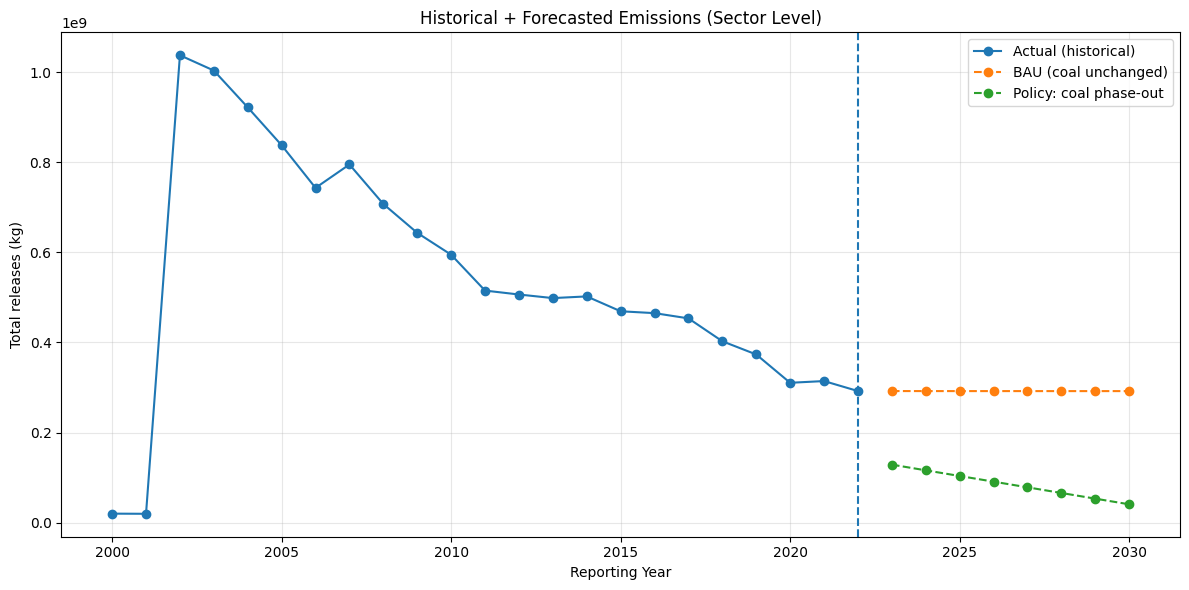

In [154]:
plt.figure(figsize=(12,6))

plt.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

plt.plot(
    bau_fc[COL_YEAR],
    bau_fc["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

plt.plot(
    policy_fc[COL_YEAR],
    policy_fc["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

plt.axvline(x=YEAR_LAST_ACTUAL, linestyle="--")
plt.xlabel("Reporting Year")
plt.ylabel("Total releases (kg)")
plt.title("Historical + Forecasted Emissions (Sector Level)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

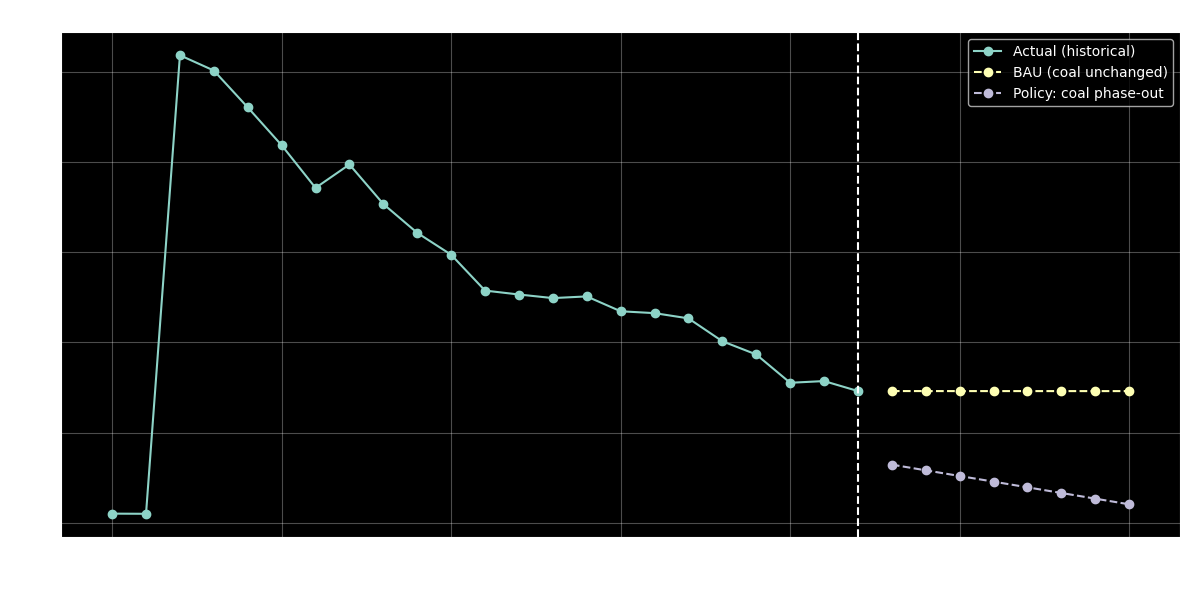

In [155]:
plt.figure(figsize=(12,6))
plt.style.use("dark_background")
plt.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

plt.plot(
    bau_fc[COL_YEAR],
    bau_fc["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

plt.plot(
    policy_fc[COL_YEAR],
    policy_fc["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

plt.axvline(x=YEAR_LAST_ACTUAL, linestyle="--")
plt.xlabel("Reporting Year")
plt.ylabel("Total releases (kg)")
plt.title("Historical + Forecasted Emissions (Sector Level)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

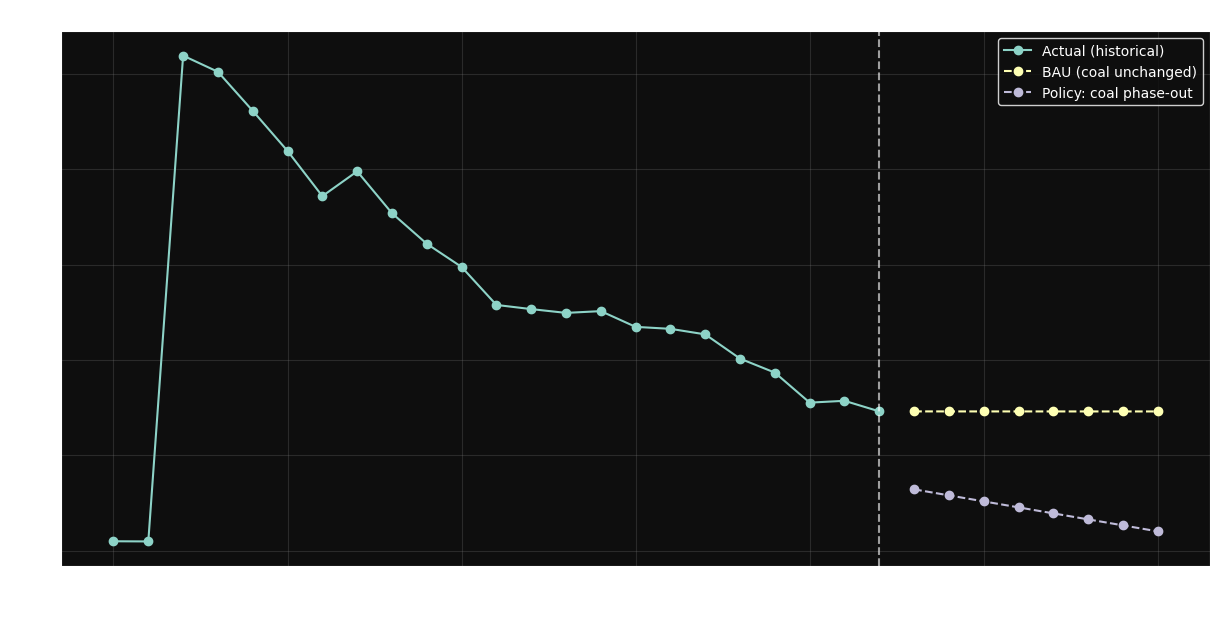

In [163]:
import matplotlib.pyplot as plt

#dark + transparent figure
fig, ax = plt.subplots(
    figsize=(12, 6),
    facecolor="none"   #transparent figure background
)

#dark axes background
ax.set_facecolor("#0e0e0e")  #near-black, nicer than pure black

#plots
ax.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

ax.plot(
    bau_fc[COL_YEAR],
    bau_fc["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

ax.plot(
    policy_fc[COL_YEAR],
    policy_fc["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

#vertical split
ax.axvline(x=YEAR_LAST_ACTUAL, linestyle="--", color="white", alpha=0.6)

#labels + title (white)
ax.set_xlabel("Reporting Year", color="white")
ax.set_ylabel("Total releases (kg)", color="white")
ax.set_title("Historical + Forecasted Emissions (Sector Level)", color="white")

#ticks
ax.tick_params(colors="white")

#legend
leg = ax.legend(
    facecolor="#0e0e0e",
    edgecolor="white",
    labelcolor="white"
)

#grid
ax.grid(color="gray", alpha=0.25)

#remove white margins
plt.tight_layout(pad=0)

plt.show()

In [164]:
#make bridge points at 2022 to connect lines
bau_plot = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "y": [hist_full.loc[hist_full[COL_YEAR]==YEAR_LAST_ACTUAL, "actual_total_kg"].iloc[0]]}),
    bau_fc.rename(columns={"sector_bau_kg": "y"})[[COL_YEAR, "y"]]
]).sort_values(COL_YEAR)

policy_plot = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "y": [hist_full.loc[hist_full[COL_YEAR]==YEAR_LAST_ACTUAL, "actual_total_kg"].iloc[0]]}),
    policy_fc.rename(columns={"sector_no_coal_kg": "y"})[[COL_YEAR, "y"]]
]).sort_values(COL_YEAR)

#plot using bridge series
ax.plot(hist_full[COL_YEAR], hist_full["actual_total_kg"], marker="o", label="Actual (historical)")
ax.plot(bau_plot[COL_YEAR], bau_plot["y"], linestyle="--", marker="o", label="BAU (coal unchanged)")
ax.plot(policy_plot[COL_YEAR], policy_plot["y"], linestyle="--", marker="o", label="Policy: coal phase-out")

NameError: name 'bau_fc2' is not defined

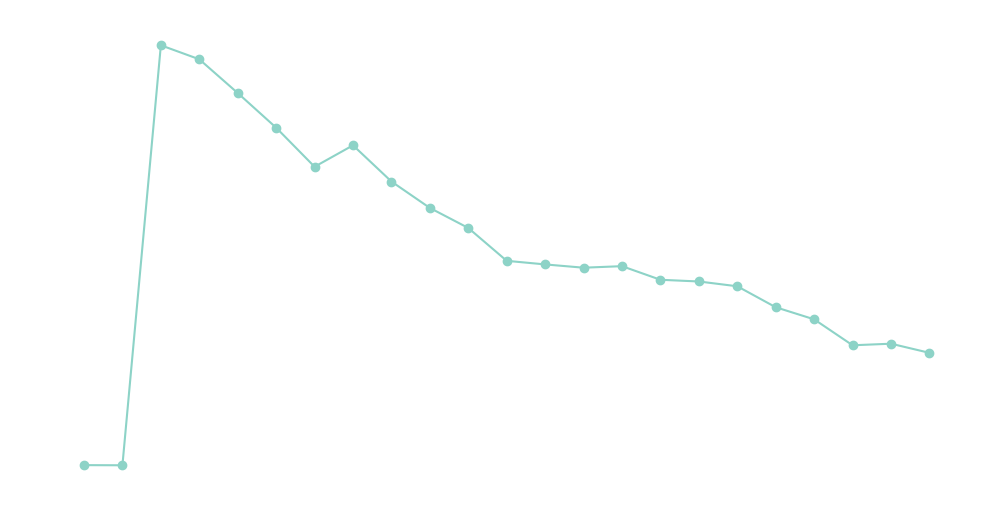

In [165]:
fig, ax = plt.subplots(
    figsize=(12, 6),
    facecolor="none"   # transparent figure
)

ax.set_facecolor("none")  # transparent axes

# plots
ax.plot(hist_full[COL_YEAR], hist_full["actual_total_kg"], marker="o", label="Actual (historical)")
ax.plot(bau_fc2[COL_YEAR], bau_fc2["sector_bau_kg"], linestyle="--", marker="o", label="BAU (coal unchanged)")
ax.plot(policy_fc2[COL_YEAR], policy_fc2["sector_no_coal_kg"], linestyle="--", marker="o", label="Policy: coal phase-out")

ax.axvline(x=YEAR_LAST_ACTUAL, linestyle="--", color="white", alpha=0.6)

ax.set_xlabel("Reporting Year", color="white")
ax.set_ylabel("Total releases (kg)", color="white")
ax.set_title("Historical + Forecasted Emissions (Sector Level)", color="white")

ax.tick_params(colors="white")
ax.legend(facecolor="none", edgecolor="white", labelcolor="white")
ax.grid(color="white", alpha=0.15)

plt.tight_layout(pad=0)
plt.show()

In [166]:
actual_2022 = hist_full.loc[
    hist_full[COL_YEAR] == YEAR_LAST_ACTUAL,
    "actual_total_kg"
].iloc[0]

In [167]:
bau_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_bau_kg": [actual_2022]}),
    bau_fc[[COL_YEAR, "sector_bau_kg"]]
]).sort_values(COL_YEAR)

policy_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_no_coal_kg": [actual_2022]}),
    policy_fc[[COL_YEAR, "sector_no_coal_kg"]]
]).sort_values(COL_YEAR)

In [159]:
COL_YEAR = "reporting_year"

agg_yearly = (
    walk_forward_df
    .groupby(COL_YEAR)
    .agg(
        actual_total_kg=("actual_total_release_kg", "sum"),
        predicted_total_kg=("predicted_total_release_kg", "sum")
    )
    .reset_index()
    .sort_values(COL_YEAR)
)

agg_yearly

,reporting_year,actual_total_kg,predicted_total_kg
0,2019,4.224912e+07,4.218654e+07
1,2020,4.631846e+07,4.621168e+07
2,2021,4.041416e+07,4.043970e+07
3,2022,4.083550e+07,4.079822e+07


In [168]:
#extract last observed value (2022)
actual_2022 = hist_full.loc[
    hist_full[COL_YEAR] == YEAR_LAST_ACTUAL,
    "actual_total_kg"
].iloc[0]

#BAU forecast anchored at 2022
bau_fc2 = pd.concat([
    pd.DataFrame({
        COL_YEAR: [YEAR_LAST_ACTUAL],
        "sector_bau_kg": [actual_2022]
    }),
    bau_fc[[COL_YEAR, "sector_bau_kg"]]
]).sort_values(COL_YEAR)

#Policy forecast anchored at 2022
policy_fc2 = pd.concat([
    pd.DataFrame({
        COL_YEAR: [YEAR_LAST_ACTUAL],
        "sector_no_coal_kg": [actual_2022]
    }),
    policy_fc[[COL_YEAR, "sector_no_coal_kg"]]
]).sort_values(COL_YEAR)

In [160]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = agg_yearly["actual_total_kg"]
y_pred = agg_yearly["predicted_total_kg"]

mae_total = mean_absolute_error(y_true, y_pred)
rmse_total = mean_squared_error(y_true, y_pred) ** 0.5

#safe MAPE (ignoring any zero actual years)
mape_total = np.mean(
    np.abs((y_true - y_pred) / y_true.replace(0, np.nan))
) * 100

nmae_total = mae_total / y_true.mean() * 100

metrics_total_df = pd.DataFrame([{
    "MAE (kg)": mae_total,
    "RMSE (kg)": rmse_total,
    "MAPE (%)": mape_total,
    "nMAE (% of mean actual)": nmae_total
}])

metrics_total_df

,MAE (kg),RMSE (kg),MAPE (%),nMAE (% of mean actual)
0,58050.191998,65884.07343,0.133298,0.136736


In [169]:
ax.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

ax.plot(
    bau_fc2[COL_YEAR],
    bau_fc2["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

ax.plot(
    policy_fc2[COL_YEAR],
    policy_fc2["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

In [161]:
agg_yearly["abs_error_kg"] = (agg_yearly["predicted_total_kg"] - agg_yearly["actual_total_kg"]).abs()
agg_yearly["rel_error_%"] = 100 * agg_yearly["abs_error_kg"] / agg_yearly["actual_total_kg"].replace(0, np.nan)

agg_yearly

,reporting_year,actual_total_kg,predicted_total_kg,abs_error_kg,rel_error_%
0,2019,4.224912e+07,4.218654e+07,62583.280201,0.148129
1,2020,4.631846e+07,4.621168e+07,106786.830683,0.230549
2,2021,4.041416e+07,4.043970e+07,25545.719420,0.063210
3,2022,4.083550e+07,4.079822e+07,37284.937687,0.091305


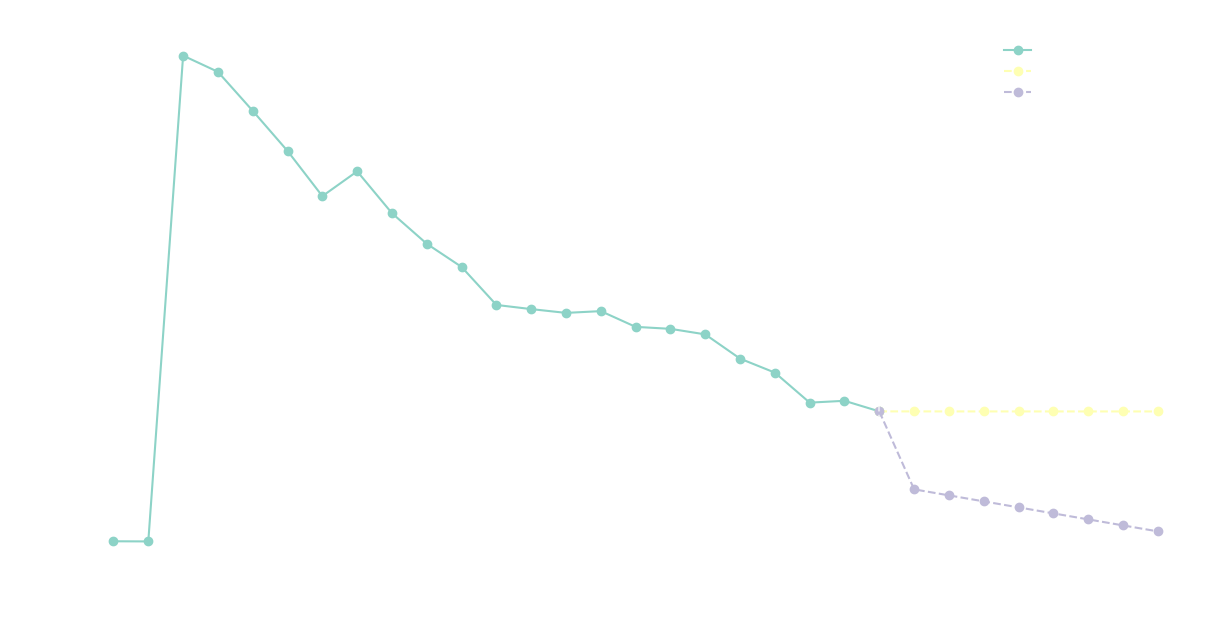

In [170]:
#anchoring forecasts to last observed year (so lines connect)
actual_2022 = hist_full.loc[
    hist_full[COL_YEAR] == YEAR_LAST_ACTUAL,
    "actual_total_kg"
].iloc[0]

bau_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_bau_kg": [actual_2022]}),
    bau_fc[[COL_YEAR, "sector_bau_kg"]]
]).sort_values(COL_YEAR)

policy_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_no_coal_kg": [actual_2022]}),
    policy_fc[[COL_YEAR, "sector_no_coal_kg"]]
]).sort_values(COL_YEAR)

#transparent figure + axes (overlay-ready), no white margins
fig, ax = plt.subplots(figsize=(12, 6), facecolor="none")
ax.set_facecolor("none")

ax.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

ax.plot(
    bau_fc2[COL_YEAR],
    bau_fc2["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

ax.plot(
    policy_fc2[COL_YEAR],
    policy_fc2["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

ax.axvline(x=YEAR_LAST_ACTUAL, linestyle="--", color="white", alpha=0.6)

ax.set_xlabel("Reporting Year", color="white")
ax.set_ylabel("Total releases (kg)", color="white")
ax.set_title("Historical + Forecasted Emissions (Sector Level)", color="white")
ax.tick_params(colors="white")

ax.legend(facecolor="none", edgecolor="white", labelcolor="white")
ax.grid(color="white", alpha=0.15)

plt.tight_layout(pad=0)
plt.show()

#optional: export transparent PNG (no margins)
fig.savefig(
    "sector_emissions_transparent.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
    pad_inches=0
)








In [171]:
years = noncoal_fc[COL_YEAR].astype(int)

frac_remaining = 1 - (years - YEAR_LAST_ACTUAL) / (YEAR_FORECAST_TO - YEAR_LAST_ACTUAL)
frac_remaining = frac_remaining.clip(lower=0, upper=1)

In [ ]:
#noncoal forecast already exists as noncoal_fc with:
#noncoal_fc[COL_YEAR] and noncoal_fc["predicted_total_release_kg"]

years = noncoal_fc[COL_YEAR].astype(int)

#coal stays constant in BAU
bau_fc = noncoal_fc.copy()
bau_fc["coal_component_kg"] = coal_2022
bau_fc["sector_bau_kg"] = bau_fc["predicted_total_release_kg"] + bau_fc["coal_component_kg"]

#linear coal phase-out (remaining coal each year)
frac_remaining = 1 - (years - YEAR_LAST_ACTUAL) / (YEAR_FORECAST_TO - YEAR_LAST_ACTUAL)
frac_remaining = frac_remaining.clip(lower=0, upper=1)

coal_remaining = coal_2022 * frac_remaining

#policy: remove coal gradually, add partial replacement to the noncoal system
policy_fc = noncoal_fc.copy()
policy_fc["coal_remaining_kg"] = coal_remaining
policy_fc["coal_removed_kg"] = coal_2022 - coal_remaining

#replacement emissions added back (only a fraction of removed coal)
policy_fc["replacement_kg"] = policy_fc["coal_removed_kg"] * REPLACEMENT_TO_GAS_OIL

policy_fc["sector_no_coal_kg"] = (
    policy_fc["predicted_total_release_kg"] + policy_fc["replacement_kg"]
)

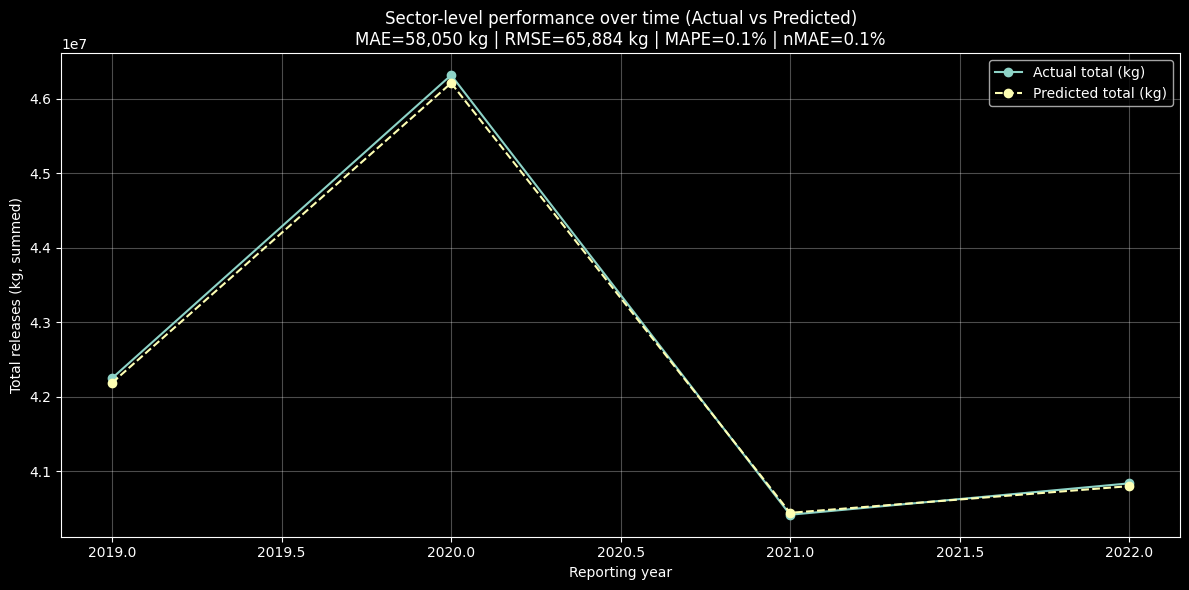

,reporting_year,actual_total_kg,predicted_total_kg,abs_error_kg,rel_error_%
0,2019,4.224912e+07,4.218654e+07,62583.280201,0.148129
1,2020,4.631846e+07,4.621168e+07,106786.830683,0.230549
2,2021,4.041416e+07,4.043970e+07,25545.719420,0.063210
3,2022,4.083550e+07,4.079822e+07,37284.937687,0.091305


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

COL_YEAR = "reporting_year"
COL_ACTUAL = "actual_total_release_kg"
COL_PRED = "predicted_total_release_kg"

#aggregating to yearly totals
agg_yearly = (
    walk_forward_df
    .groupby(COL_YEAR)
    .agg(
        actual_total_kg=(COL_ACTUAL, "sum"),
        predicted_total_kg=(COL_PRED, "sum")
    )
    .reset_index()
    .sort_values(COL_YEAR)
)

#computing total metrics (sector-level)
y_true = agg_yearly["actual_total_kg"]
y_pred = agg_yearly["predicted_total_kg"]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred) ** 0.5
mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.nan))) * 100
nmae = mae / y_true.mean() * 100

#plotting
plt.figure(figsize=(12, 6))

plt.plot(
    agg_yearly[COL_YEAR],
    agg_yearly["actual_total_kg"],
    marker="o",
    label="Actual total (kg)"
)

plt.plot(
    agg_yearly[COL_YEAR],
    agg_yearly["predicted_total_kg"],
    marker="o",
    linestyle="--",
    label="Predicted total (kg)"
)

plt.xlabel("Reporting year")
plt.ylabel("Total releases (kg, summed)")
plt.title(
    "Sector-level performance over time (Actual vs Predicted)\n"
    f"MAE={mae:,.0f} kg | RMSE={rmse:,.0f} kg | MAPE={mape:.1f}% | nMAE={nmae:.1f}%"
)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#optional: show the table under the plot
agg_yearly["abs_error_kg"] = (agg_yearly["predicted_total_kg"] - agg_yearly["actual_total_kg"]).abs()
agg_yearly["rel_error_%"] = 100 * agg_yearly["abs_error_kg"] / agg_yearly["actual_total_kg"].replace(0, np.nan)

agg_yearly

In [174]:
start_total = hist_full.loc[hist_full[COL_YEAR] == YEAR_LAST_ACTUAL, "actual_total_kg"].iloc[0]
end_total = policy_fc.loc[policy_fc[COL_YEAR] == YEAR_FORECAST_TO, "sector_no_coal_kg"].iloc[0]

years = policy_fc[COL_YEAR].astype(int)
t = (years - YEAR_LAST_ACTUAL) / (YEAR_FORECAST_TO - YEAR_LAST_ACTUAL)

policy_fc["sector_no_coal_kg_linear"] = start_total + t * (end_total - start_total)

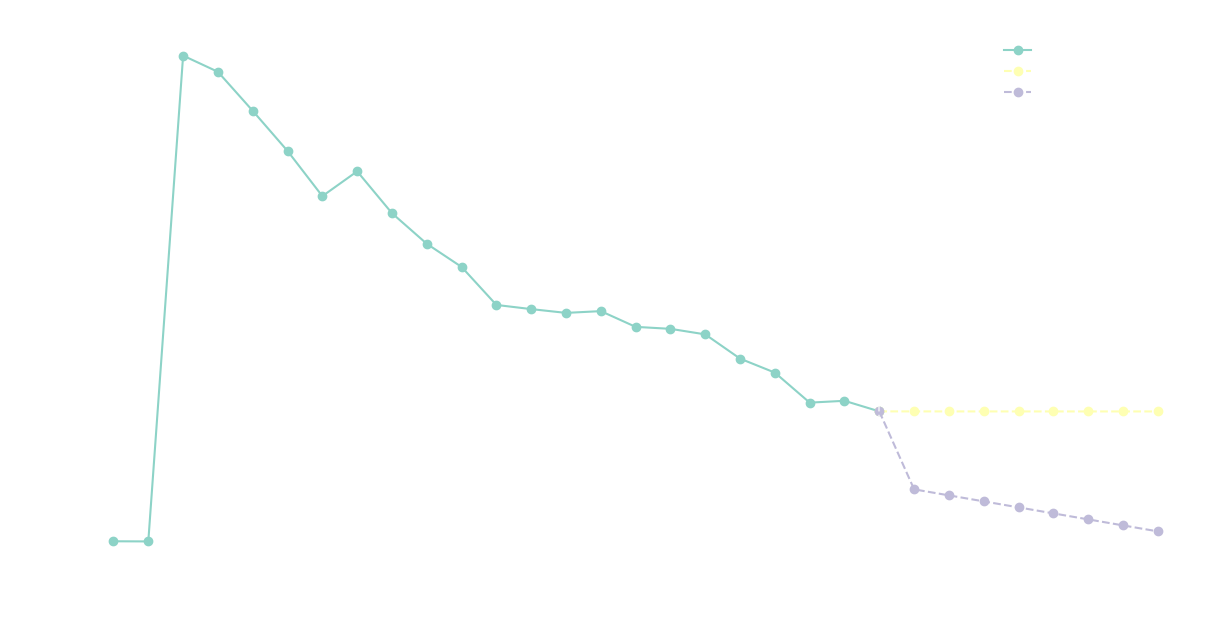

In [175]:
#anchor forecasts to 2022 so they connect visually
actual_2022 = hist_full.loc[
    hist_full[COL_YEAR] == YEAR_LAST_ACTUAL,
    "actual_total_kg"
].iloc[0]

bau_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_bau_kg": [actual_2022]}),
    bau_fc[[COL_YEAR, "sector_bau_kg"]]
]).sort_values(COL_YEAR)

policy_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_no_coal_kg": [actual_2022]}),
    policy_fc[[COL_YEAR, "sector_no_coal_kg"]]
]).sort_values(COL_YEAR)

#transparent figure + axes
fig, ax = plt.subplots(figsize=(12, 6), facecolor="none")
ax.set_facecolor("none")

#historical
ax.plot(
    hist_full[COL_YEAR],
    hist_full["actual_total_kg"],
    marker="o",
    label="Actual (historical)"
)

#BAU
ax.plot(
    bau_fc2[COL_YEAR],
    bau_fc2["sector_bau_kg"],
    linestyle="--",
    marker="o",
    label="BAU (coal unchanged)"
)

#Policy: linear coal phase-out
ax.plot(
    policy_fc2[COL_YEAR],
    policy_fc2["sector_no_coal_kg"],
    linestyle="--",
    marker="o",
    label="Policy: coal phase-out"
)

#visual split between history and scenarios
ax.axvline(
    x=YEAR_LAST_ACTUAL,
    linestyle="--",
    color="white",
    alpha=0.6
)

#labels and styling
ax.set_xlabel("Reporting Year", color="white")
ax.set_ylabel("Total releases (kg)", color="white")
ax.set_title("Historical + Forecasted Emissions (Sector Level)", color="white")

ax.tick_params(colors="white")
ax.legend(facecolor="none", edgecolor="white", labelcolor="white")
ax.grid(color="white", alpha=0.15)

plt.tight_layout(pad=0)
plt.show()

In [ ]:
pd.DataFrame({
    "year": policy_fc[COL_YEAR],
    "coal_remaining": policy_fc["coal_remaining_kg"],
    "coal_removed": policy_fc["coal_removed_kg"],
    "replacement": policy_fc["replacement_kg"],
    "policy_total": policy_fc["sector_no_coal_kg"]
})

In [176]:
import numpy as np

#noncoal_fc must exist and contain:
#noncoal_fc[COL_YEAR] and noncoal_fc["predicted_total_release_kg"]

years = noncoal_fc[COL_YEAR].astype(int)

#BAU: coal stays constant at 2022 level
bau_fc = noncoal_fc.copy()
bau_fc["coal_component_kg"] = coal_2022
bau_fc["sector_bau_kg"] = bau_fc["predicted_total_release_kg"] + bau_fc["coal_component_kg"]

#linear remaining coal fraction: 2022=1, 2030=0
frac_remaining = 1 - (years - YEAR_LAST_ACTUAL) / (YEAR_FORECAST_TO - YEAR_LAST_ACTUAL)
frac_remaining = frac_remaining.clip(0, 1)

coal_remaining = coal_2022 * frac_remaining
coal_removed = coal_2022 - coal_remaining

#Policy: include remaining coal + add replacement for removed coal
policy_fc = noncoal_fc.copy()
policy_fc["coal_remaining_kg"] = coal_remaining
policy_fc["replacement_kg"] = coal_removed * REPLACEMENT_TO_GAS_OIL

policy_fc["sector_policy_kg"] = (
    policy_fc["predicted_total_release_kg"] +
    policy_fc["coal_remaining_kg"] +
    policy_fc["replacement_kg"]
)

In [178]:
policy_fc[[COL_YEAR, "coal_remaining_kg", "replacement_kg", "sector_policy_kg"]].head(10)

,reporting_year,coal_remaining_kg,replacement_kg,sector_policy_kg
0,2023,2.199228e+08,1.256702e+07,2.733057e+08
1,2024,1.885053e+08,2.513404e+07,2.544090e+08
2,2025,1.570877e+08,3.770105e+07,2.355359e+08
3,2026,1.256702e+08,5.026807e+07,2.166893e+08
4,2027,9.425263e+07,6.283509e+07,1.978225e+08
5,2028,6.283509e+07,7.540211e+07,1.789609e+08
6,2029,3.141754e+07,8.796913e+07,1.601026e+08
7,2030,0.000000e+00,1.005361e+08,1.412537e+08


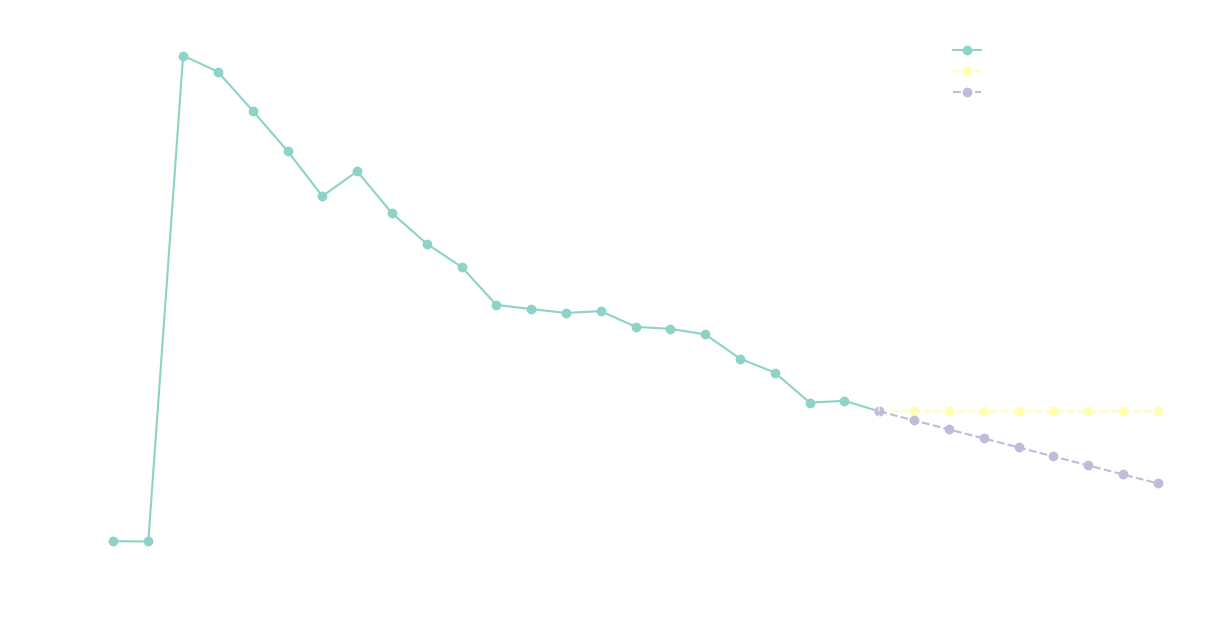

In [179]:
import matplotlib.pyplot as plt
import pandas as pd

#anchor forecasts at 2022 so they connect
actual_2022 = hist_full.loc[
    hist_full[COL_YEAR] == YEAR_LAST_ACTUAL,
    "actual_total_kg"
].iloc[0]

bau_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_bau_kg": [actual_2022]}),
    bau_fc[[COL_YEAR, "sector_bau_kg"]]
]).sort_values(COL_YEAR)

policy_fc2 = pd.concat([
    pd.DataFrame({COL_YEAR: [YEAR_LAST_ACTUAL], "sector_policy_kg": [actual_2022]}),
    policy_fc[[COL_YEAR, "sector_policy_kg"]]
]).sort_values(COL_YEAR)

fig, ax = plt.subplots(figsize=(12, 6), facecolor="none")
ax.set_facecolor("none")

ax.plot(hist_full[COL_YEAR], hist_full["actual_total_kg"], marker="o", label="Actual (historical)")
ax.plot(bau_fc2[COL_YEAR], bau_fc2["sector_bau_kg"], linestyle="--", marker="o", label="BAU (coal unchanged)")
ax.plot(policy_fc2[COL_YEAR], policy_fc2["sector_policy_kg"], linestyle="--", marker="o", label="Policy: coal phase-out (linear)")

ax.axvline(x=YEAR_LAST_ACTUAL, linestyle="--", color="white", alpha=0.6)
ax.set_xlabel("Reporting Year", color="white")
ax.set_ylabel("Total releases (kg)", color="white")
ax.set_title("Historical + Forecasted Emissions (Sector Level)", color="white")
ax.tick_params(colors="white")
ax.legend(facecolor="none", edgecolor="white", labelcolor="white")
ax.grid(color="white", alpha=0.15)

plt.tight_layout(pad=0)
plt.show()

# 99. Linear Phase-Out Scenario

The linear model assumes releases (from non-coal sources) decline by a constant amount each year and reach (near) zero at the target year.

### Mathematical formula (linear decline)

For a future year $(y)$:

$[
P_{\text{linear}}(y) \;=\; B \cdot \left(1 - \frac{y - Y_{\text{last}}}{N_{\text{steps}}}\right)
]$

This expression is valid for $(Y_{\text{last}} \le y \le Y_{\text{last}} + N_{\text{steps}})$. If $(y < Y_{\text{last}})$ return historical value; if $(y > Y_{\text{last}} + N_{\text{steps}})$ cap at 0 (or a chosen floor).

### Components (code mapping)

| Symbol | Code variable | Description | Example value |
|---:|:---|:---|:---|
| $(P_{\text{linear}}(y))$ | `pred_total_releases` | Projected total release (kg) in year $(y)$. | — |
| $(B)$ | `base_release` | Baseline total release (kg) (e.g., mean of last 3 historical years). | (\sim 1{,}570{,}302)$ kg |
| $(y)$ | `years_future` | Projection year (e.g., 2023, 2024, …). | 2023–2030 |
| $(Y_{\text{last}})$ | `last_year` | Last historical year used in baseline. Decline starts at $(Y_{\text{last}}+1)$. | 2022 |
| $(N_{\text{steps}})$ | `n_years` | Number of projection steps (years). | 8 |

### Notes

- When $(y = Y_{\text{last}})$ the fraction is 0 and $(P_{\text{linear}}(y)=B)$.
- When $(y = Y_{\text{last}} + N_{\text{steps}})$ the fraction is 1 and $(P_{\text{linear}}(y)=0)$.
- It is common to apply a non-negative floor (e.g., `max(P_linear, 0)`).

---

### 2. Logistic Phase-Out Scenario

The logistic model assumes a non-linear, S-shaped decline. It begins slowly, accelerates when policy or system changes take effect, and slows again as the remaining releases become hardest to eliminate.

### 📝 Mathematical Formula (Logistic Decline)

The projected total release for a future year $(y)$, denoted as $(P_{\text{logistic}}(y))$, is given by:

$[
P_{\text{logistic}}(y) = B \cdot \frac{1 / (1 + e^{k \cdot (t - 0.5)})}{1 / (1 + e^{k \cdot (t_{\text{start}} - 0.5)})}
]$

Where normalized time is defined as:

$[
t = \frac{y - Y_{\text{last}}}{N_{\text{steps}}}, \quad
t_{\text{start}} = \frac{1}{N_{\text{steps}}}
]$

### 🛠️ Explanation of Components

| Component | Code Variable | Description | Value in Your Code |
|----------|---------------|-------------|--------------------|
| $(P_{\text{logistic}}(y))$ | `pred_total_releases` | The Projected Total Release (in kg) for each year. | Varies per year |
| $(B)$ | `base_release` | Same baseline as linear model. | ~1,570,302 kg |
| $(t)$ | `t` (inside `logistic_decline`) | Normalized time: fraction of total projection progress. | 0.2, 0.4, …, 1.0 |
| $(k)$ | `k` | Steepness parameter controlling S-curve shape. | 1.2 |
| $(e)$ | `np.exp` | Euler's number. | ≈ 2.718 |
| Denominator term | `curve[0]` | Normalization factor ensuring the first projection equals $(B)$. | $(\frac{1}{1 + e^{k(1/N_{\text{steps}} - 0.5)}})$ |

The logistic function  
$[
f(t) = \frac{1}{1 + e^{-kt}}
]$  
is used to model transitions over time.

By using  
$[
\frac{1}{1 + e^{k(t - 0.5)}}
]$  
you obtain a declining S-curve (high to low), with the fastest change near $(t = 0.5)$.

---